<a href="https://colab.research.google.com/github/charlottetse33/portfolio/blob/main/IBM_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Flow chart

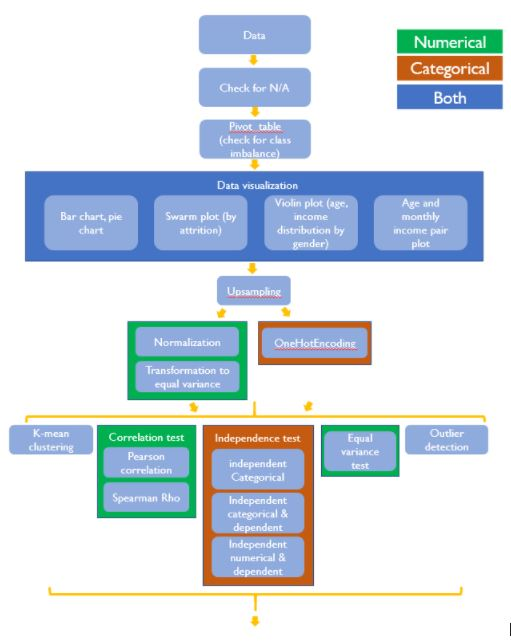

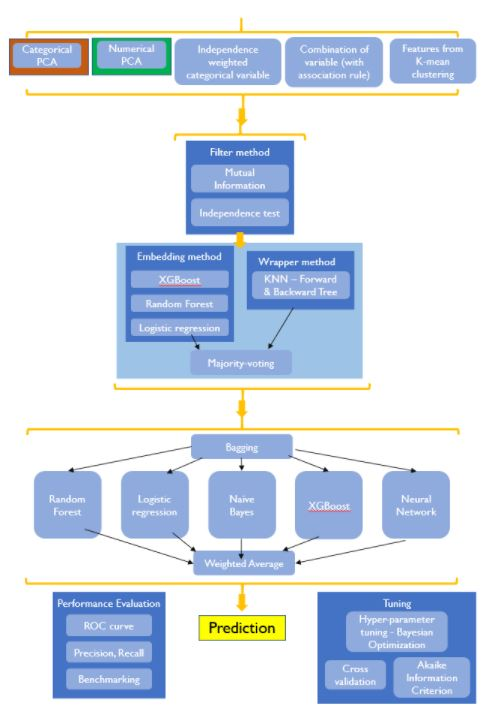

Hyper-parameter optimization flow chart

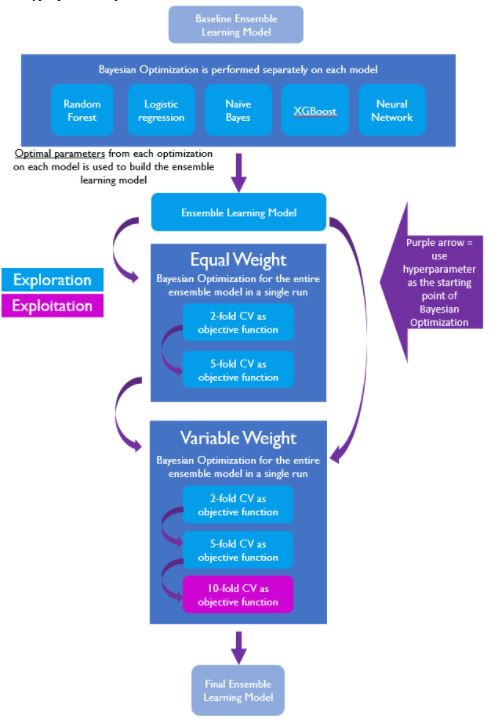

In [ ]:
 #Importing data
import pandas as pd
url_data = "https://raw.githubusercontent.com/charlottetse32/IBM_Classification/main/WA_Fn-UseC_-HR-Employee-Attrition%20(1).csv"
data = pd.read_csv(url_data)

# Installation

In [ ]:
!pip install featexp

In [ ]:
%load_ext rpy2.ipython

/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:14: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex
/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:34: UserWarning: pandas >= 1.0 is not supported.
  warnings.warn('pandas >= 1.0 is not supported.')


In [ ]:
%%R
R.Version()

$platform
[1] "x86_64-pc-linux-gnu"

$arch
[1] "x86_64"

$os
[1] "linux-gnu"

$system
[1] "x86_64, linux-gnu"

$status
[1] ""

$major
[1] "4"

$minor
[1] "0.3"

$year
[1] "2020"

$month
[1] "10"

$day
[1] "10"

$`svn rev`
[1] "79318"

$language
[1] "R"

$version.string
[1] "R version 4.0.3 (2020-10-10)"

$nickname
[1] "Bunny-Wunnies Freak Out"



In [ ]:
%%R
install.packages("Gifi", repos="http://R-Forge.R-project.org")

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'http://R-Forge.R-project.org/src/contrib/Gifi_0.3-9.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 54152 bytes (52 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write

In [ ]:
%%R
install.packages("Gifi")

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/Gifi_0.3-9.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 58914 bytes (57 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to 

In [ ]:
%%R 
library(Gifi)
#library(homals)

In [ ]:
# Importing Libraries
import numpy as np
from numpy import loadtxt
from numpy import sort
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder
from featexp import get_univariate_plots
from featexp import get_trend_stats
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBClassifier

# 0. Foundation

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import io
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from scipy import stats
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import KernelPCA
from sklearn.decomposition import PCA
from sklearn.decomposition import FactorAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy import fft
from sklearn import svm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from matplotlib import pyplot
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBClassifier
from sklearn.inspection import permutation_importance

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# exclude "Attritution"
data_array = np.array(data)
print("data array = numpy shape", data_array.shape)
x_data = np.delete(data_array,1, axis =1 )
y_data = data_array[:,1].reshape((-1,1))
print("data array shape", data_array.shape)
print("x data shape", x_data.shape)
print("y data shape", y_data.shape)


data array = numpy shape (1470, 35)
data array shape (1470, 35)
x data shape (1470, 34)
y data shape (1470, 1)


In [ ]:
# Global variable 
# numerical_features
# categorical_features
pd_index = data.index
pd_column = data.columns



In [ ]:
# Global functions
def upsample_minority(inputs, random_state_index):
    data_majority = inputs[inputs[:,-1]==0.0]
    data_minority = inputs[inputs[:,-1]==1.0]
    print("test", data_majority.shape)
    print("before upsampling majority %", data_majority.shape[0]/(data_minority.shape[0]+data_majority.shape[0]))
    
    upsampled_data_minority = resample(data_minority, replace = True, n_samples= data_majority.shape[0], random_state =random_state_index)
    
    upsampled_data = np.concatenate((upsampled_data_minority, data_majority), axis=0)
    shuffled_upsampled_data = shuffle(upsampled_data, random_state=random_state_index+10)
    print("after upsampling majority %", data_majority.shape[0]/(shuffled_upsampled_data.shape[0]))
    return shuffled_upsampled_data

def upsample_minority_pd(inputs):
    # takes dataframe as input, and output dataframe
    data_majority = inputs[inputs.iloc[:,-1]==0.0]
    data_minority = inputs[inputs.iloc[:,-1]==1.0]
    print("before upsampling majority %", data_majority.shape[0]/(data_minority.shape[0]+data_majority.shape[0]))
    
    upsampled_data_minority = resample(data_minority, replace = True, n_samples= data_majority.shape[0])
    
    upsampled_data = pd.concat((upsampled_data_minority, data_majority), axis=0)
    shuffled_upsampled_data = shuffle(upsampled_data)
    print("after upsampling majority %", data_majority.shape[0]/(shuffled_upsampled_data.shape[0]))
    return shuffled_upsampled_data

def normalization (inputs):
    scaler = MinMaxScaler(feature_range = (0,1))
    return scaler.fit_transform(inputs)

def standardization(inputs):
    inputs = np.array(inputs)
    scaler = StandardScaler()
    return scaler.fit_transform(inputs)

def handle_na_numerical(inputs):
    numerical_imputer = SimpleImputer(strategy='mean')
    return numerical_imputer.fit_transform(inputs)
    

def handle_na_categorical(inputs):
    categorical_imputer = SimpleImputer(strategy ='most_frequent')
    return categorical_imputer.fit_transform(inputs)
    
#def onehotencoding(inputs)''
def onehotencoding(inputs):
    encoder = OneHotEncoder()
    return encoder, encoder.fit_transform(inputs).toarray()

def label_encoding(inputs):
    input_list = np.split(inputs, inputs.shape[1], axis =1 )
    label_encoded_list = []
    for x in input_list:
        encoder = LabelEncoder()
        result = encoder.fit_transform(x.squeeze())
        result = result.reshape((-1,1))
        label_encoded_list.append(result)
    print(inputs.shape)
    return np.concatenate(label_encoded_list, axis=1).reshape(inputs.shape[0],-1)

def outlier_detection(inputs):
    detector = IsolationForest()
    detector = detector.fit(inputs)
    is_outlier = detector.predict(inputs)
    return detector, is_outlier


def convert_to_pd(inputs, dfcolumn):
    dfindex = np.arange(0,inputs.shape[0])
    output = pd.DataFrame(inputs, index = dfindex, columns = dfcolumn)
    return output

def check_isdf(*args):
    for index, item in enumerate(args):
        isdf = type(item) ==pd.DataFrame
        if not(isdf):
            print("input", index, "is NOT DataFrame, it is in", type(item), " format")
            raise NotImplementedError
        else:
            print("input", index, "is DataFrame")

In [ ]:
def levene_test(inputs):
    array = np.split(inputs,inputs.shape[1], axis =1)
    array = [x.squeeze() for x in array]

    levene_statistic_list =[]
    levene_pvalue_list =[]
    for y in range(num_feature):
        level = []
        level_pvalue =[]
        for z in range(num_feature):
            levene_statistic, levene_pvalue = stats.levene(array[y], array[z])
            level.append(levene_statistic)
            level_pvalue.append(levene_pvalue)
        levene_statistic_list.append(level)
        levene_pvalue_list.append(level_pvalue)
    levene_statistic_list = np.array(levene_statistic_list)
    levene_pvalue_list = np.array(levene_pvalue_list)
    #sns.heatmap(levene_pvalue_list)
    # True = unequal variance (rejected null hypothesis)
    # False = equal variance
    levene_result = np.array(levene_pvalue_list <global_pvalue_threshold)
    sns.heatmap(levene_result)
    return levene_result, levene_statistic_list, levene_pvalue_list

def chi2_inter_independence_test(inputs, pvalue_threshold):
    num_feature = inputs.shape[1]
    test_statistic_list =[]
    pvalue_list =[]
    dof_list =[]
    for x in range(num_feature):
        level =[]
        level_pvalue=[]
        level_dof=[]
        for y in range(num_feature):
            table =pd.crosstab(inputs[:,x], 
                            inputs[:,y])
            test_statistic, pvalue, dof, _ = stats.chi2_contingency(table)
            level.append(test_statistic)
            level_pvalue.append(pvalue)
            level_dof.append(dof)
        test_statistic_list.append(level)
        pvalue_list.append(level_pvalue)
        dof_list.append(level_dof)
    test_statistic_list = np.array(test_statistic_list)
    pvalue_list = np.array(pvalue_list)
    dof_list = np.array(dof_list)
    # True: Reject null, correlated            
    test_result = np.array(pvalue_list < pvalue_threshold)
    map2 = sns.heatmap(test_result)
    return test_result, test_statistic_list, pvalue_list, dof_list
    
#--------------
def chi2_independence_test(input1,input2, pvalue_threshold):
    test_statistic_list = []
    pvalue_list = []
    dof_list =[]
    for i in range(input2.shape[1]):
        table =pd.crosstab(np.array(input1).reshape(input1.shape[0]), input2[:,i].reshape(input1.shape[0]))
        test_statistic, pvalue, dof, _ = stats.chi2_contingency(table)
        test_statistic_list.append(test_statistic)
        pvalue_list.append(pvalue)
        dof_list.append(dof)
    test_statistic_list = np.array(test_statistic_list)
    pvalue_list = np.array(pvalue_list)
    dof_list = np.array(dof_list)

    test_result = np.array(pvalue_list<pvalue_threshold)
    print("test result:", test_result)
    return test_result, test_statistic_list, pvalue_list, dof_list



def spearman_rho_test(inputs):
    rho, rho_pvalue= stats.spearmanr(inputs)
    test_result = np.array(rho_pvalue<global_pvalue_threshold)
    map1 = sns.heatmap(test_result)
    return rho, rho_pvalue, test_result

In [ ]:
def discretize(inputs):
    input_copy = inputs.copy()
    for i in range(input_copy.shape[1]):
        count, bin_edges,bin_number =stats.binned_statistic(input_copy[:,i], 
                                    input_copy[:,i], statistic='count', bins=5)
        input_copy[:,i] = bin_number

    return input_copy

def convert_to_array(inputs):
    # array( array1, array2, ... )
    # inputs = np.array(inputs)
    output_array = np.zeros((inputs.shape[0], inputs[0].shape[0]))
    # print(output_array.shape)
    for i, x in enumerate(inputs):
        # print("i", i,"x",x.shape)
        output_array[i,:] = x
    # print("output shape: (num_model, num_sample) ")
    return output_array


def convert_to_array_3d(inputs):
    # array( array1(x,y), array2(x,y), ... )
    inputs = np.array(inputs)
    output_array = np.zeros((inputs[0].shape[0], inputs[0].shape[1], inputs.shape[0]))
    # print(output_array.shape)
    for i, x in enumerate(inputs):
        # print("i", i,"x",x.shape)
        output_array[:,:,i] = x
    # print("output shape: (num_sample, num_class, num_model) ")
    return output_array



def list_to_array(inputs):
    # array( array1, array2, ... )
    # inputs = np.array(inputs)
    output_array = np.zeros((len(inputs), inputs[0].shape[0]))
    # print(output_array.shape)
    for i, x in enumerate(inputs):
        # print("i", i,"x",x.shape)
        output_array[i,:] = x.squeeze()
    # print("output shape: (num_model, num_sample) ")
    return output_array


def list_to_array_alternative(inputs):
    # [array(num_sample, num_feature), array(num_sample, num_feature)]
    num_sample = 0
    data_fold_shape_list = []
    for x in inputs:
        num_sample +=x.shape[0]
        data_fold_shape_list.append(x.shape[0])
    min_data_fold_shape = np.min(data_fold_shape_list)
    # print(data_fold_shape_list)
    num_feature = inputs[0].shape[1]
    # print("num sample", num_sample, "num_feature", num_feature)
    input_array_collection = []
    output_array = np.zeros((num_sample, num_feature))

    for index, data_fold in enumerate(inputs):
        if data_fold.shape[0] == min_data_fold_shape:
            output_array[index*min_data_fold_shape: (index+1)*min_data_fold_shape,:] = data_fold
        else:
            # print("index", index)
            output_array[index*min_data_fold_shape:, :] = data_fold
            
    return output_array

In [ ]:
# Before pre-processing
df_num = data.iloc[:,[0,3,5,8,9,12,18,19,20,23,26,28,29,31,32,33,34]]
df_cat = data.iloc[:,[2,4,6,7,10,11,13,14,15,16,17,21,22,24,25,27,30]]
pd_index_num = df_num.index
pd_column_num = df_num.columns
pd_index_cat = df_cat.index
pd_column_cat = df_cat.columns

print(df_num.columns)
print(" ")
print(df_cat.columns)
check_isdf(df_num, df_cat)

Index(['Age', 'DailyRate', 'DistanceFromHome', 'EmployeeCount',
       'EmployeeNumber', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'PercentSalaryHike', 'StandardHours',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')
 
Index(['BusinessTravel', 'Department', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'Over18', 'OverTime',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'WorkLifeBalance'],
      dtype='object')
input 0 is DataFrame
input 1 is DataFrame


In [ ]:
# # Dropping features
# df_num = data.iloc[:,[0,3,5,12,18,19,20,23,28,29,31,32,33,34]]
# df_cat = data.iloc[:,[2,4,6,7,10,11,13,14,15,16,17,22,24,25,27,30]]
# pd_index_num_preprocessed = df_num.index
# pd_column_num_preprocessed = df_num.columns
# pd_index_cat_preprocessed = df_cat.index
# prd_column_cat_preprocess = df_cat.columns

pd_column_precessed = data.iloc[:, [0,2,3,4,5,6,7,10,11,12,13,14,15,16,17,18,19,20,22,23,24,25,27,28,29,30,31,32,33,34]].columns
pd_column_precessed

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

# 1. Data Understanding




## 1.1 Data Importing and maintainence


In [ ]:
# Data understanding
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [ ]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
# check if there are any missing values in the dataset 
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [ ]:
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [ ]:
type(data) == pd.DataFrame

True

## 1.2 Data understanding & visualization

In [ ]:
print("Gender classification:",data.Gender.value_counts(),sep = '\n')
print("-"*40)
print("Business Travel:",data.BusinessTravel.value_counts(),sep = '\n')
print("-"*40)
print("Departments:",data.Department.value_counts(),sep = '\n')
print("-"*40)
print("Educational Field:",data.EducationField.value_counts(),sep = '\n')
print("-"*40)
print("Job Roles:",data.JobRole.value_counts(),sep = '\n')
print("-"*40)

Gender classification:
Male      882
Female    588
Name: Gender, dtype: int64
----------------------------------------
Business Travel:
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
----------------------------------------
Departments:
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
----------------------------------------
Educational Field:
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
----------------------------------------
Job Roles:
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources      

In [ ]:
pd.pivot_table(data, index = 'Attrition', values = df_num)

,Age,DailyRate,DistanceFromHome,EmployeeCount,EmployeeNumber,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StandardHours,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,,,,,,
No,37.561233,812.504461,8.915653,1,1027.656123,65.952149,6832.739659,14265.779400,2.645580,15.231144,80,11.862936,2.832928,7.369019,4.484185,2.234388,4.367397
Yes,33.607595,750.362869,10.632911,1,1010.345992,65.573840,4787.092827,14559.308017,2.940928,15.097046,80,8.244726,2.624473,5.130802,2.902954,1.945148,2.852321


In [ ]:
data['Age'].mean()

36.923809523809524

In [ ]:
# Box plots, scatter plots 
# Among those who left the company, show feature value distribution 
# Among those who stayed in the company, show feautre value distribution

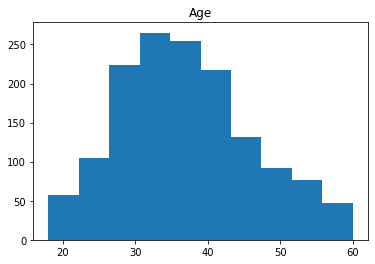

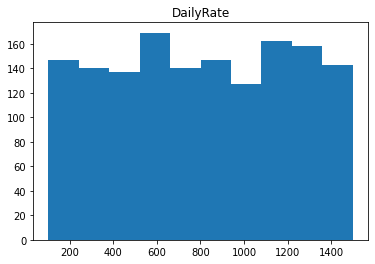

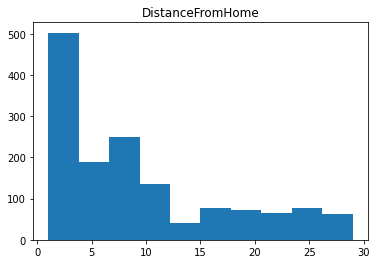

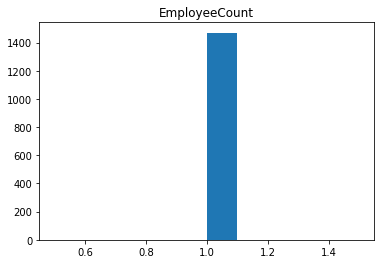

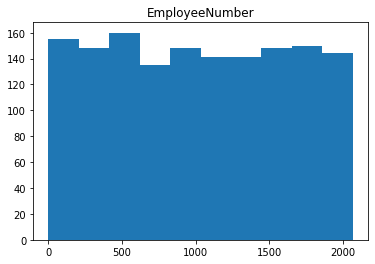

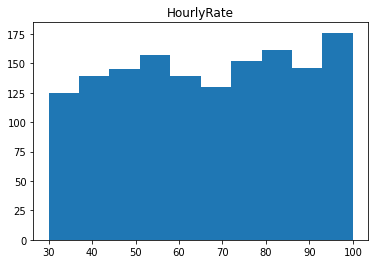

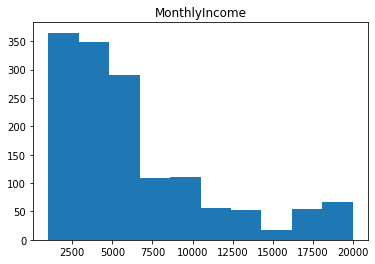

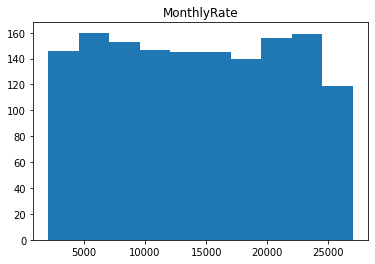

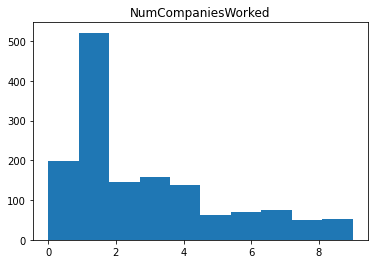

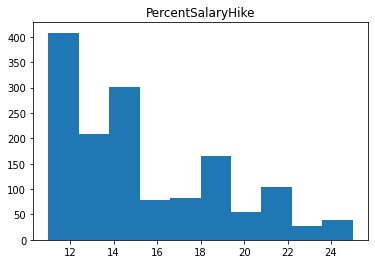

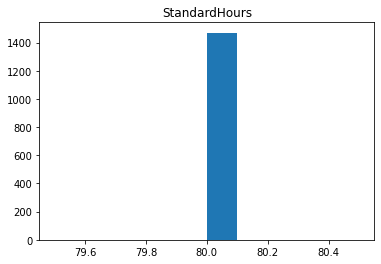

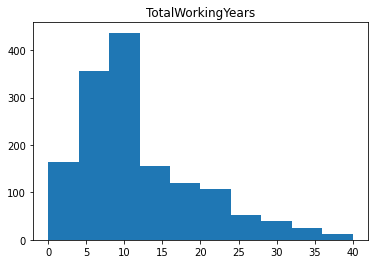

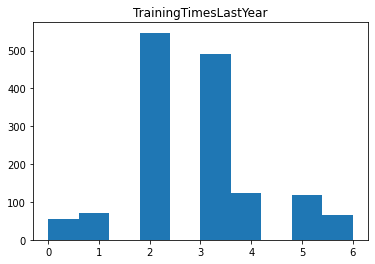

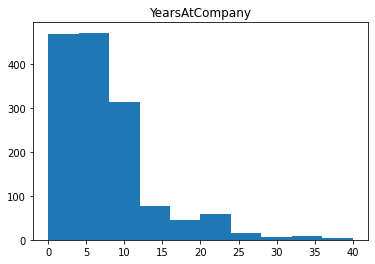

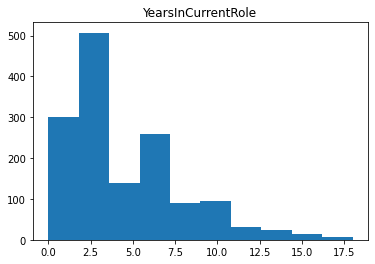

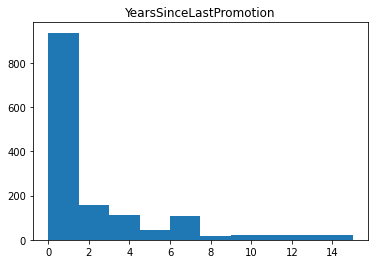

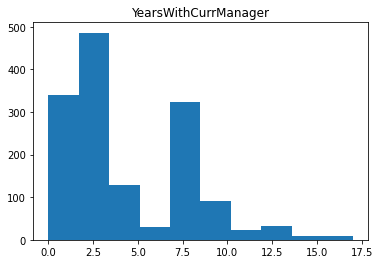

In [ ]:
# Data visualization
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

Some of them were normally distributed and uniformly distributed. Yet, most of them were positively skewed and
needed to be processed.
We found that some attributes are just constants, for example, “EmployeeCount”, “StandardHours” have the same
values regardless of the data instances. Thus, we need to remove them in the data preprocessing stage.

                              Age  ...  YearsWithCurrManager
Age                      1.000000  ...              0.202089
DailyRate                0.010661  ...             -0.026363
DistanceFromHome        -0.001686  ...              0.014406
EmployeeCount                 NaN  ...                   NaN
EmployeeNumber          -0.010145  ...             -0.009197
HourlyRate               0.024287  ...             -0.020123
MonthlyIncome            0.497855  ...              0.344079
MonthlyRate              0.028051  ...             -0.036746
NumCompaniesWorked       0.299635  ...             -0.110319
PercentSalaryHike        0.003634  ...             -0.011985
StandardHours                 NaN  ...                   NaN
TotalWorkingYears        0.680381  ...              0.459188
TrainingTimesLastYear   -0.019621  ...             -0.004096
YearsAtCompany           0.311309  ...              0.769212
YearsInCurrentRole       0.212901  ...              0.714365
YearsSinceLastPromotion 

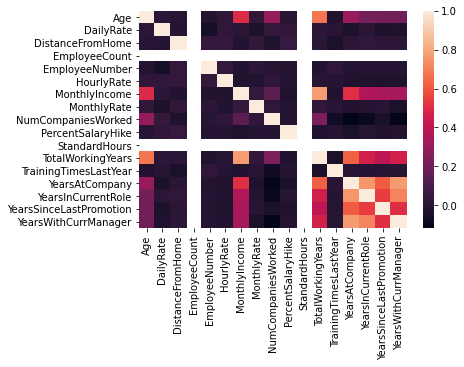

In [ ]:
print(df_num.corr())
sns.heatmap(df_num.corr())

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


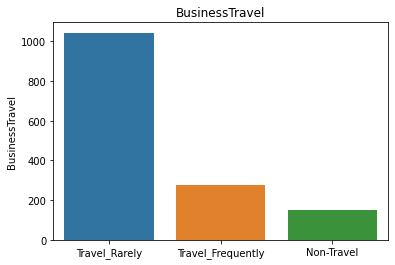

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


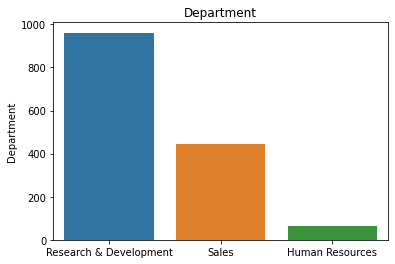

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


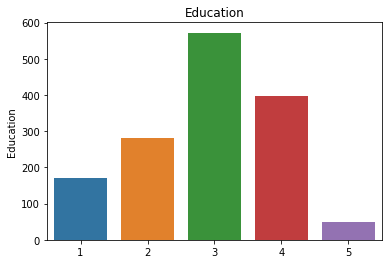

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


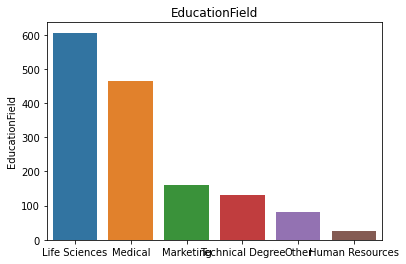

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


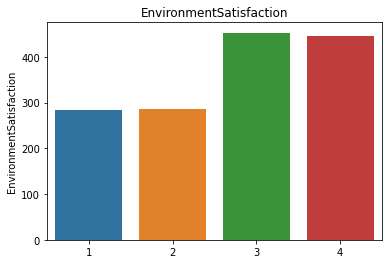

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


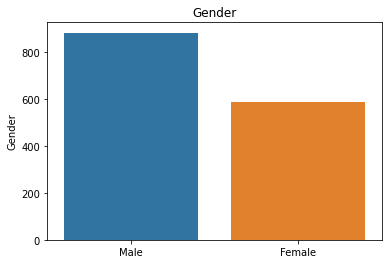

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


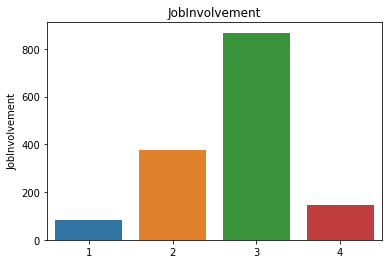

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


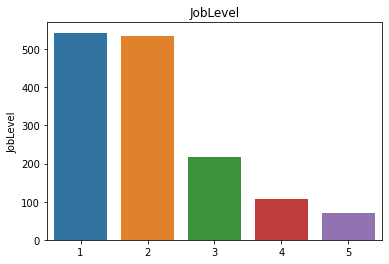

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


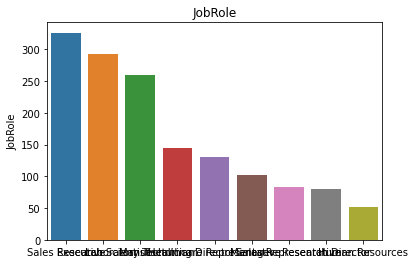

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


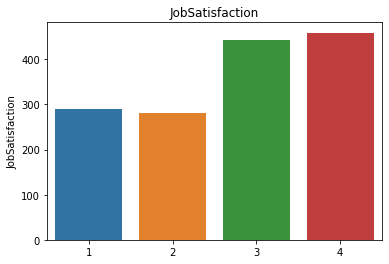

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


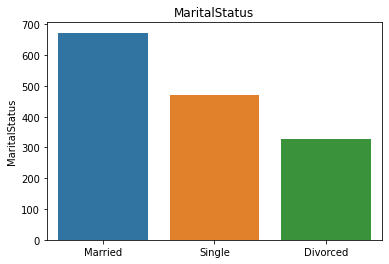

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


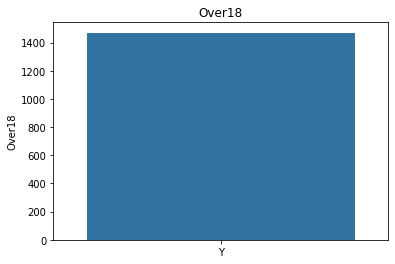

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


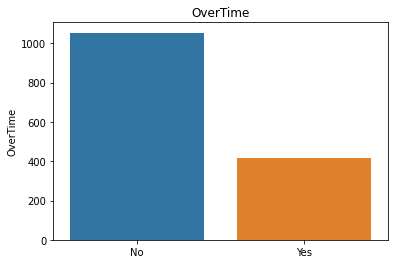

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


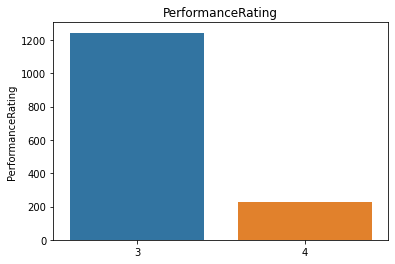

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


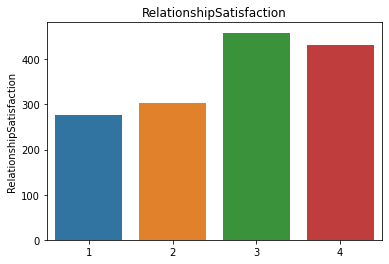

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


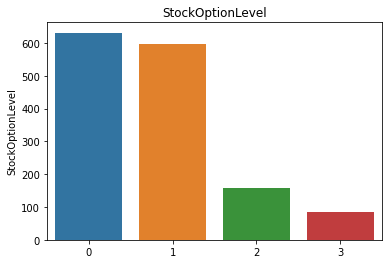

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


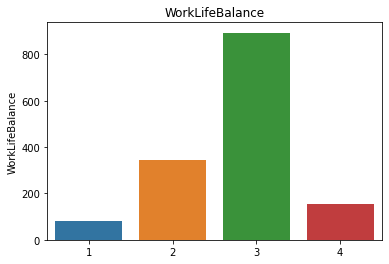

In [ ]:
for i in df_cat.columns:
    sns.barplot(df_cat[i].value_counts().index,df_cat[i].value_counts()).set_title(i)
    plt.show()

We found that some categorical attributes are
imbalanced, for example, there are more male than female.

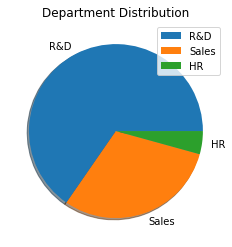

In [ ]:
labels = ['R&D', 'Sales', 'HR']
sizes = data['Department'].value_counts()
plt.pie(sizes, labels = labels,shadow = True)
plt.title('Department Distribution')
plt.legend()
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 37.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 8.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 32.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 16.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 62.0% of the points cannot be placed; yo

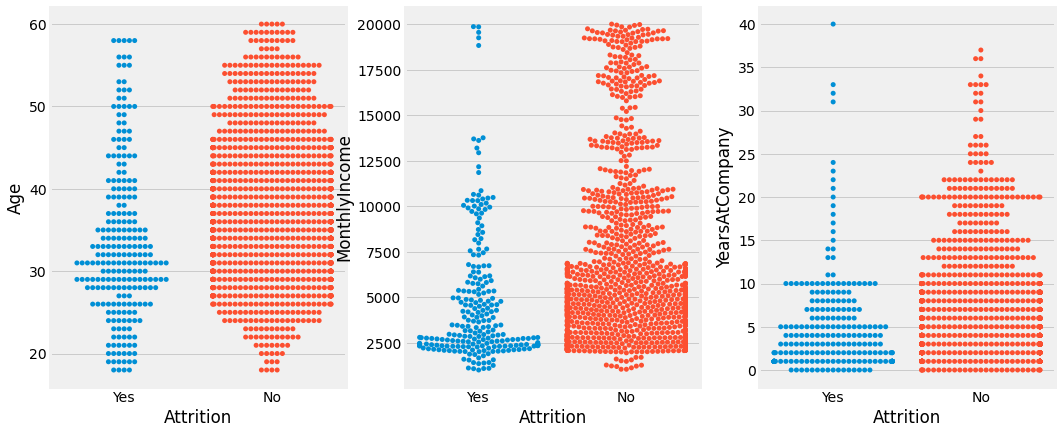

In [ ]:
# Attrition-Swarm plot 
plt.figure(figsize = (18, 7))
plt.style.use('fivethirtyeight')
plt.subplot(131)
sns.swarmplot(x="Attrition", y="Age",data = data)
plt.subplot(132)
sns.swarmplot(x="Attrition", y="MonthlyIncome", data = data)
plt.subplot(133)
sns.swarmplot(x="Attrition", y="YearsAtCompany", data = data)

We also conducted an Attrition-Swarm plot and age, income distribution by gender to increase our familiarity with
the dataset and to gather some interesting findings.

Text(0.5, 1.0, 'Income distribution by Gender')

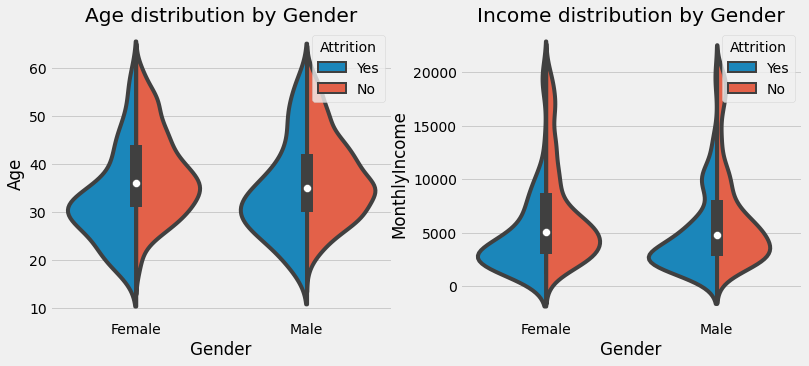

In [ ]:
# Age, Income distribution by Gender 
fig,ax = plt.subplots(1,2,figsize=(12,5))
sns.violinplot(x='Gender', y='Age',hue='Attrition',split=True,data=data, ax=ax[0]).set_title('Age distribution by Gender')
sns.violinplot(x='Gender', y='MonthlyIncome',hue='Attrition',split=True,data=data,ax=ax[1]).set_title('Income distribution by Gender')

We wanted to have a look into the distribution of each categorical attribute and on the other hand compare the
average numeric value of those who stay in IBM to those who left. One interesting discovery is that the average age
of those who resigned from their job were relatively young to those who stayed.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


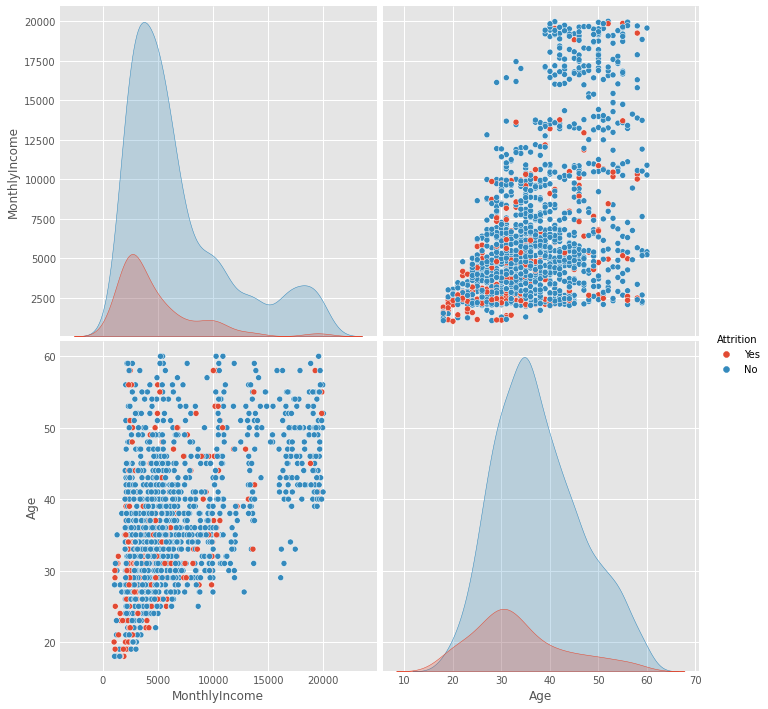

In [ ]:
# Age and monthly income pair plot 
plt.style.use('ggplot')
g = sns.pairplot(data, vars=["MonthlyIncome", "Age"],hue="Attrition",size=5)

# 2. Data pre-processing

## 2.1 Upsampling + Normalization + OneHotEncoding

**Upsampling** \
To address the class imbalance issue in the ‘Attrition’ attribute, we decided to upsample the data as our dataset is
small. Upsampling can ensure that information will not be lost but it makes up instances that actually do not exist.
Downsampling won’t make up any instances but data shrinkage will occur.

**Normalization** \
To mitigate the impact of numerical features being in different ranges ,and skewed, we did normalization on both
train and test data. For the implementation, we used MinMaxScaler with a range from 0 to 1

**One-Hot Encoding** \
There are categorical variables in the dataset and it is label encoded. Regardless, some categorical variables are not
ordinal, therefore, label encoding would not work very well in general. As a result, we decided to use One-Hot
Encoding technique to add a new binary variable for each unique categorical variable for all categorical variables.



In [ ]:
# Upsampling the minority class for dependent variable "Attrition"
print("number of Yes", y_data[y_data=="Yes"].shape)
print("number of No", y_data[y_data == "No"].shape)

y_data[y_data=="Yes"] = 1.0
y_data[y_data== "No"] = 0.0

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size =0.25, random_state = 20)

train_data = np.concatenate((x_train, y_train),axis =1)
test_data = np.concatenate((x_test, y_test),axis =1)

train_random_state_index =30
test_random_state_index =35
train_data = upsample_minority(train_data,train_random_state_index)
x_train, y_train = train_data[:,:-1], train_data[:,-1]
test_data = upsample_minority(test_data,test_random_state_index)
x_test, y_test = test_data[:,:-1], test_data[:,-1]
print("x train shape", x_train.shape)

# Remove the meaningless attributes "Employeecount", "EmployeeNumber", "Over18", "Standard hour"
x_train = x_train[:, [0,1,2,3,4,5,6,9,10,11,12,13,14,15,16,17,18,19,21,22,23,24,26,27,28,29,30,31,32,33]]
x_test = x_test[:, [0,1,2,3,4,5,6,9,10,11,12,13,14,15,16,17,18,19,21,22,23,24,26,27,28,29,30,31,32,33]]
print("x train", x_train.shape)
print(" x test", x_test.shape)
x_train = convert_to_pd(x_train, pd_column_precessed)
x_test = convert_to_pd(x_test, pd_column_precessed)
y_train = convert_to_pd(y_train, ["Attrition"])
y_test = convert_to_pd(y_test, ["Attrition"])
# x_train, y_train = pd.DataFrame(x_train), pd.DataFrame(y_train)
# x_test, y_test = pd.DataFrame(x_test), pd.DataFrame(y_test)
check_isdf(x_train, y_train,x_test, y_test )

# print(" ")
# print("x_train shape", x_train.shape)
# print("x_test shape", x_test.shape)
# print("y_train shape", y_train.shape)
# print("y_test shape", y_test.shape)

number of Yes (237,)
number of No (1233,)
test (926, 35)
before upsampling majority % 0.8402903811252269
after upsampling majority % 0.5
test (307, 35)
before upsampling majority % 0.8342391304347826
after upsampling majority % 0.5
x train shape (1852, 34)
x train (1852, 30)
 x test (614, 30)
input 0 is DataFrame
input 1 is DataFrame
input 2 is DataFrame
input 3 is DataFrame


In [ ]:
# Categorical and numerical features
# excluded repetitive and meaningless features 

# Only contain **upsampled** training data
train_numerical_feature = np.array(x_train.iloc[:,[0,2,4,9,15,16,17,19,23,24,26,27,28,29]])
train_numerical_feature = handle_na_numerical(train_numerical_feature)
train_numerical_normalized = normalization(train_numerical_feature)

train_categorical_feature = x_train.iloc[:,[1,3,5,6,7,8,10,11,12,13,14,18,20,21,22,25]]
train_encoder, train_categorical_encoded = onehotencoding(train_categorical_feature)
train_categorical_feature = np.array(train_categorical_feature)

test_numerical_feature = np.array(x_test.iloc[:,[0,2,4,9,15,16,17,19,23,24,26,27,28,29]])
test_numerical_feature = handle_na_numerical(test_numerical_feature)
test_numerical_normalized = normalization(test_numerical_feature)

test_categorical_feature = x_test.iloc[:,[1,3,5,6,7,8,10,11,12,13,14,18,20,21,22,25]]
test_encoder, test_categorical_encoded = onehotencoding(test_categorical_feature)
test_categorical_feature = np.array(test_categorical_feature)

In [ ]:
train_numerical_feature.shape

(1852, 14)

In [ ]:
test_numerical_normalized.shape

(614, 14)

In [ ]:
type(train_categorical_encoded)

numpy.ndarray

## 2.2 K-Mean clustering

We then adopted an unsupervised method- k-means clustering to
discover whether there are any underlying groupings in independent
variables. Considering the within-cluster sum of squares error
(WCSS), we found that 10 is the optimal number of clusters and this
feature could help us in the feature engineering process.

In [ ]:
K Mean clustering to identify the underlying grouping 
wcss = []
for i in range(1,50):
    num_cluster =i
    kmean = KMeans(n_clusters = num_cluster, init ='k-means++')
    clustering = kmean.fit(train_numerical_normalized)
    wcss.append(clustering.inertia_)

wcss = np.array(wcss)
plt.plot(wcss)
plt.title("WCSS for different n_clusters")
plt.show()
diff = wcss[1:]-wcss[:-1]
plt.plot(diff)
plt.title("Improvement in WCSS for n_clusters+1")
plt.show()

10 clusters is the optimal number of clusters 
final_kmean = KMeans(n_clusters = 10, init= 'k-means++')
final_clustering = final_kmean.fit(train_numerical_normalized)

## 2.3 Independence test

To further discover data correlation, we underwent two additional
correlation analysis which is Spearman rho test, Pearson correlation
test for numerical variable and Chi-square independence test for
categorical variable. Usually, uncorrelated independent variables are
more preferred since correlated features means their functionality in a
data model is overlapping. This may cause inefficient use of
computational resources and increase the training time. Moreover, we
must remove some attributes, and this may further intensify overfitting.

In [ ]:
# additional constant
global_pvalue_threshold =0.05
num_feature = train_numerical_normalized.shape[1]

Spearman rho test: correlation between numerical variable (after data preprocessing) 
Pearson correlation coefficient test (for linear correlation): correlation between numerical variable 
For black and white graph
p-value determines whether we accept or reject the hypothesis
if (p-value from the test < p-value threshold) then we reject the null hypothesis
Null hypothesis = not correlated 
statistical significance : black = accept, white = reject 


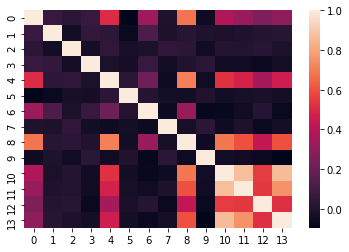

In [ ]:
# Spearman rho test (numerical normalize) 
rho_numerical, rho_pvalue_numerical= stats.spearmanr(train_numerical_normalized)
spearman_test_result_numerical = np.array(rho_pvalue_numerical<global_pvalue_threshold)
map3 = sns.heatmap(rho_numerical)

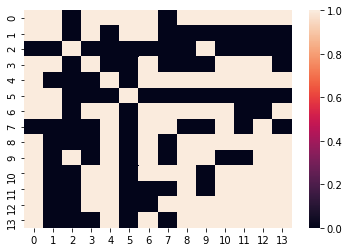

In [ ]:
map1 = sns.heatmap(spearman_test_result_numerical)

In [ ]:
train_numerical_normalized.shape

(1852, 14)

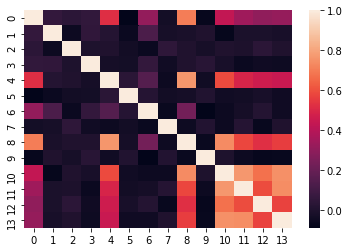

In [ ]:
# Pearson correlation coefficient test
pearson_numerical_correlation_list =[]
pearson_numerical_pvalue_list =[]
for x in range(train_numerical_normalized.shape[1]):
    level =[]
    level_pvalue=[]
    for y in range(train_numerical_normalized.shape[1]):
        correlation, correlation_pvalue = stats.pearsonr(
                                train_numerical_normalized[:,x], train_numerical_normalized[:,y])
        level.append(correlation)
        level_pvalue.append(correlation_pvalue)
    pearson_numerical_correlation_list.append(level)
    pearson_numerical_pvalue_list.append(level_pvalue)
pearson_numerical_correlation_list = np.array(pearson_numerical_correlation_list)      
pearson_numerical_pvalue_list = np.array(pearson_numerical_pvalue_list)
# True: Reject null, correlated            
pearson_numerical_test_result = np.array(pearson_numerical_pvalue_list < global_pvalue_threshold)
map4 = sns.heatmap(pearson_numerical_correlation_list)

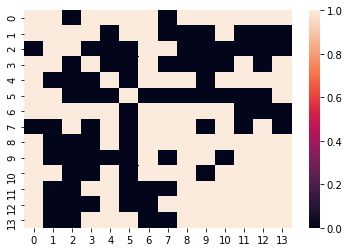

In [ ]:
 map2 = sns.heatmap(pearson_numerical_test_result)

Independence test

Null hypothesis: Independence 

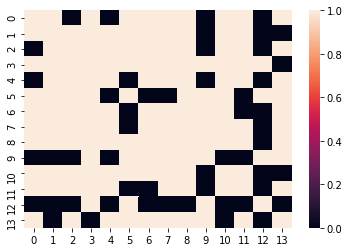

In [ ]:
# Chi2 independence test among the categorical independent variables themselves
chi2_indep_list =[]
chi2_indep_pvalue_list =[]
chi2_indep_dof_list =[]
for x in range(num_feature):
    level =[]
    level_pvalue=[]
    level_dof=[]
    for y in range(num_feature):
        table =pd.crosstab(train_categorical_feature[:,x], 
                           train_categorical_feature[:,y])
        test_statistic, pvalue, dof, _ = stats.chi2_contingency(table)
        level.append(test_statistic)
        level_pvalue.append(pvalue)
        level_dof.append(dof)
    chi2_indep_list.append(level)
    chi2_indep_pvalue_list.append(level_pvalue)
    chi2_indep_dof_list.append(level_dof)
chi2_indep_list = np.array(chi2_indep_list)
chi2_indep_pvalue_list = np.array(chi2_indep_pvalue_list)
chi2_indep_dof_list = np.array(chi2_indep_dof_list)
# True: Reject null, correlated            
chi2_indep_test_result = np.array(chi2_indep_pvalue_list < global_pvalue_threshold)
map2 = sns.heatmap(chi2_indep_test_result)

In [ ]:
# Chi2 independence test between independent categorical varaibles and the dependent variable
chi2_list = []
chi2_pvalue_list = []
dof_list =[]
for i in range(train_categorical_feature.shape[1]):
    table =pd.crosstab(np.array(y_train).reshape(y_train.shape[0]), train_categorical_feature[:,i])
    test_statistic, pvalue, dof, _ = stats.chi2_contingency(table)
    chi2_list.append(test_statistic)
    chi2_pvalue_list.append(pvalue)
    dof_list.append(dof)
chi2_categ_list = np.array(chi2_list)
chi2_categ_pvalue_list = np.array(chi2_pvalue_list)
dof_list = np.array(dof_list)

chi2_id_categ_test_result = np.array(chi2_categ_pvalue_list<global_pvalue_threshold)
index_to_drop_categorical_feature =[]
for i, x in enumerate(chi2_id_categ_test_result):
    if x ==False:
        print("index to drop", i)
        index_to_drop_categorical_feature.append(i)
print("True = dependence (reject null hypothesis), False = independence (null hypothesis Not rejected)")
print(chi2_categ_list)
print(chi2_categ_pvalue_list)
print(chi2_id_categ_test_result)
print("True: dependence (rejected the null hypothesis)")
print("   ")

index to drop 2
index to drop 5
index to drop 12
index to drop 13
True = dependence (reject null hypothesis), False = independence (null hypothesis Not rejected)
[5.67844813e+01 4.45068891e+01 5.28970760e+00 4.02268025e+01
 5.75290140e+01 1.82467049e-01 6.91138204e+01 1.19758015e+02
 1.89534577e+02 2.70690026e+01 1.13322545e+02 2.07558179e+02
 2.73310659e-01 5.33625245e+00 1.81716530e+02 5.93954613e+01]
[4.67096450e-13 2.16496977e-10 2.58841974e-01 1.34406964e-07
 1.98142817e-12 6.69261614e-01 6.60693183e-15 6.01651553e-25
 1.02031194e-36 5.69447544e-06 2.46786836e-25 4.68399614e-47
 6.01119551e-01 1.48767246e-01 3.75633875e-39 7.91392188e-13]
[ True  True False  True  True False  True  True  True  True  True  True
 False False  True  True]
True: dependence (rejected the null hypothesis)
   


In [ ]:
# Chi2 independence test for numerical independent variables and the dependent variable
chi2_num_list = []
chi2_num_pvalue_list = []
dof_num_list =[]
for i in range(train_numerical_feature.shape[1]):
    count, bin_edges,bin_number =stats.binned_statistic(train_numerical_normalized[:,i], 
                                    train_numerical_normalized[:,i], statistic='count', bins=5)
    
    table =pd.crosstab(np.array(y_train).reshape(y_train.shape[0]), bin_number)
    test_statistic, pvalue, dof, expected_freq = stats.chi2_contingency(table)
    chi2_num_list.append(test_statistic)
    chi2_num_pvalue_list.append(pvalue)
    dof_num_list.append(dof)
chi2_num_list = np.array(chi2_num_list)
chi2_num_pvalue_list = np.array(chi2_num_pvalue_list)
dof_num_list = np.array(dof_num_list)

chi2_id_num_test_result = np.array(chi2_num_pvalue_list<global_pvalue_threshold)
index_to_drop_numerical_feature =[]
for i, x in enumerate(chi2_id_num_test_result):
    if x ==False:
        print("index to drop", i)
        index_to_drop_numerical_feature.append(i)
print("True = dependence (reject null hypothesis), False = independence (null hypothesis Not rejected)")
print(chi2_num_list)
print(chi2_num_pvalue_list)
print(chi2_id_num_test_result)

index to drop 7
True = dependence (reject null hypothesis), False = independence (null hypothesis Not rejected)
[ 94.19086958  24.06139143  17.78000289  14.80415702  75.24013153
  26.30398863  41.92506084   7.53036652 126.92224561  21.76481354
  56.63579401  55.52489385  23.64140803  53.02951079]
[1.69362168e-19 7.76430955e-05 1.36244125e-03 5.12512998e-03
 1.77266242e-15 2.74776184e-05 1.72890483e-08 1.10377688e-01
 1.77207629e-26 2.23221080e-04 1.47511679e-11 2.52201884e-11
 9.42421853e-05 8.40143939e-11]
[ True  True  True  True  True  True  True False  True  True  True  True
  True  True]


After the Spearman rho test and Pearson correlation test (numerical Group 1), we discovered many numerical features were highly correlated among themselves. Thus, we need to make the attributes uncorrelated in the feature engineering section. \
For Chi-square independence test, we did three groups of testing to test statistics output of categorical variables.
Which is independence test 1) among the categorical independent variables themselves, 2) between independent
categorical variable and the dependent variable, 3) between discretized independent numerical variables and the
dependent variable. The followings are our findings:


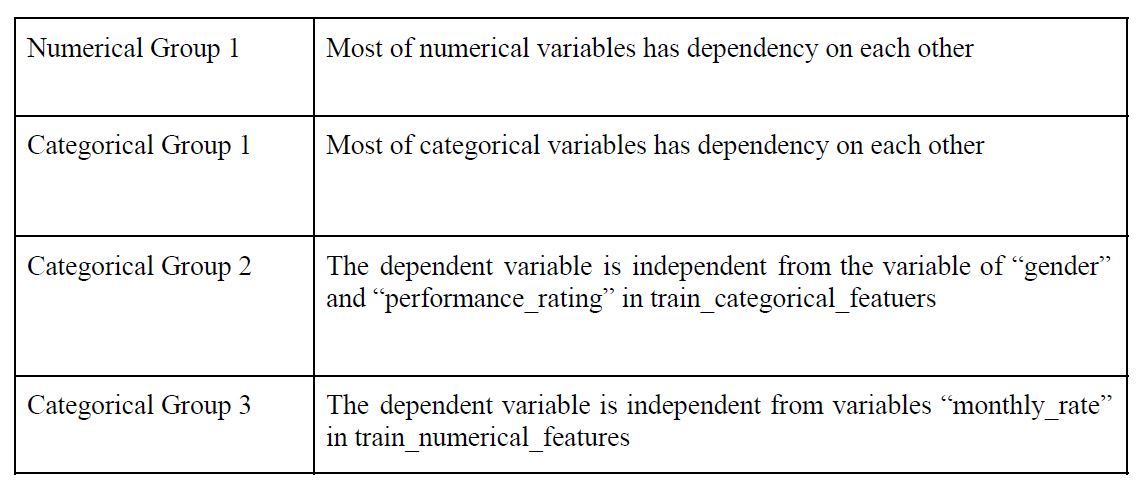

## 2.4 Equal variance test + transformation

After we looked into data correlation and normalized independent numerical variables into (0,1), we wanted to test
for equal variance among them because the performance of machine learning is usually better when we have equal
variance.

 white = Unequal variance (reject null hypothesis), black = Equal variance (null hypothesis Not rejected)


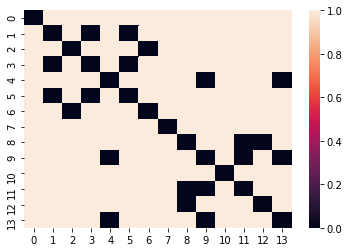

In [ ]:
# Levene test for equal variance
# Null hypothesis: all inputs has equal variance
# black = accept, white = reject 
array = np.split(train_numerical_normalized,train_numerical_normalized.shape[1], axis =1)
array = [x.squeeze() for x in array]

levene_statistic_list =[]
levene_pvalue_list =[]
for y in range(num_feature):
    level = []
    level_pvalue =[]
    for z in range(num_feature):
        levene_statistic, levene_pvalue = stats.levene(array[y], array[z])
        level.append(levene_statistic)
        level_pvalue.append(levene_pvalue)
    levene_statistic_list.append(level)
    levene_pvalue_list.append(level_pvalue)
levene_statistic_list = np.array(levene_statistic_list)
levene_pvalue_list = np.array(levene_pvalue_list)
#sns.heatmap(levene_pvalue_list)
print(" white = Unequal variance (reject null hypothesis), black = Equal variance (null hypothesis Not rejected)")
levene_result = np.array(levene_pvalue_list <global_pvalue_threshold)
sns.heatmap(levene_result)

(1852, 14)


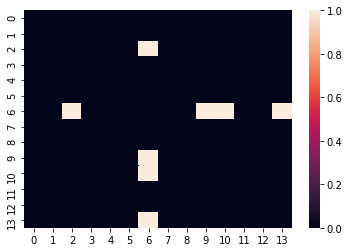

In [ ]:
# transforming to equal variance 
def transformation_to_equal_variance(inputs):
    input_list = np.split(inputs,inputs.shape[1], axis =1)
    input_list = [x.squeeze() for x in input_list]
    result_collection = []
    for component in input_list:
        result, _ = stats.yeojohnson(component)
        result_collection.append(result)
    result_collection = np.array(result_collection).reshape(-1, inputs.shape[1])
    return result_collection

result1 = transformation_to_equal_variance(train_numerical_normalized)
train_numerical_transformed = transformation_to_equal_variance(result1)
train_numerical_transformed = normalization(train_numerical_transformed)
print(train_numerical_transformed.shape)

r1, r2, r3 = levene_test(train_numerical_transformed)

result2 = transformation_to_equal_variance(test_numerical_normalized)
test_numerical_transformed = transformation_to_equal_variance(result2)
test_numerical_transformed = normalization(test_numerical_transformed)

However, after we conducted the Levene test, we discovered that most of the normalized variables don’t
have equal variance.

Based on the result of the Levene test for equal variance, we performed transformation to bring all numerical
variables to the same variance, with a few pairs still remaining unequal in variance after the transformation.

In [ ]:
# combining pre-processed numerical and categorical features 
x_train_combined = np.concatenate((train_numerical_transformed, train_categorical_encoded), axis =1)
pd_num_columns = data.iloc[:,[0,3,5,12,18,19,20,23,28,29,31,32,33,34]].columns
pd_cat_columns = data.iloc[:,[2,4,6,7,10,11,13,14,15,16,17,22,24,25,27,30]].columns
feature_name = train_encoder.get_feature_names()

train_processed_columns = np.concatenate((np.array(pd_num_columns), np.array(feature_name)))
print(feature_name)
x_train = convert_to_pd(x_train_combined, train_processed_columns)
print(x_train.shape)


x_test_combined = np.concatenate((test_numerical_transformed, test_categorical_encoded), axis =1)
feature_name = test_encoder.get_feature_names()
test_processed_columns = np.concatenate((np.array(pd_num_columns), np.array(feature_name)))
x_test = convert_to_pd(x_test_combined, test_processed_columns)
print(x_test.shape)

['x0_Non-Travel' 'x0_Travel_Frequently' 'x0_Travel_Rarely'
 'x1_Human Resources' 'x1_Research & Development' 'x1_Sales' 'x2_1' 'x2_2'
 'x2_3' 'x2_4' 'x2_5' 'x3_Human Resources' 'x3_Life Sciences'
 'x3_Marketing' 'x3_Medical' 'x3_Other' 'x3_Technical Degree' 'x4_1'
 'x4_2' 'x4_3' 'x4_4' 'x5_Female' 'x5_Male' 'x6_1' 'x6_2' 'x6_3' 'x6_4'
 'x7_1' 'x7_2' 'x7_3' 'x7_4' 'x7_5' 'x8_Healthcare Representative'
 'x8_Human Resources' 'x8_Laboratory Technician' 'x8_Manager'
 'x8_Manufacturing Director' 'x8_Research Director'
 'x8_Research Scientist' 'x8_Sales Executive' 'x8_Sales Representative'
 'x9_1' 'x9_2' 'x9_3' 'x9_4' 'x10_Divorced' 'x10_Married' 'x10_Single'
 'x11_No' 'x11_Yes' 'x12_3' 'x12_4' 'x13_1' 'x13_2' 'x13_3' 'x13_4'
 'x14_0' 'x14_1' 'x14_2' 'x14_3' 'x15_1' 'x15_2' 'x15_3' 'x15_4']
(1852, 78)
(614, 78)


In [ ]:
print(test_numerical_transformed.shape)
print(test_categorical_encoded.shape)

(614, 14)
(614, 64)


## 2.5 Outlier detection

Since outliers might cause overfitting and skew the prediction of the model, we would need to identify the outliers.
Isolation Forest is an unsupervised learning to detect anomaly in our dataset. Noisy feature detection is another
strategy we will employ, but, this can only be implemented after the modeling stage. The package, featexp, feature
exploration for supervised learning would be used. Noisy features tend to overfit , by comparing the changes in
trend and trend correlation for different attributes in training and validation dataset , it would help us in identifying
overfitting features. \
However, since the data set is small, we have not directly deleted data. Instead, we focus on using models and
techniques that are resistant to outliers. We would also employ much feature engineering in the following in order
to create features that are less affected by outliers.

In [ ]:
# -1 = outlier, 1 = normal
_, outlier = outlier_detection(x_train_combined)
print(outlier[outlier==-1].shape)

(845,)


In [ ]:
train_numerical_transformed.shape

(1852, 14)

# 3. Feature Engineering

New features would be created via the cleaned data with feature engineering. \

While performing feature engineering, we perform Chi-square independence tests immediately on the attribute and
reject the attribute if its p-value is higher than the threshold (0.05). In this way, we could ensure that the feature
created is meaningful and would not introduce noise if we input them into the model or use them to engineer
additional new features.

## 3.1 Removie unnecessary feature

In [ ]:
# Removing features according to the independence test
# index_to_drop_numerical_feature, index_to_drop_categorical_feature
train_dropped_numerical_feature = train_numerical_feature[index_to_drop_numerical_feature]
train_dropped_numerical_normalized = train_numerical_normalized[index_to_drop_numerical_feature]
train_dropped_numerical_transformed = train_numerical_transformed[index_to_drop_numerical_feature]
train_dropped_categorical_feature = train_categorical_feature[index_to_drop_categorical_feature]

test_dropped_numerical_feature = test_numerical_feature[index_to_drop_numerical_feature]
test_dropped_numerical_normalized = test_numerical_normalized[index_to_drop_numerical_feature]
test_dropped_numerical_transformed = test_numerical_transformed[index_to_drop_numerical_feature]
test_dropped_categorical_feature = test_categorical_feature[index_to_drop_categorical_feature]

train_numerical_feature = np.delete(train_numerical_feature, index_to_drop_numerical_feature, axis =1)
train_numerical_normalized = np.delete(train_numerical_normalized, index_to_drop_numerical_feature, axis=1 )
train_numerical_transformed = np.delete(train_numerical_transformed, index_to_drop_numerical_feature, axis=1)
train_categorical_feature = np.delete(train_categorical_feature, index_to_drop_categorical_feature, axis=1)


test_numerical_feature = np.delete(test_numerical_feature, index_to_drop_numerical_feature, axis=1)
test_numerical_normalized = np.delete(test_numerical_normalized, index_to_drop_numerical_feature, axis=1)
test_numerical_transformed = np.delete(test_numerical_transformed, index_to_drop_numerical_feature, axis=1)
test_categorical_feature = np.delete(test_categorical_feature, index_to_drop_categorical_feature, axis=1)

train_encoder, train_categorical_encoded = onehotencoding(train_categorical_feature)
test_encoder, test_categorical_encoded = onehotencoding(test_categorical_feature.reshape((test_categorical_feature.shape[0],-1)))

In [ ]:
train_categorical_feature[0,:]

array(['Travel_Rarely', 'Sales', 'Life Sciences', 2, 3, 3,
       'Sales Executive', 2, 'Single', 'Yes', 0, 2], dtype=object)

In [ ]:
index_to_drop_categorical_feature

[2, 5, 12, 13]

## 3.2 Princals (PCA by means of Alternating Least Square (ALS))

We used principal component analysis (PCA) to extract a representation of data with a lower dimension (i.e. the
Principal Component). PCA could prevent the problems associated with the curse of dimensionality (e.g.
overfitting), and it can be used to emphasize variation and strong patterns in the dataset. Reducing the
dimensionality of data would also help to reduce computation time and allow the model to easily learn the patterns
in the data.

For Categorical PCA, we used the PRINCALS algorithm (Gifi, 1990) (Principal Component Analysis by means of
Alternating Least Square (ALS)).

Python does not have a package for performing this categorical PCA algorithm. Thus, a package from R named
“princals” is utilized within python. \

We examined the transformed data’s weightings and eigenvalues to ensure the result is meaningful. Since PCA is
designed for continuous variables, the concept of squared deviation would not hold very well when there are binary
variables. \

The weightings of linear combinations of the transformation and eigenvalues were examined and showed that all
the categorical principal components were meaningful and we kept all of them.

In [ ]:
train_categorical_feature_pd, test_categorical_feature_pd = pd.DataFrame(train_categorical_feature), pd.DataFrame(test_categorical_feature)

In [ ]:
print(x_train.shape)
print(train_numerical_feature.shape)

(1852, 78)
(1852, 13)


In [ ]:
'''train_categorical_feature_pd.to_csv('train_categorical_feature_pd.csv')
test_categorical_feature_pd.to_csv('test_categorical_feature_pd.csv')'''

"train_categorical_feature_pd.to_csv('train_categorical_feature_pd.csv')\ntest_categorical_feature_pd.to_csv('test_categorical_feature_pd.csv')"

In [ ]:
'''%%R
train_categorical_feature_pd <- read.csv("/content/train_categorical_feature_pd.csv", header = TRUE, row.name = "X")
test_categorical_feature_pd <- read.csv("/content/test_categorical_feature_pd.csv", header = TRUE, row.name = "X")'''

'%%R\ntrain_categorical_feature_pd <- read.csv("/content/train_categorical_feature_pd.csv", header = TRUE, row.name = "X")\ntest_categorical_feature_pd <- read.csv("/content/test_categorical_feature_pd.csv", header = TRUE, row.name = "X")'

In [ ]:
# Feature Engineering 
'''%%R
a <- princals(train_categorical_feature_pd, ordinal = FALSE)
b <- princals(test_categorical_feature_pd, ordinal = FALSE)'''

'%%R\na <- princals(train_categorical_feature_pd, ordinal = FALSE)\nb <- princals(test_categorical_feature_pd, ordinal = FALSE)'

In [ ]:
'''%%R
princals_categorical_train_transform <- a$transform
princals_categorical_train_scoremat <- a$scoremat
princals_categorical_train_quant <- a$quantifications
princals_categorical_test_transform <- b$transform
princals_categorical_test_scoremat <- b$scoremat
princals_categorical_test_quant <- b$quantifications'''

'%%R\nprincals_categorical_train_transform <- a$transform\nprincals_categorical_train_scoremat <- a$scoremat\nprincals_categorical_train_quant <- a$quantifications\nprincals_categorical_test_transform <- b$transform\nprincals_categorical_test_scoremat <- b$scoremat\nprincals_categorical_test_quant <- b$quantifications'

In [ ]:
'''%%R
summary(princals_categorical_train_quant)
# quant have different no.of rows, can't transform it to csv'''

"%%R\nsummary(princals_categorical_train_quant)\n# quant have different no.of rows, can't transform it to csv"

In [ ]:
'''%%R
write.csv(princals_categorical_train_transform, "/content/princals_categorical_train_transform.csv")
write.csv(princals_categorical_train_scoremat, "/content/princals_categorical_train_scoremat.csv")
#write.csv(princals_categorical_train_quant, "/content/princals_categorical_train_quant.csv")
write.csv(princals_categorical_test_transform, "/content/princals_categorical_test_transform.csv")
write.csv(princals_categorical_test_scoremat, "/content/princals_categorical_test_scoremat.csv")
#write.csv(princals_categorical_test_quant, "/content/princals_categorical_test_quant.csv")'''

'%%R\nwrite.csv(princals_categorical_train_transform, "/content/princals_categorical_train_transform.csv")\nwrite.csv(princals_categorical_train_scoremat, "/content/princals_categorical_train_scoremat.csv")\n#write.csv(princals_categorical_train_quant, "/content/princals_categorical_train_quant.csv")\nwrite.csv(princals_categorical_test_transform, "/content/princals_categorical_test_transform.csv")\nwrite.csv(princals_categorical_test_scoremat, "/content/princals_categorical_test_scoremat.csv")\n#write.csv(princals_categorical_test_quant, "/content/princals_categorical_test_quant.csv")'

In [ ]:
'''principal_component_cat_train_transform = pd.read_csv("/content/princals_categorical_train_transform.csv")
principal_component_cat_train_scoremat = pd.read_csv("/content/princals_categorical_train_scoremat.csv")
principal_component_cat_test_transform = pd.read_csv("/content/princals_categorical_test_transform.csv")
principal_component_cat_test_scoremat = pd.read_csv("/content/princals_categorical_test_scoremat.csv")'''

'principal_component_cat_train_transform = pd.read_csv("/content/princals_categorical_train_transform.csv")\nprincipal_component_cat_train_scoremat = pd.read_csv("/content/princals_categorical_train_scoremat.csv")\nprincipal_component_cat_test_transform = pd.read_csv("/content/princals_categorical_test_transform.csv")\nprincipal_component_cat_test_scoremat = pd.read_csv("/content/princals_categorical_test_scoremat.csv")'

In [ ]:
#principal_component_cat_test_transform.head()

In [ ]:
np.array(y_train)

array([[1.0],
       [0.0],
       [1.0],
       ...,
       [1.0],
       [1.0],
       [0.0]], dtype=object)

## 3.25

In [ ]:
url_principal_component = "https://raw.githubusercontent.com/charlottetse32/IBM_Classification/main/principal_component.csv"
principal_component = pd.read_csv(url_principal_component)
url_quantified_data = "https://raw.githubusercontent.com/charlottetse32/IBM_Classification/main/quantified_data.csv"
quantified_data = pd.read_csv(url_quantified_data)
url_weighting = "https://raw.githubusercontent.com/charlottetse32/IBM_Classification/main/weighting.csv"
weighting = pd.read_csv(url_weighting)
url_train_categorical_pca = "https://raw.githubusercontent.com/charlottetse32/IBM_Classification/main/train_categorical_pca_output.csv"
train_categorical_pca_output = pd.read_csv(url_train_categorical_pca) 

In [ ]:
url_train_categorical_pca_output = "https://raw.githubusercontent.com/charlottetse32/IBM_Classification/main/train_categorical_pca_output.csv"
train_categorical_pca_output = pd.read_csv(url_train_categorical_pca_output)

In [ ]:
train_categorical_pca_output = np.array(train_categorical_pca_output)
train_categorical_principal_component = train_categorical_pca_output[:, 0:12]
train_categorical_quantified = train_categorical_pca_output[:, 12:24]
train_categorical_weighting = train_categorical_pca_output[:train_categorical_feature.shape[1], 24:]

In [ ]:
train_categorical_pca_output.shape

(1852, 36)

In [ ]:
train_categorical_pca_output

array([[-0.40839285, -0.32483154,  1.21195019, ...,  0.08223499,
         0.3660374 ,  0.05372891],
       [-0.30937486,  1.1974826 , -1.69682317, ...,  0.31572278,
        -0.07752626,  0.39736918],
       [-0.94213332, -0.72904094, -0.95468007, ...,  0.06891643,
         0.37666401, -0.04829594],
       ...,
       [-0.7566465 , -0.88629404, -1.17868195, ...,         nan,
                nan,         nan],
       [ 0.33727681, -0.36828712,  1.20664855, ...,         nan,
                nan,         nan],
       [ 2.52422886, -1.39809128, -1.50220514, ...,         nan,
                nan,         nan]])

In [ ]:
train_categorical_weighting

array([[ 0.44289821,  0.14068306,  0.05787972, -0.23130298, -0.22928322,
        -0.29142281,  0.37608832, -0.38766046, -0.39286695,  0.08223499,
         0.3660374 ,  0.05372891],
       [ 0.13328338, -0.45809597,  0.0498724 ,  0.44816411, -0.49357092,
         0.082378  ,  0.04963772, -0.10631078,  0.20319341,  0.31572278,
        -0.07752626,  0.39736918],
       [-0.25275177,  0.16833105, -0.25968332,  0.13041256, -0.28160268,
        -0.00633892, -0.66522891, -0.36811374, -0.13039602,  0.06891643,
         0.37666401, -0.04829594],
       [ 0.69724085,  0.38684855, -0.03483963, -0.01636661, -0.00975638,
         0.21119812, -0.39764541, -0.08981186,  0.25266001, -0.14260814,
        -0.25645107,  0.04350328],
       [-0.34706494,  0.29814366,  0.11372135, -0.37973607, -0.40053204,
         0.13569539,  0.19687545, -0.40213754,  0.22598452, -0.27341301,
        -0.35822112,  0.0080319 ],
       [ 0.18192783, -0.56388502, -0.20865275,  0.12747219, -0.1776579 ,
        -0.49288618, -

In [ ]:
'''
The weighting shows that almost all categorical features have significant weighting in different principal component

Eigenvalues (from R)
1.7346784 1.5331461 1.1620189 1.0987861 1.0321659 1.0135967 0.9807778 0.9215732 0.8689275 0.7599563 0.4676894 0.4266837

All of the eigenvalues are significant
Hence, we will take all of the principal components
'''

'\nThe weighting shows that almost all categorical features have significant weighting in different principal component\n\nEigenvalues (from R)\n1.7346784 1.5331461 1.1620189 1.0987861 1.0321659 1.0135967 0.9807778 0.9215732 0.8689275 0.7599563 0.4676894 0.4266837\n\nAll of the eigenvalues are significant\nHence, we will take all of the principal components\n'

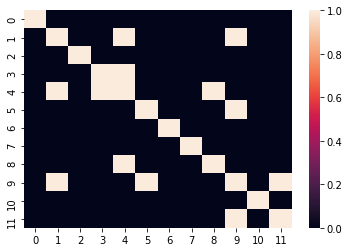

In [ ]:
rho, rho_pvalue= stats.spearmanr(train_categorical_principal_component)
test_result = np.array(rho_pvalue<global_pvalue_threshold)
map1 = sns.heatmap(test_result)

In [ ]:
index_to_drop_categorical_feature

[2, 5, 12, 13]

In [ ]:
train_categorical_principal_component

array([[-0.40839285, -0.32483154,  1.21195019, ...,  0.11937007,
         0.22031833,  0.68954867],
       [-0.30937486,  1.1974826 , -1.69682317, ...,  0.56752313,
         1.12980293,  0.60829844],
       [-0.94213332, -0.72904094, -0.95468007, ..., -1.22084363,
         1.18085849,  1.09112398],
       ...,
       [-0.7566465 , -0.88629404, -1.17868195, ...,  0.93303475,
         0.17734249, -0.10884966],
       [ 0.33727681, -0.36828712,  1.20664855, ..., -0.6340164 ,
         0.14463483,  1.5744904 ],
       [ 2.52422886, -1.39809128, -1.50220514, ..., -0.9974676 ,
         0.30423551, -2.28879079]])

In [ ]:
train_categorical_principal_component_discretized = discretize(train_categorical_principal_component)

In [ ]:
test_result_categorical_pca, _, _,_ = chi2_independence_test(y_train, train_categorical_principal_component_discretized, 0.05)

test result: [ True  True  True  True  True  True  True  True False  True  True  True]


In [ ]:
train_categorical_quantified

array([[ 6.12284998e-03,  4.07389127e-03,  3.76790171e-03, ...,
         7.73453356e-04, -1.89554986e-03, -1.35522858e-04],
       [ 6.12284998e-03, -7.16699031e-04, -1.49693660e-02, ...,
        -4.88604455e-04, -1.89554986e-03, -9.48094420e-04],
       [ 6.12284998e-03, -2.44100873e-03, -1.15014706e-03, ...,
        -4.88604455e-04,  1.04974291e-03, -1.35522858e-04],
       ...,
       [-2.74663329e-02,  4.07389127e-03, -1.75616090e-05, ...,
        -4.88604455e-04, -1.89554986e-03,  1.13975357e-04],
       [-8.97148989e-03, -2.44100873e-03,  3.76790171e-03, ...,
         7.73453356e-04,  1.04974291e-03, -1.35522858e-04],
       [ 6.12284998e-03, -2.44100873e-03, -1.75616090e-05, ...,
        -4.88604455e-04,  1.04974291e-03,  1.13975357e-04]])

In [ ]:
index_to_drop_categorical_pca=[]
for i, x in enumerate(test_result_categorical_pca):
    if x ==False:
        print("index to drop", i)
        index_to_drop_categorical_pca.append(i)

index to drop 8


In [ ]:
train_categorical_principal_component = np.delete(train_categorical_principal_component,index_to_drop_categorical_pca, axis=1)

In [ ]:
train_categorical_principal_component.shape

(1852, 11)

## 3.3 Regular dimensionity reduction for numerical variables

We tried both kernel PCA with gaussian kernel and linear PCA since the data structure might be linear or
nonlinear.

In [ ]:
# PCA for numerical variables
pca = KernelPCA(kernel = 'rbf', n_components=20)
print("train_numerical_transformed shape", train_numerical_transformed.shape)
train_numerical_principal_component = pca.fit_transform(train_numerical_normalized)

pca_regular = PCA()
train_numerical_principal_component_linear = pca_regular.fit_transform(train_numerical_normalized)

# Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis()
train_numerical_lda_component = lda.fit_transform(train_numerical_feature, 
                            np.array(y_train, dtype=np.float).reshape((-1)))

# # Factor analysis
# factor_analysis = FactorAnalysis(n_components=3)
# train_numerical_factor = factor_analysis.fit_transform(train_numerical_feature)

train_numerical_transformed shape (1852, 13)


In [ ]:
train_numerical_principal_component_linear

array([[ 5.51057513e-01,  5.35269354e-01, -3.62802785e-01, ...,
         8.43786333e-04, -2.43439860e-01, -5.49614752e-02],
       [-1.50559634e-01, -1.81187870e-03,  4.02821353e-01, ...,
         1.10261826e-02, -6.45124962e-02, -1.33783450e-03],
       [-2.12595302e-01,  4.26180881e-01,  3.02924389e-01, ...,
        -5.90146447e-03,  3.53806231e-02,  1.88767856e-03],
       ...,
       [-2.10098443e-01,  7.75075768e-02,  1.78829582e-01, ...,
        -7.72507738e-03, -3.85070448e-03,  3.76579455e-02],
       [-1.08712259e-01,  6.79911321e-01, -2.56175340e-01, ...,
         1.29944111e-02, -1.77318012e-01, -1.40043352e-01],
       [ 1.12046302e+00, -1.51535187e-01, -6.47160154e-02, ...,
        -1.07549422e-01, -2.29505905e-01, -5.64171988e-02]])

In [ ]:
pca_regular.explained_variance_ratio_

array([0.24645988, 0.13764849, 0.11541024, 0.1074719 , 0.10498507,
       0.09354622, 0.05895746, 0.04893653, 0.03005654, 0.02748995,
       0.01326446, 0.01054932, 0.00522393])

In [ ]:
train_numerical_transformed.shape

(1852, 13)

In [ ]:
train_numerical_principal_component_linear

array([[ 5.51057513e-01,  5.35269354e-01, -3.62802785e-01, ...,
         8.43786333e-04, -2.43439860e-01, -5.49614752e-02],
       [-1.50559634e-01, -1.81187870e-03,  4.02821353e-01, ...,
         1.10261826e-02, -6.45124962e-02, -1.33783450e-03],
       [-2.12595302e-01,  4.26180881e-01,  3.02924389e-01, ...,
        -5.90146447e-03,  3.53806231e-02,  1.88767856e-03],
       ...,
       [-2.10098443e-01,  7.75075768e-02,  1.78829582e-01, ...,
        -7.72507738e-03, -3.85070448e-03,  3.76579455e-02],
       [-1.08712259e-01,  6.79911321e-01, -2.56175340e-01, ...,
         1.29944111e-02, -1.77318012e-01, -1.40043352e-01],
       [ 1.12046302e+00, -1.51535187e-01, -6.47160154e-02, ...,
        -1.07549422e-01, -2.29505905e-01, -5.64171988e-02]])

[45.07875253 26.34480773 21.80534633 20.79742145 20.24116491 17.9657646
 11.32229897  9.39616713  6.00525064  5.33245661  2.53623506  2.42591074
  1.40391182  0.94182586  0.82491087  0.6378196   0.53454415  0.46283185
  0.42456307  0.39023026]


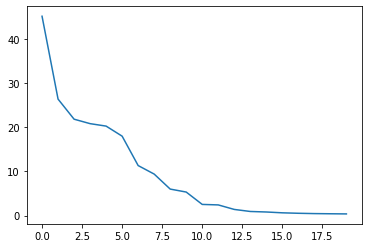

In [ ]:
print(pca.lambdas_)
plt.plot(pca.lambdas_)
plt.show()

In [ ]:
print(train_numerical_principal_component.shape)
print(train_numerical_principal_component_linear.shape)

(1852, 20)
(1852, 13)


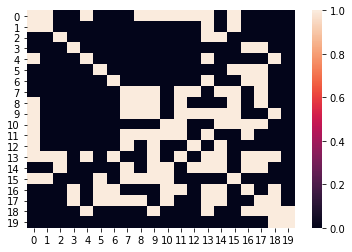

In [ ]:
rho, rho_pvalue= stats.spearmanr(train_numerical_principal_component)
test_result = np.array(rho_pvalue<global_pvalue_threshold)
map1 = sns.heatmap(test_result)

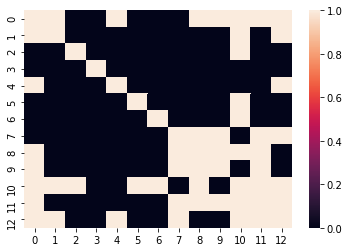

In [ ]:
rho, rho_pvalue= stats.spearmanr(train_numerical_principal_component_linear)
test_result = np.array(rho_pvalue<global_pvalue_threshold)
map1 = sns.heatmap(test_result)

In [ ]:
test_result1, test_statistic1, pvalue1, _ =chi2_independence_test( y_train, discretize(train_numerical_principal_component),0.05)

test result: [ True  True False  True  True  True  True  True  True  True  True  True
  True False  True False  True  True  True  True]


In [ ]:
test_result2, test_statistic2, pvalue2, _ =chi2_independence_test( y_train, discretize(train_numerical_principal_component_linear),0.05)

test result: [ True  True False  True  True  True  True  True  True  True  True  True
  True]


In [ ]:
print("Keneral PCA", np.mean(test_statistic1))
print("Linear PCA", np.mean(test_statistic2))

Keneral PCA 33.644326160725754
Linear PCA 38.07876890618608


In [ ]:
# Hence we only use the linear PCA 
# we take the first 7 principal component

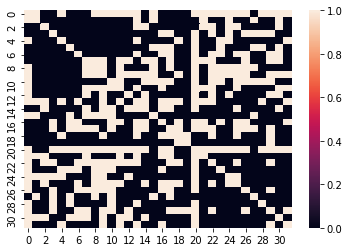

In [ ]:
train_engineered = np.concatenate((train_numerical_principal_component, \
                                 train_categorical_principal_component), axis=1)
rho_train_engineered, rho_pvalue_train_engineered, test_result_train_engineered = spearman_rho_test(train_engineered)

After testing them separately with chi-square independence test, both of the PCA transformations
showed that all of the columns were statistically significant. However, linear PCA has a higher test statistics than
kernel PCA, hence linear PCA is employed. \

Among the different principal components acquired from linear PCA, the explained_variance_ratio is examined. It
is found that the first 7 principal components explain most of the variance. Hence, only these 7 principal
components are taken in order to manage model complexity.

## 3.4 Train_numerical_transformed + train_categorical_quantified_normalized

In [ ]:
train_categorical_quantified_normalized = normalization(train_categorical_quantified)
print(train_categorical_quantified_normalized)

[[1.         1.         0.62410268 ... 1.         0.         0.57889496]
 [1.         0.26467171 0.         ... 0.         0.         0.        ]
 [1.         0.         0.46029185 ... 0.         0.36015477 0.57889496]
 ...
 [0.         1.         0.49801611 ... 0.         0.         0.75664332]
 [0.55061902 0.         0.62410268 ... 1.         0.36015477 0.57889496]
 [1.         0.         0.49801611 ... 0.         0.36015477 0.75664332]]


In [ ]:
train_data = np.concatenate((train_numerical_transformed , train_categorical_quantified_normalized), axis=1)


In [ ]:
train_data

array([[0.81575688, 0.56074751, 0.43464777, ..., 1.        , 0.        ,
        0.57889496],
       [0.77564446, 0.71674402, 0.40235354, ..., 0.        , 0.        ,
        0.        ],
       [0.52095079, 0.23962034, 0.81706474, ..., 0.        , 0.36015477,
        0.57889496],
       ...,
       [0.        , 0.51713672, 0.        , ..., 0.        , 0.        ,
        0.75664332],
       [0.        , 0.26011098, 0.56667245, ..., 1.        , 0.36015477,
        0.57889496],
       [0.52280121, 0.64335977, 0.63671255, ..., 0.        , 0.36015477,
        0.75664332]])

In [ ]:
train_numerical_transformed.shape

(1852, 13)

## 3.5 a) Other variables

Different experiments on features were conducted for trial and error. The most notable experiment we tried was to
multiply the features with the normalized Chi-square test statistics (section 2.6) and then sum over this product. In
other words, it is a weighted sum average of categorical and numerical attributes. In the way, the data would be
weighted by their predicting power (higher test statistics equal higher weighting). \

However, the numerical features weighted by test statistics perform poorly in the p-value test, so we only kept the
categorical one.

In [ ]:
# combination of variables

''''
1. chi2 test statistic (categorical , numerical) (2.3)
    independent categorical + dependent,      independent numerical + dependent 
2. normalize test statistic
3. sum of features
4. sum(normalized test statistic * features) = 1 column
'''



chi2_num_list_new = np.delete(chi2_num_list, index_to_drop_numerical_feature)
chi2_categ_list_new = np.delete(chi2_categ_list, index_to_drop_categorical_feature)

weighted_numerical_normalized =np.multiply(normalization(chi2_num_list_new.reshape(
                            (-1,1))).squeeze(),train_numerical_transformed )

sum_weighted_numreical_normalized = np.sum(weighted_numerical_normalized, axis=1)
# print(max(sum_weighted_numreical_normalized), min(sum_weighted_numreical_normalized), 
#       np.mean(sum_weighted_numreical_normalized), np.std(sum_weighted_numreical_normalized))
sum_weighted_numreical_normalized = normalization(sum_weighted_numreical_normalized.reshape((-1,1)))


weighted_categorical_normalized =np.multiply(normalization(chi2_categ_list_new.reshape(
                            (-1,1))).squeeze(),train_categorical_quantified_normalized)
sum_weighted_categorical_normalized = np.sum(weighted_categorical_normalized, axis=1)
sum_weighted_categorical_normalized = normalization(sum_weighted_categorical_normalized.reshape((-1,1)))


print(sum_weighted_numreical_normalized, sum_weighted_categorical_normalized)

[[0.76849503]
 [0.55485089]
 [0.67783476]
 ...
 [0.21309289]
 [0.22100229]
 [0.49616707]] [[0.57790727]
 [0.11319899]
 [0.35117186]
 ...
 [0.32151683]
 [0.62289267]
 [0.53506969]]


In [ ]:
np.max(train_numerical_transformed)

1.0

In [ ]:
table =pd.crosstab(np.array(y_train).reshape((y_train.shape[0])), sum_weighted_numreical_normalized.squeeze())
test_statistic, pvalue, dof, _ = stats.chi2_contingency(table)
print(test_statistic)
print(pvalue)
print("test result", pvalue<0.05)

1852.0
0.4890746314536608
test result False


In [ ]:
table =pd.crosstab(np.array(y_train).reshape((y_train.shape[0])), sum_weighted_categorical_normalized.squeeze())
test_statistic, pvalue, dof, _ = stats.chi2_contingency(table)
print(test_statistic)
print(pvalue)
print("test result", pvalue<0.05)

1817.9714285714285
4.4651737362816093e-44
test result True


## 3.5 b) Association rule (Apriori)

In order to find meaningful pairs, we employed Apriori to group independent variables with high association
among themselves. Apriori output needs many steps to be transformed to columns. Firstly, we only took the
variables that appear more than the mean frequency. Secondly, we collected all transactions in the association rule
that involves those variables and count the occurrence of other variables for those variables. In the end, we utilized
these outputs and combined the variables that were shown to be highly associated. \

After identifying pairs of independent variables that are highly associated, we sum the normalized value of these
pairs, which is then used as a new feature.

In [ ]:
train_num_sample = train_numerical_transformed.shape[0]
train_numerical_discretized = np.zeros((train_num_sample, train_numerical_transformed.shape[1]))
for i in range(train_numerical_transformed.shape[1]):
    _,interval_edge ,train_numerical_discretized[:, i]= stats.binned_statistic(train_numerical_transformed[:,i], 
            train_numerical_transformed[:,i], statistic='count', bins=5)

In [ ]:
train_categorical_feature_pd = pd.DataFrame(train_categorical_feature)
train_categorical_feature_pd.columns = train_categorical_feature_pd.columns.map(str)

In [ ]:
# train_numerical_feature_pd 

# Environment satisfaction
for i in range(len(train_categorical_feature_pd.index)): 
  if train_categorical_feature_pd.at[i,"3"] == 1:
    train_categorical_feature_pd.at[i,'3'] = "Low_EnvironmentSatisfaction"
  elif train_categorical_feature_pd.at[i,"3"] == 2:
    train_categorical_feature_pd.at[i,'3'] = "Medium_EnvironmentSatisfaction"
  elif train_categorical_feature_pd.at[i,"3"] == 3:
    train_categorical_feature_pd.at[i,'3'] = "High_EnvironmentSatisfaction"
  elif train_categorical_feature_pd.at[i,"3"]== 4:
    train_categorical_feature_pd.at[i,'3'] = "VeryHigh_EnvironmentSatisfaction"
  else:
    print("ERROR1")  

    # Job Involvement 
  if train_categorical_feature_pd.at[i,"4"] == 1:
    train_categorical_feature_pd.at[i,'4'] = "Low_JobInvolvement"
  elif train_categorical_feature_pd.at[i,"4"] == 2:
    train_categorical_feature_pd.at[i,'4'] = "Medium_JobInvolvement"
  elif train_categorical_feature_pd.at[i,"4"] == 3:
    train_categorical_feature_pd.at[i,'4'] = "High_JobInvolvement"
  elif train_categorical_feature_pd.at[i,"4"]== 4:
    train_categorical_feature_pd.at[i,'4'] = "VeryHigh_JobInvolvement"
  else:
    print("ERROR2")  

    # Job level (Ordinal)
  if train_categorical_feature_pd.at[i,"5"] == 1:
    train_categorical_feature_pd.at[i,'5'] = "1_JobLevel"
  elif train_categorical_feature_pd.at[i,"5"] == 2:
    train_categorical_feature_pd.at[i,'5'] = "2_JobLevel"
  elif train_categorical_feature_pd.at[i,"5"] == 3:
    train_categorical_feature_pd.at[i,'5'] = "3_JobLevel"
  elif train_categorical_feature_pd.at[i,"5"]== 4:
    train_categorical_feature_pd.at[i,'5'] = "4_JobLevel"
  elif train_categorical_feature_pd.at[i,"5"]== 5:
    train_categorical_feature_pd.at[i,'5'] = "5_JobLevel"
  else:
    print("ERROR3")  

    # Job Satisfaction
  if train_categorical_feature_pd.at[i,"7"] == 1:
    train_categorical_feature_pd.at[i,'7'] = "Low_JobSatisfaction"
  elif train_categorical_feature_pd.at[i,"7"] == 2:
    train_categorical_feature_pd.at[i,'7'] = "Medium_JobSatisfaction"
  elif train_categorical_feature_pd.at[i,"7"] == 3:
    train_categorical_feature_pd.at[i,'7'] = "High_JobSatisfaction"
  elif train_categorical_feature_pd.at[i,"7"]== 4:
    train_categorical_feature_pd.at[i,'7'] = "VeryHigh_JobSatisfaction"
  else:
    print("ERROR4")  

    # Stock option level 
  if train_categorical_feature_pd.at[i,"10"] == 0:
    train_categorical_feature_pd.at[i,'10'] = "0_Stock"
  elif train_categorical_feature_pd.at[i,"10"] == 1:
    train_categorical_feature_pd.at[i,'10'] = "1_Stock"
  elif train_categorical_feature_pd.at[i,"10"] == 2:
    train_categorical_feature_pd.at[i,'10'] = "2_Stock"
  elif train_categorical_feature_pd.at[i,"10"] == 3:
    train_categorical_feature_pd.at[i,'10'] = "3_Stock"
  else:
    print("ERROR5")

    # Work Life Balance
  if train_categorical_feature_pd.at[i,"11"] == 1:
    train_categorical_feature_pd.at[i,'11'] = "Bad_WorkLifeBalance"
  elif train_categorical_feature_pd.at[i,"11"] == 2:
    train_categorical_feature_pd.at[i,'11'] = "Good_WorkLifeBalance"
  elif train_categorical_feature_pd.at[i,"11"] == 3:
    train_categorical_feature_pd.at[i,'11'] = "Better_WorkLifeBalance"
  elif train_categorical_feature_pd.at[i,"11"]== 4:
    train_categorical_feature_pd.at[i,'11'] = "Best_WorkLifeBalance"
  else:
    print("ERROR6")  

    # ======================================

    # BusinessTravel
  if train_categorical_feature_pd.at[i,"0"] == 'Travel_Rarely':
    train_categorical_feature_pd.at[i,'0'] = "Travel_Rarely_BusinessTravel"
  elif train_categorical_feature_pd.at[i,"0"] == 'Travel_Frequently':
    train_categorical_feature_pd.at[i,'0'] = "Travel_Frequently_BusinessTravel"
  elif train_categorical_feature_pd.at[i,"0"] == 'Non-Travel':
    train_categorical_feature_pd.at[i,'0'] = "Non-Travel_BusinessTravel"
  else:
    print("ERROR7") 


    # Department
  if train_categorical_feature_pd.at[i,"1"] == 'Sales':
    train_categorical_feature_pd.at[i,'1'] = "Sales_Department"
  elif train_categorical_feature_pd.at[i,"1"] == 'Research & Development':
    train_categorical_feature_pd.at[i,'1'] = "Research & Development_Department"
  elif train_categorical_feature_pd.at[i,"1"] == 'Human Resources':
    train_categorical_feature_pd.at[i,'1'] = "Human Resources_Department"
  else:
    print("ERROR8")  

    # EducationField
  if train_categorical_feature_pd.at[i,"2"] == 'Life Sciences':
    train_categorical_feature_pd.at[i,'2'] = "Life Sciences_EducationField"
  elif train_categorical_feature_pd.at[i,"2"] == 'Other':
    train_categorical_feature_pd.at[i,'2'] = "Other_EducationField"
  elif train_categorical_feature_pd.at[i,"2"] == 'Medical':
    train_categorical_feature_pd.at[i,'2'] = "Medical_EducationField"
  elif train_categorical_feature_pd.at[i,"2"]== 'Marketing':
    train_categorical_feature_pd.at[i,'2'] = "Marketing_EducationField"
  elif train_categorical_feature_pd.at[i,"2"]== 'Technical Degree':
    train_categorical_feature_pd.at[i,'2'] = "Technical Degree_EducationField"
  elif train_categorical_feature_pd.at[i,"2"]== 'Human Resources':
    train_categorical_feature_pd.at[i,'2'] = "Human Resources_EducationField"
  else:
    print("ERROR9")  

    # JobRole
  if train_categorical_feature_pd.at[i,"6"] == 'Sales Executive':
    train_categorical_feature_pd.at[i,'6'] = "Sales Executive_JobRole"
  elif train_categorical_feature_pd.at[i,"6"] == 'Research Scientist':
    train_categorical_feature_pd.at[i,'6'] = "Research Scientist_JobRole"
  elif train_categorical_feature_pd.at[i,"6"] == 'Laboratory Technician':
    train_categorical_feature_pd.at[i,'6'] = "Laboratory Technician_JobRole"
  elif train_categorical_feature_pd.at[i,"6"]== 'Manufacturing Director':
    train_categorical_feature_pd.at[i,'6'] = "Manufacturing Director_JobRole"
  elif train_categorical_feature_pd.at[i,"6"] == 'Healthcare Representative':
    train_categorical_feature_pd.at[i,'6'] = "Healthcare Representative_JobRole"
  elif train_categorical_feature_pd.at[i,"6"] == 'Manager':
    train_categorical_feature_pd.at[i,'6'] = "Manager_JobRole"
  elif train_categorical_feature_pd.at[i,"6"]== 'Sales Representative':
    train_categorical_feature_pd.at[i,'6'] = "Sales Representative_JobRole"
  elif train_categorical_feature_pd.at[i,"6"] == 'Research Director':
    train_categorical_feature_pd.at[i,'6'] = "Research Director_JobRole"
  elif train_categorical_feature_pd.at[i,"6"]== 'Human Resources':
    train_categorical_feature_pd.at[i,'6'] = "Human Resources_JobRole"
  else:
    print("ERROR10")   

    # MaritalStatus
  if train_categorical_feature_pd.at[i,"8"] == 'Single':
    train_categorical_feature_pd.at[i,'8'] = "Single_MaritalStatus"
  elif train_categorical_feature_pd.at[i,"8"] == 'Married':
    train_categorical_feature_pd.at[i,'8'] = "Married_MaritalStatus"
  elif train_categorical_feature_pd.at[i,"8"] == 'Divorced':
    train_categorical_feature_pd.at[i,'8'] = "Divorced_MaritalStatus"
  else:
    print("ERROR11") 


    # OverTime
    # Work Life Balance
  if train_categorical_feature_pd.at[i,"9"] == 'Yes':
    train_categorical_feature_pd.at[i,'9'] = "Yes_WorkLifeBalance"
  elif train_categorical_feature_pd.at[i,'9'] == 'No':
    train_categorical_feature_pd.at[i,'9'] = "No_WorkLifeBalance"
  else:
    print("ERROR12")  

In [ ]:
train_numerical_discretized_pd = pd.DataFrame(train_numerical_discretized)
train_numerical_discretized_pd.columns = train_numerical_discretized_pd.columns.map(str)
train_numerical_discretized_pd = train_numerical_discretized_pd.astype(str)

In [ ]:
# train_numerical_discretized_pd 
def encode_numerical_discretized(i,m): 
  m_str = str(m)
  m_name = "X" + m_str
  if train_numerical_discretized_pd.at[i,m_str] == "1.0":
    train_numerical_discretized_pd.at[i,m_str] = m_name + "_1.0"
  elif train_numerical_discretized_pd.at[i,m_str] == "2.0":
    train_numerical_discretized_pd.at[i,m_str] = m_name + "_2.0"
  elif train_numerical_discretized_pd.at[i,m_str] == "3.0":
    train_numerical_discretized_pd.at[i,m_str] = m_name + "_3.0"
  elif train_numerical_discretized_pd.at[i,m_str]== "4.0":
    train_numerical_discretized_pd.at[i,m_str] = m_name + "_4.0"
  elif train_numerical_discretized_pd.at[i,m_str]== "5.0":
    train_numerical_discretized_pd.at[i,m_str] = m_name + "_5.0"
  else:
    print("ERROR"+ m_str)  

for m in range(13):
  for i in range(len(train_numerical_discretized_pd.index)): 
    encode_numerical_discretized(i,m)

In [ ]:
# Variable name after encoding
# train_categorical_pd
# train_numerical_discretized_pd

In [ ]:
associatoin_rule_input = pd.concat((train_categorical_feature_pd, train_numerical_discretized_pd), axis =1)

In [ ]:
# !pip install apyori

In [ ]:
# from apyori import apriori

In [ ]:
# # Apply Apriori to association_rule_input (which contain both train_categorical_feature and train_numerical_discretized)
# association_rule = apriori(np.array(associatoin_rule_input) , min_support = 0.1, min_confidence 
#                            = 0.3, min_lift = 3, min_length = 2, max_length=5)
# print("test")
# association_rule = list(association_rule)
# print(len(association_rule))
# # for x in association_rule:
# #     print(x)
# #     print("x", x)

In [ ]:
# max_length =5
# test_output = np.array(association_rule)
# item_involved = [list(x) for x in test_output[:,0]]
# item_involved = np.array(item_involved)


In [ ]:
# item_involved_pd = pd.DataFrame(item_involved)
# item_involved_pd.to_csv('/content/association_rule_output.csv')

In [ ]:
url_association_rule = "https://raw.githubusercontent.com/charlottetse32/IBM_Classification/main/association_rule_organized.csv"
association_rule_output_organized = pd.read_csv(url_association_rule)

In [ ]:
# The uploaded file has separated the output values and simplified the data structure
association_rule_output_organized = np.array(association_rule_output_organized)

In [ ]:
# Getting the column name for all variables, for counting values later
categorcial_name = np.array(data.columns)[[2,4,7,10,13,14,15,16,17,22,27,30]]
print(categorcial_name.shape)
numerical_name = np.char.add("X", np.array(np.arange(0, train_numerical_feature.shape[1]),dtype=str))
numerical_name = np.char.add(numerical_name, "_")
print(numerical_name)
name = np.concatenate((categorcial_name, numerical_name))
print(name)

(12,)
['X0_' 'X1_' 'X2_' 'X3_' 'X4_' 'X5_' 'X6_' 'X7_' 'X8_' 'X9_' 'X10_' 'X11_'
 'X12_']
['BusinessTravel' 'Department' 'EducationField' 'EnvironmentSatisfaction'
 'JobInvolvement' 'JobLevel' 'JobRole' 'JobSatisfaction' 'MaritalStatus'
 'OverTime' 'StockOptionLevel' 'WorkLifeBalance' 'X0_' 'X1_' 'X2_' 'X3_'
 'X4_' 'X5_' 'X6_' 'X7_' 'X8_' 'X9_' 'X10_' 'X11_' 'X12_']


In [ ]:
# Count the number of times a variable has appeared in the association rule output
count_collection = []
association_rule_output_organized = np.array(association_rule_output_organized, dtype=str)
for i in range(association_rule_output_organized.shape[1]):
    column_count_collection= []
    for j in range(associatoin_rule_input.shape[1]):
        # print("Name", name[j])
        count = np.sum(np.char.count(association_rule_output_organized[:,i], name[j]))
        # print(count)
        column_count_collection.append(count)
    count_collection.append(column_count_collection)

count_collection = np.array(count_collection)



In [ ]:
association_rule_result = pd.DataFrame(np.sum(count_collection, axis=0).reshape((1,-1)), columns = name)
association_rule_result

,BusinessTravel,Department,EducationField,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,OverTime,StockOptionLevel,WorkLifeBalance,X0_,X1_,X2_,X3_,X4_,X5_,X6_,X7_,X8_,X9_,X10_,X11_,X12_
0,4,73,0,0,3,70,69,0,44,0,0,5,7,0,1,0,48,0,26,52,0,42,34,28,39


In [ ]:
# Only take the variable who has appear more frequently than the mean frequency
threshold = np.mean(np.array(association_rule_result))
# print("threshold", threshold)
association_rule_result_np = np.array(association_rule_result)
all_column = association_rule_result.columns

all_column = np.array(all_column)
condition = np.array(association_rule_result_np>threshold).squeeze()
column_name = all_column[condition]
association_rule_result_new = association_rule_result_np[association_rule_result_np>threshold]
association_rule_result_new = pd.DataFrame(association_rule_result_new.reshape((1,-1)), columns= column_name)
association_rule_result_new

,Department,JobLevel,JobRole,MaritalStatus,X4_,X6_,X7_,X9_,X10_,X11_,X12_
0,73,70,69,44,48,26,52,42,34,28,39


In [ ]:
column_name.shape[0]

11

In [ ]:
# Collect all transactions in the association rule that invole a certain variable
# main_collection = [  11 separate list, each containing the related transactions  ]
main_collection = []
for x in range(column_name.shape[0]):
    main_collection.append([])
# print(main_collection)

for i in range(association_rule_output_organized.shape[0]):
    for index, name in enumerate(column_name):
        result = np.char.find(association_rule_output_organized[i,:], name)
        # print(result)
        if any(result >0):
            # print("true")
            main_collection[index].append(association_rule_output_organized[i,:])


In [ ]:
# Count the occurance of other variables for each variable
main_collection2 = []

for i in range(len(main_collection)):
    # print(column_name[i])
    count_collection2 = []
    if main_collection[i]==[]:
        # print(main_collection[i])
        print("skip")
        continue
    for j in range(column_name.shape[0]):
        # print("main collection", main_collection[i])
        # print("column name", column_name[j])
        result = np.sum(np.char.count(main_collection[i],column_name[j]))
        count_collection2.append(result)
    main_collection2.append(count_collection2)

skip


In [ ]:
len(main_collection)

11

In [ ]:
# Get the max frequency variable, which is not the variable itself and the index of such max variable 
# max_list = [maximum frequency]
# max_index_list = [argmax]
main_collection2_np = np.array(main_collection2)
# print(main_collection2_np.shape)
indicator = -1
iteration = 0
while indicator == -1:
    iteration +=1
    if iteration>10:
        raise NotImplementedError 
    max_list = np.max(main_collection2_np, axis =1)
    max_index_list = np.argmax(main_collection2_np, axis =1)
    for index, x in enumerate(max_index_list):
        if x != index:
            indicator = 1
        else:
            max_list[index] = np.max(np.concatenate((main_collection2_np[index,:][:x], 
                                                main_collection2_np[index,:][x+1:])))
            max_index_list[index] = np.argmax(np.concatenate((main_collection2_np[index,:][:x], 
                                                main_collection2_np[index,:][x+1:]))) +1


In [ ]:
print(max_list)
print(max_index_list)

[65 37 65 29 22 16 19 22 20 12]
[ 2  1  1  2  2  4  4  3  1 10]


In [ ]:
# Translating the max_index back to column name
column_name[max_index_list]

array(['JobRole', 'JobLevel', 'JobLevel', 'JobRole', 'JobRole', 'X4_',
       'X4_', 'MaritalStatus', 'JobLevel', 'X12_'], dtype=object)

In [ ]:
freq_mean = np.mean(main_collection2_np, axis=1)
print(freq_mean)

[29.18181818 26.18181818 27.81818182 15.18181818 17.18181818  8.
 13.09090909 15.         12.54545455  4.54545455]


In [ ]:
sorted_main_collection2 = np.sort(main_collection2_np, axis=1)[:,::-1]
print(sorted_main_collection2)

[[73 65 37 29 26 23 22 19 16  9  2]
 [70 37 35 29 23 20 19 17 15 13 10]
 [69 65 35 28 27 25 21 19 16  1  0]
 [44 29 23 19 16  9  7  7  7  5  1]
 [46 22 22 18 17 15 12 12 10  8  7]
 [22 16 11  9  9  7  5  4  3  2  0]
 [34 19 15 13 13 12  9  8  8  8  5]
 [38 22 20 17 14 14  9  9  8  7  7]
 [31 20 19 13 11 11  8  7  6  6  6]
 [12  8  8  6  6  4  3  2  1  0  0]]


In [ ]:
index_to_take = []
for i in range(sorted_main_collection2.shape[0]):
    index_to_take.append(sorted_main_collection2[i,:][sorted_main_collection2[i,:]>freq_mean[i]].shape[0])


In [ ]:
print(index_to_take)

[3, 4, 4, 5, 4, 5, 3, 4, 4, 5]


In [ ]:
argsort = np.array(np.argsort(main_collection2_np, axis =1))
print(argsort)

[[ 5  3  9  4  8  7 10  6  1  2  0]
 [ 5  8  9 10  7  6  4  3  2  0  1]
 [ 5  3  4  9  8  7  6 10  1  0  2]
 [ 2  9  7  8 10  0  5  6  4  1  3]
 [ 9 10  7  5  8  2  6  0  1  3  4]
 [ 2  0 10  9  7  8  1  6  4  3  5]
 [ 8  5  7  9  4 10  1  2  0  3  6]
 [ 3  8  9  4  5  6 10  1  0  2  7]
 [ 5  7  9  3 10  1  4  6  2  0  8]
 [ 3  4  8  5  6  1  0  7  2  9 10]]


In [ ]:
column_name_index = []
for x in range(argsort.shape[0]):
    column_name_index.append(argsort[x,0:index_to_take[x]])

print(column_name_index)

[array([5, 3, 9]), array([ 5,  8,  9, 10]), array([5, 3, 4, 9]), array([ 2,  9,  7,  8, 10]), array([ 9, 10,  7,  5]), array([ 2,  0, 10,  9,  7]), array([8, 5, 7]), array([3, 8, 9, 4]), array([5, 7, 9, 3]), array([3, 4, 8, 5, 6])]


In [ ]:
column_for_each_variable =[]
for x in range(main_collection2_np.shape[0]):
    column_for_each_variable.append(column_name[column_name_index[x]])

In [ ]:
print([x for x in column_for_each_variable])

[array(['X6_', 'MaritalStatus', 'X11_'], dtype=object), array(['X6_', 'X10_', 'X11_', 'X12_'], dtype=object), array(['X6_', 'MaritalStatus', 'X4_', 'X11_'], dtype=object), array(['JobRole', 'X11_', 'X9_', 'X10_', 'X12_'], dtype=object), array(['X11_', 'X12_', 'X9_', 'X6_'], dtype=object), array(['JobRole', 'Department', 'X12_', 'X11_', 'X9_'], dtype=object), array(['X10_', 'X6_', 'X9_'], dtype=object), array(['MaritalStatus', 'X10_', 'X11_', 'X4_'], dtype=object), array(['X6_', 'X9_', 'X11_', 'MaritalStatus'], dtype=object), array(['MaritalStatus', 'X4_', 'X10_', 'X6_', 'X7_'], dtype=object)]


In [ ]:
print(categorcial_name)
print(numerical_name)

['BusinessTravel' 'Department' 'EducationField' 'EnvironmentSatisfaction'
 'JobInvolvement' 'JobLevel' 'JobRole' 'JobSatisfaction' 'MaritalStatus'
 'OverTime' 'StockOptionLevel' 'WorkLifeBalance']
['X0_' 'X1_' 'X2_' 'X3_' 'X4_' 'X5_' 'X6_' 'X7_' 'X8_' 'X9_' 'X10_' 'X11_'
 'X12_']


In [ ]:
print("train_data", train_data.shape)
print("association_rule_input", associatoin_rule_input.shape)
# print(associatoin_rule_input)
print(" ----- ")

print("train_categorical", train_categorical_feature.shape)

print("train_numerical_discretized",train_numerical_discretized_pd.shape)
print("train_categorical_feature", train_categorical_feature_pd.shape)


print("train_numerical_normalized", train_numerical_normalized.shape)
print("train_categorical_quantified_normalize",train_categorical_quantified_normalized.shape)

train_data (1852, 25)
association_rule_input (1852, 25)
 ----- 
train_categorical (1852, 12)
train_numerical_discretized (1852, 13)
train_categorical_feature (1852, 12)
train_numerical_normalized (1852, 13)
train_categorical_quantified_normalize (1852, 12)


In [ ]:
'''
association_rule_result_new                 index at train_categorical / train_numerical
                                                (start at 0)
0: Department                       -->     1 in categorical
1: JobLevel                         -->     5 in categorical
2: JobRole                          -->     6 in categorical 
3: MaritalStatus                    -->     8 in categorical
4: Monthly Income  (X4)                   -->     4 in numerical
5: Percent Salary Hike  (X6)             -->     6 in numerical
6: Total working year   (X7)              -->     7 in numerical
7: Years at company     (X9)            -->     9 in numerical
8: Years at current role   (X10)         -->     10 in numerical
9: Years since last promotion  (X11)     -->     11 in numerical
10: Years with current manager    (X12)  -->     12 in numerical

==>> categorical [ 1,5,6,8 ]
==>> numerical   [ 4,6,7,9,10,11,12 ]

'''

'\nassociation_rule_result_new                 index at train_categorical / train_numerical\n                                                (start at 0)\n0: Department                       -->     1 in categorical\n1: JobLevel                         -->     5 in categorical\n2: JobRole                          -->     6 in categorical \n3: MaritalStatus                    -->     8 in categorical\n4: Monthly Income  (X4)                   -->     4 in numerical\n5: Percent Salary Hike  (X6)             -->     6 in numerical\n6: Total working year   (X7)              -->     7 in numerical\n7: Years at company     (X9)            -->     9 in numerical\n8: Years at current role   (X10)         -->     10 in numerical\n9: Years since last promotion  (X11)     -->     11 in numerical\n10: Years with current manager    (X12)  -->     12 in numerical\n\n==>> categorical [ 1,5,6,8 ]\n==>> numerical   [ 4,6,7,9,10,11,12 ]\n\n'

In [ ]:
def index_convertion(index_list_for_one_variable, categorical_name_, numerical_name_):
    where_categorical_index_is_found = []
    where_numerical_index_is_found = []
    for individual_index in index_list_for_one_variable:
        for index, x in enumerate(categorical_name_):
            # print("categ x", x)
            if x == individual_index:
                where_categorical_index_is_found.append(index)
        for index, x in enumerate(numerical_name_):
            # print("num x", x)
            if x == individual_index:
                where_numerical_index_is_found.append(index)
    return where_categorical_index_is_found, where_numerical_index_is_found

def get_data(index_list_for_one_variable, categorical_name_, numerical_name_, categorical_source, numerical_source):
    categorical_index, numerical_index = index_convertion(index_list_for_one_variable, categorical_name_, numerical_name_)
    return np.concatenate((categorical_source[:,categorical_index], numerical_source[:,numerical_index]), axis =1)

In [ ]:
column_for_each_variable[0]

array(['X6_', 'MaritalStatus', 'X11_'], dtype=object)

In [ ]:
index_convertion(column_for_each_variable[0], categorcial_name, numerical_name)

([8], [6, 11])

In [ ]:
get_data(column_for_each_variable[0], categorcial_name, numerical_name,train_categorical_feature, train_numerical_transformed)

array([['Single', 0.7555683824929479, 0.5659972843938048],
       ['Single', 0.7454124024932028, 0.8345964599822432],
       ['Divorced', 0.734721548780747, 0.734721548780747],
       ...,
       ['Single', 0.5219782027174082, 0.0],
       ['Divorced', 0.15374361991605598, 0.6649072340244391],
       ['Married', 0.5479421185968412, 0.3428643322899586]], dtype=object)

In [ ]:
data_collection = []
for x in column_for_each_variable:
    data_collection.append(get_data(x, categorcial_name, numerical_name, train_categorical_quantified_normalized,
                                    train_numerical_normalized))
# data_collection = np.array(data_collection)
print(len(data_collection))

10


In [ ]:
#train_numerical_transformed.

In [ ]:
for y in data_collection:
    print(y.shape)

(1852, 3)
(1852, 4)
(1852, 4)
(1852, 5)
(1852, 4)
(1852, 5)
(1852, 3)
(1852, 4)
(1852, 4)
(1852, 5)


In [ ]:
data_collection_sum = data_collection.copy()
for i, y in enumerate(data_collection_sum):
    data_collection_sum[i] = np.sum(y, axis =1)

In [ ]:
data_collection_sum[0]

array([1.46666667, 0.17777778, 1.77777778, ..., 1.02222222, 2.        ,
       1.19834186])

In [ ]:
test_input = np.array(data_collection_sum).transpose()
print(test_input.shape)
print(test_input)
chi2_independence_test( y_train, test_input,0.05)

(1852, 10)
[[1.46666667 2.26732026 1.85829384 ... 1.24718273 1.66666667 2.03051606]
 [0.17777778 0.63529412 0.35229068 ... 0.46340179 0.30277778 0.65784623]
 [1.77777778 0.77777778 1.97919958 ... 1.2014218  1.80277778 2.20419958]
 ...
 [1.02222222 1.25098039 1.23075303 ... 0.45297525 1.07222222 1.38353081]
 [2.         1.         2.07219589 ... 1.07219589 2.025      2.14719589]
 [1.19834186 2.19150327 2.15558251 ... 2.21113806 1.67334186 2.63058251]]
test result: [ True  True  True  True  True  True  True  True  True  True]


(array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True]),
 array([ 594.26214432, 1176.31542555, 1838.53809524, 1387.93491847,
        1299.35632425, 1243.91501302,  869.1913329 , 1845.44444444,
        1298.30968369, 1852.        ]),
 array([5.82640569e-45, 1.23367511e-49, 6.58264927e-41, 4.90506673e-41,
        5.36509607e-50, 1.97730125e-41, 7.51948532e-52, 3.52413491e-41,
        1.35615407e-56, 3.42664732e-41]),
 array([ 183,  538, 1092,  747,  622,  638,  322, 1095,  582, 1100]))

In [ ]:
data_collection_sum_np = np.array(data_collection_sum).transpose()

In [ ]:
data_collection

[array([[0.        , 1.        , 0.46666667],
        [0.        , 0.11111111, 0.06666667],
        [1.        , 0.77777778, 0.        ],
        ...,
        [0.        , 0.88888889, 0.13333333],
        [1.        , 1.        , 0.        ],
        [0.15389741, 0.44444444, 0.6       ]]),
 array([[1.        , 0.38888889, 0.46666667, 0.41176471],
        [0.11111111, 0.22222222, 0.06666667, 0.23529412],
        [0.77777778, 0.        , 0.        , 0.        ],
        ...,
        [0.88888889, 0.11111111, 0.13333333, 0.11764706],
        [1.        , 0.        , 0.        , 0.        ],
        [0.44444444, 0.5       , 0.6       , 0.64705882]]),
 array([[0.        , 1.        , 0.39162717, 0.46666667],
        [0.        , 0.11111111, 0.1745129 , 0.06666667],
        [1.        , 0.77777778, 0.2014218 , 0.        ],
        ...,
        [0.        , 0.88888889, 0.20853081, 0.13333333],
        [1.        , 1.        , 0.07219589, 0.        ],
        [0.15389741, 0.44444444, 0.95724065

In [ ]:
data_collection_multiplication = data_collection.copy()
for i, y in enumerate(data_collection_multiplication):
    data_collection_multiplication[i] = np.prod(y, axis =1)

In [ ]:
test_input2 = np.array(data_collection_multiplication).transpose()
print(test_input2.shape)
chi2_independence_test( y_train, test_input2,0.05)

(1852, 10)
test result: [ True  True  True  True  True  True  True  True  True  True]


(array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True]), array([230.46766999, 438.46862873, 641.00328947, 691.07135928,
        548.25151021, 312.93645099, 457.90298167, 708.32232841,
        411.20347393, 852.85769981]), array([2.32343846e-15, 1.33945493e-15, 1.61578395e-12, 2.40293923e-19,
        6.79651159e-22, 2.38523541e-16, 7.62522482e-21, 4.80510922e-13,
        7.07035364e-17, 1.05414190e-14]), array([ 85, 227, 409, 388, 265, 134, 208, 458, 199, 558]))

In [ ]:
# Final output is "data_collection_sum" and "data_collection_multiplication",   shape = [10, num_sample],  it is a list

# Y is more strongly dependent on "data_collection_sum"

## 3.6 K-Mean clustering

We used the fact that 10 is the optimal number of clusters (section 2.5) for fitting the K-Mean clustering model. We
created two new attributes for clustering labels and the distance to centroids.

In [ ]:
# K-Mean clustering 
# K Mean clustering to identify the underlying grouping 
# wcss = []
# for i in range(1,50):
#     num_cluster =i
#     kmean = KMeans(n_clusters = num_cluster, init ='k-means++')
#     clustering = kmean.fit(train_data)
#     wcss.append(clustering.inertia_)

# wcss = np.array(wcss)
# plt.plot(wcss)
# plt.title("WCSS for different n_clusters")
# plt.show()
# diff = wcss[1:]-wcss[:-1]
# plt.plot(diff)
# plt.title("Improvement in WCSS for n_clusters+1")
# plt.show()

# # 10 clusters is the optimal number of clusters 
final_kmean = KMeans(n_clusters = 10, init= 'k-means++')
final_clustering = final_kmean.fit(train_data)

In [ ]:
final_clustering

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
# centroid, cluster_label, inertia_, distance_from_centroid

In [ ]:
cluster_label = final_clustering.labels_
print(cluster_label.shape)

(1852,)


In [ ]:
# cluster_label_df = pd.DataFrame(cluster_label)
# cluster_label_df.to_csv('/content/cluster_label.csv')

In [ ]:
y_train.shape

(1852, 1)

In [ ]:
cluster_label_normalized = normalization(cluster_label.reshape((-1,1)))
table =pd.crosstab(np.array(y_train).reshape((y_train.shape[0])), cluster_label_normalized.squeeze())
test_statistic, pvalue, dof, _ = stats.chi2_contingency(table)
print(test_statistic)
print(pvalue)
print("test result", pvalue<0.05)

210.718113353127
1.8680091547270603e-40
test result True


In [ ]:
url_clustering_label_quantified = "https://raw.githubusercontent.com/charlottetse32/IBM_Classification/main/clustering_quantified_label.csv"
clustering_label_quantified = pd.read_csv(url_clustering_label_quantified)

In [ ]:
clustering_label_quantified 

,quantified_data...1.
0,-0.014576
1,0.013747
2,-0.024778
3,0.010429
4,0.017871
...,...
1847,0.013747
1848,-0.021328
1849,-0.021328
1850,0.017871


In [ ]:
clustering_label_quantified_normalized = normalization(clustering_label_quantified)
table =pd.crosstab(np.array(y_train).reshape((y_train.shape[0])), clustering_label_quantified_normalized.squeeze())
test_statistic, pvalue, dof, _ = stats.chi2_contingency(table)
print(test_statistic)
print(pvalue)
print("test result", pvalue<0.05)

268.8281856146221
1.047092022099783e-52
test result True


In [ ]:
from scipy.spatial import distance
def distance_from_centroid_matrix(centroid, label_list, inputs):
    # (num_sample, num_feature)
    # only need to calculate the distance to the closest centroid -- 
    distance_list = []
    for i in range(inputs.shape[0]):
        dist = distance.euclidean(centroid[label_list[i],:], inputs[i,:].reshape((1, -1)))
        distance_list.append(dist)
    return np.array(distance_list)


In [ ]:
centroid = final_clustering.cluster_centers_
special_input = np.concatenate((train_numerical_normalized, train_categorical_quantified_normalized), axis =1)
distance_from_centroid = distance_from_centroid_matrix(centroid, cluster_label, special_input)
distance_from_centroid_normalized = normalization(distance_from_centroid.reshape((-1,1)))

In [ ]:
table =pd.crosstab(np.array(y_train).reshape((y_train.shape[0])), distance_from_centroid_normalized.squeeze())
test_statistic, pvalue, dof, _ = stats.chi2_contingency(table)
print(test_statistic)
print(pvalue)
print("test result", pvalue<0.05)

1852.0
1.1660129008145883e-26
test result True


In [ ]:
# print(distance_from_centroid)
print(cluster_label_normalized)
print("--------")
print(clustering_label_quantified_normalized)

[[0.66666667]
 [0.88888889]
 [0.22222222]
 ...
 [0.44444444]
 [0.11111111]
 [0.55555556]]
--------
[[0.24736413]
 [0.80291135]
 [0.04726352]
 ...
 [0.1149325 ]
 [0.88378988]
 [0.73781856]]


In [ ]:
print(distance_from_centroid.shape)

(1852,)


## 3.7 Unifying everything

In [ ]:
# 3.2 Take all categorical PC (12)
# 3.3 Take first numerical PC (1), choose Linear PCA, LDA (1) 
# 3.4 None
# 3.5 sum_weighted_categorical_normalized (1)
    # sum_weighted_numerical_normalized is rejected
# 3.6 data_collection_sum_np (10)
# 3.7 clustering_label_quantified_normalized (1), distance_from_centroid (1)


In [ ]:
# Will overwrite the x_train with the above
print("Categ pca", train_categorical_principal_component.shape)
print("num Linear pca", train_numerical_principal_component_linear[:,0:7].shape)
# print("lda", train_numerical_lda_component.shape)         
print("weighted_categorical", sum_weighted_categorical_normalized.shape)      
print("association rule sum", data_collection_sum_np.shape)            # highly correlated with each other 
print("clustering label", cluster_label_normalized.shape)
print("distance from centroid", distance_from_centroid_normalized.reshape((-1,1)).shape)

x_train_engineered = np.concatenate((train_numerical_normalized, train_categorical_encoded, normalization(train_categorical_principal_component), 
                    normalization(train_numerical_principal_component_linear[:,0:7]),
                sum_weighted_categorical_normalized, 
                normalization(data_collection_sum_np),
                cluster_label_normalized, distance_from_centroid_normalized.reshape((-1,1))), axis =1)

# x_train_engineered = np.concatenate((train_numerical_normalized, train_categorical_encoded, 
#                 sum_weighted_categorical_normalized, 
#                 normalization(data_collection_sum_np)), axis =1)


# raw data (train_numerical_transformation + train_categorical_quantified_normalized)
# x_train - PCA
# combine raw data + PCA
print(x_train_engineered.shape)

Categ pca (1852, 11)
num Linear pca (1852, 7)
weighted_categorical (1852, 1)
association rule sum (1852, 10)
clustering label (1852, 1)
distance from centroid (1852, 1)
(1852, 95)


In [ ]:
x_train_engineered

array([[0.80952381, 0.6642806 , 0.14285714, ..., 0.52690314, 0.66666667,
        0.35042793],
       [0.4047619 , 0.30493916, 0.25      , ..., 0.1533581 , 0.88888889,
        0.70882484],
       [0.42857143, 0.39942734, 0.5       , ..., 0.57416768, 0.22222222,
        0.62247702],
       ...,
       [0.19047619, 0.1166786 , 1.        , ..., 0.35083885, 0.44444444,
        0.71339843],
       [0.95238095, 0.48604152, 0.03571429, ..., 0.55865526, 0.11111111,
        0.56228529],
       [0.88095238, 0.12884753, 0.03571429, ..., 0.6901994 , 0.55555556,
        0.57024877]])

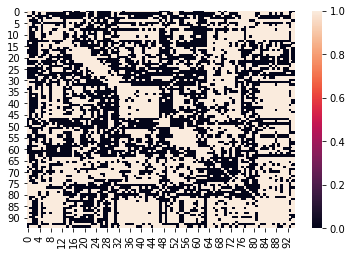

In [ ]:
final_test_statistic, final_pvalue, final_result= spearman_rho_test(x_train_engineered)

In [ ]:
x_train_engineered_discretized = discretize(x_train_engineered)

In [ ]:
test_result_engineered, test_statistic_engineered, pvalue_engineered, dof_engineered = chi2_independence_test(y_train, x_train_engineered_discretized, 0.05)
print(test_statistic_engineered)

test result: [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False  True  True False  True  True  True False
  True  True  True False  True  True  True  True  True  True  True False
  True  True  True False  True  True  True  True False  True  True  True
 False  True  True  True  True  True  True  True  True  True  True False
  True  True  True False  True  True  True  True  True  True  True  True
  True  True  True  True  True False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True]
[9.41908696e+01 2.40613914e+01 1.77800029e+01 1.48041570e+01
 7.52401315e+01 2.63039886e+01 4.19250608e+01 1.26922246e+02
 2.17648135e+01 5.66357940e+01 5.55248938e+01 2.36414080e+01
 5.30295108e+01 2.49489628e+01 3.90900461e+01 6.88685081e+00
 5.28889746e-02 4.20215039e+01 4.19103907e+01 0.00000000e+00
 8.81351215e+00 1.91350209e+01 5.41087551e+00 5.08392157e-01
 1.39697581e+01 5.37314291e+01 7.85848900e

<BarContainer object of 95 artists>

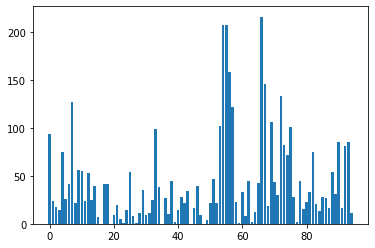

In [ ]:
plt.bar(np.arange(0, test_statistic_engineered.shape[0]), test_statistic_engineered)

In [ ]:
np.mean(test_statistic_engineered)

42.88325853991939

In [ ]:
index_to_drop_engineered=[]
for i, x in enumerate(test_result_engineered):
    if x ==False:
        print("index to drop", i)
        index_to_drop_engineered.append(i)

index to drop 16
index to drop 19
index to drop 23
index to drop 27
index to drop 35
index to drop 39
index to drop 44
index to drop 48
index to drop 59
index to drop 63
index to drop 77


In [ ]:
print(x_train.shape)
x_train = np.delete(x_train_engineered, index_to_drop_engineered, axis =1)
x_train_backup = x_train.copy()
print(x_train.shape)
assert x_train.shape[1] == x_train_backup.shape[1]

(1852, 78)
(1852, 84)


In [ ]:
x_train.shape

(1852, 84)

In [ ]:
x_train_backup.shape

(1852, 84)

The final output from this section is **x_train**

# 4. Feature Importance & Feature Selection

After feature engineering, we would like to explore the importance of these new features with the original features
after data cleaning.

## 4.1 Filter method

Mutual information measures the mutual dependency between the attribute and “attrition” by comparing the joint
distribution and marginal distribution. The implementation of mutual information for python is a bit different as it
relies on nonparametric methods based on entropy estimation from k-nearest neighbors distances, nevertheless, it
uses the same concept.

In [ ]:
y_train = y_train.astype('int')

In [ ]:
x_train.shape

(1852, 84)

In [ ]:
mutual_info_score = mutual_info_classif(x_train,y_train.squeeze(), random_state=40)
print(mutual_info_score) 

[7.61076607e-02 3.26136964e-01 8.04941047e-03 3.27610163e-02
 4.00804018e-01 3.79777433e-01 0.00000000e+00 6.88671028e-02
 7.96523587e-05 6.25690812e-02 3.93118658e-02 3.47546102e-02
 1.78858282e-02 0.00000000e+00 1.93315253e-02 0.00000000e+00
 0.00000000e+00 0.00000000e+00 3.04854634e-03 9.10471617e-03
 0.00000000e+00 0.00000000e+00 2.24080959e-02 0.00000000e+00
 0.00000000e+00 4.00047452e-03 1.74846596e-02 5.71844745e-04
 1.35511404e-02 9.73261801e-03 6.81069404e-03 1.73657635e-02
 0.00000000e+00 2.05427812e-02 0.00000000e+00 9.17063677e-03
 3.22932650e-02 1.17797645e-02 4.87585451e-03 1.14686941e-02
 1.23743087e-02 0.00000000e+00 0.00000000e+00 1.34934662e-02
 8.91292959e-03 2.76058220e-02 4.16769120e-02 4.85991641e-02
 3.43687117e-02 2.69440119e-02 0.00000000e+00 1.05814022e-02
 1.56068261e-03 2.64282889e-02 3.85762116e-01 3.85467493e-01
 4.01045313e-01 3.78054618e-01 3.63830463e-01 3.79168360e-01
 3.88438042e-01 3.59609991e-01 4.07582955e-01 3.83048065e-01
 3.86163060e-01 3.964880

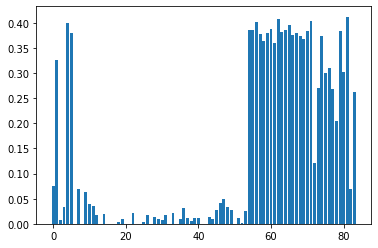

In [ ]:
pyplot.bar(range(len(mutual_info_score)), mutual_info_score)
pyplot.show()

In [ ]:
# x_train = np.concatenate(train_categorical_principal_component,
#                 train_numerical_lda_component, sum_weighted_categorical_normalized, data_collection_sum_np,
#                 clustering_label_quantified_normalized, distance_from_centroid.reshape((-1,1))), axis =1)

In [ ]:
mutual_info_drop = []
for i, score in list(enumerate (mutual_info_score)):
  if score == 0.01:
    mutual_info_drop.append(i)
print(mutual_info_drop)

[]


In [ ]:
x_train = np.delete(x_train, mutual_info_drop,axis = 1)

In [ ]:
x_train.shape

(1852, 84)

## 4.2 Wrapper method

After implementing sequential backward and forward selection with K Neighbors Classifier, we found that the
result was very inconsistent as the features selected varied a lot between backward and forward selection. Thus, we
decided to not utilize this method in feature selection.

In [ ]:
# knn = KNeighborsClassifier()

In [ ]:
# sfs1 = SFS(knn, k_features = 10, forward = True)
# model_forward = sfs1.fit(x_train,y_train.squeeze())

In [ ]:
# # Sequential Backward Selection 
# sfs2 = SFS(knn, k_features = 10, forward = False)
# model_backward = sfs2.fit(x_train,y_train.squeeze())

In [ ]:
# pd.DataFrame.from_dict(sfs1.get_metric_dict()).T
#sfs2.subsets_

In [ ]:
# pd.DataFrame.from_dict(sfs2.get_metric_dict()).T

In [ ]:
# dict1 = sfs1.subsets_

In [ ]:
# dict1

## 4.3 Embedding method


The data is imputed into Logistics regression with L1 regularization, XGBoost, and Random Forest. The coefficient
of each feature in Logistic Regression is used and the “feature_importance” metric could be returned from
XGBoost and Random Forest.

### 4.3.1 XGBoost/Random Forrest


After transforming to equal variance, one pair still does not have equal variance 


In [ ]:
random_forest = RandomForestClassifier(random_state=7)
print(x_train.shape)
random_forest_unified = random_forest.fit(x_train,y_train)
rf_score = random_forest_unified.feature_importances_

(1852, 84)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


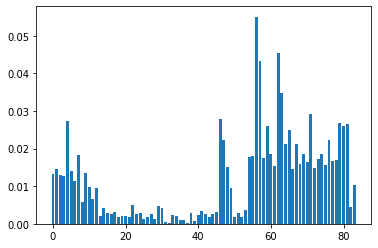

In [ ]:
pyplot.bar(range(len(rf_score)), rf_score)
pyplot.show()

In [ ]:
np.sum(rf_score)

1.0

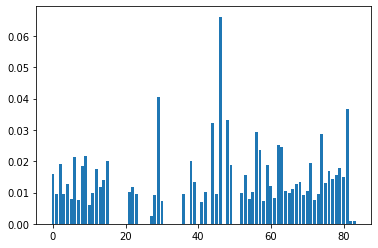

In [ ]:
# XGBoost - regularized boosting technique 
xgbc = XGBClassifier(random_state= 4)
xgbc_unified = xgbc.fit(x_train,y_train.squeeze())
pyplot.bar(range(len(xgbc_unified.feature_importances_)), xgbc_unified.feature_importances_)
pyplot.show()

### 4.3.2 Logistic regression


In [ ]:
#Logistics Regression - regularization is applied by default (L2)
logreg = LogisticRegression(fit_intercept = False, solver = 'saga',penalty= 'l1', max_iter =200, random_state=17)
logreg_unified = logreg.fit(x_train,y_train.squeeze())

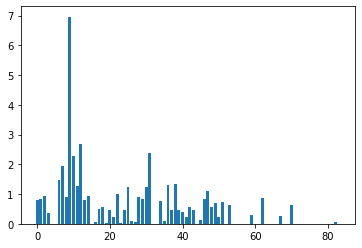

In [ ]:
# absolute value of logreg coefficients
pyplot.bar(range(len(np.squeeze(logreg.coef_))),abs(np.squeeze(logreg.coef_)))
pyplot.show()

In [ ]:
predictors = x_train
selector = RFE(logreg, n_features_to_select= 1)
selector = selector.fit(predictors, y_train.squeeze())

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [ ]:
#from positive to negative ranking of coefficients 
order = selector.ranking_
print(order)

[23 19 21 32 55 54 14 13 10  4  7 18  5 28 12 65 48 20 30 52 31 41 22 51
 33 25 45 49 24  1 16  8 66 68 29 47  6 37  3 34 36 39 27 40 82 46 15 43
 11 35 44 17 62 26 77 78 53 69 70  2 72 79  9 80 83 74 71 38 81 63 42 75
 76 57 58 67 59 60 56 61 64 73 50 84]


In [ ]:
print(selector.score(x_train,y_train))

0.6155507559395248


## 4.4 Random variable benchmark

To set a baseline feature importance for the above methods, Random variables were fitted into the embedding
methods and we use the average of the feature importance of random variables as a threshold for comparison. To
avoid bias, we randomly sampled random variables from normal, uniform, exponential, and logistic distribution.
Features with lower feature importance than the feature importance of random variables (the threshold) will be
considered as not important. As such, we can filter out the noise of these models when evaluating feature
importance.

In [ ]:
# Generating Random noise
rv_random_state =13
def generate_random_variable():
    global rv_random_state
    print("random state", rv_random_state)
    norm_rv = normalization(stats.norm.rvs(size = x_train.shape[0], random_state = rv_random_state).reshape((-1,1)))
    uniform_rv = stats.uniform.rvs(size = x_train.shape[0],random_state = rv_random_state+5)
    exp_rv = normalization(stats.expon.rvs(size = x_train.shape[0], random_state = rv_random_state+10).reshape((-1,1)))
    logistic_rv = normalization(stats.logistic.rvs(size = x_train.shape[0], random_state = rv_random_state+15).reshape((-1,1)))
    rv_random_state +=3
    return norm_rv, uniform_rv, exp_rv, logistic_rv

def create_random_variable_block():
    norm_rv1, uniform_rv1, exp_rv1, logistic_rv1 = generate_random_variable()
    rv = np.concatenate((norm_rv1.reshape((-1,1)), uniform_rv1.reshape((-1,1)), exp_rv1.reshape((-1,1)), 
                            logistic_rv1.reshape((-1,1))), axis =1)
    return rv


def create_block(num):
    rv_block_list =[]
    for i in range(num):
        rv = create_random_variable_block()
        rv_block_list.append(rv)
    return np.concatenate(np.array(rv_block_list), axis=1)





num_feature = x_train.shape[1]
num_block = int(np.floor(num_feature/4))
rv_test = create_block(num_block)
print("rv_test shape", rv_test.shape)
norm_rv, uniform_rv, exp_rv, logistic_rv = generate_random_variable()
rv_collection = [norm_rv, uniform_rv, exp_rv, logistic_rv]
rv_collection = list_to_array(rv_collection).transpose()
rv_test = np.concatenate((rv_test, rv_collection[:,0:(num_feature - 4*num_block)]), axis=1)
try:
    assert rv_test.shape[1] == x_train.shape[1]
except:
    print("rv_test is not equal to x_train shape")
    raise NotImplementedError


random state 13
random state 16
random state 19
random state 22
random state 25
random state 28
random state 31
random state 34
random state 37
random state 40
random state 43
random state 46
random state 49
random state 52
random state 55
random state 58
random state 61
random state 64
random state 67
random state 70
random state 73
rv_test shape (1852, 84)
random state 76


In [ ]:
x_train.shape

(1852, 84)

In [ ]:
rv_collection[0].shape

(4,)

In [ ]:
x_train.shape

(1852, 84)

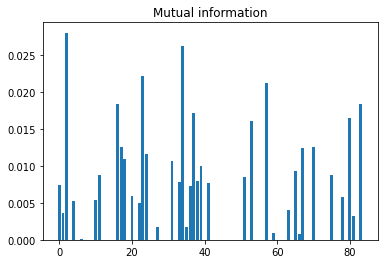

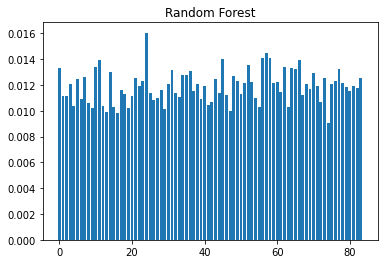

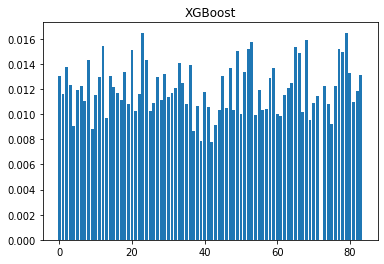

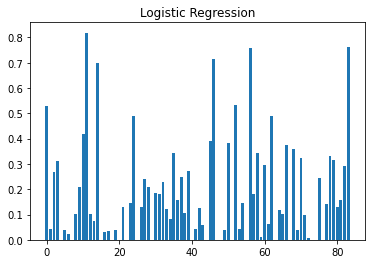

In [ ]:

# mutual_info_score_rv = mutual_info_classif(rv_test,y_train.squeeze(), random_state=9)
# plt.title("Mutual info")
# plt.bar(np.arange(0,mutual_info_score_rv.shape[0]), mutual_info_score_rv)
# plt.show()

mutual_info_score_rv = mutual_info_classif(rv_test,y_train.squeeze(), random_state=40)
plt.title("Mutual information")
plt.bar(np.arange(0,mutual_info_score_rv.shape[0]), mutual_info_score_rv)
plt.show()


random_forest_rv = RandomForestClassifier(random_state=19)
random_forest_unified_rv = random_forest_rv.fit(rv_test,y_train.squeeze())
rf_score_rv = random_forest_unified_rv.feature_importances_
plt.title("Random Forest")
plt.bar(np.arange(0,rf_score_rv.shape[0]), rf_score_rv)
plt.show()


xgbc_rv = XGBClassifier(random_state= 8)
xgbc_unified_rv = xgbc_rv.fit(rv_test,y_train.squeeze())
plt.title("XGBoost")
plt.bar(range(len(xgbc_unified_rv.feature_importances_)), xgbc_unified_rv.feature_importances_)
plt.show()


logreg_rv = LogisticRegression(fit_intercept = False, solver = 'saga',penalty= 'l1', max_iter =200, random_state = 29)
logreg_unified_rv = logreg_rv.fit(rv_test,y_train.squeeze())
plt.title("Logistic Regression")
plt.bar(range(len(np.squeeze(logreg_unified_rv.coef_))),abs(np.squeeze(logreg_unified_rv.coef_)))
plt.show()

In [ ]:
random_state_rv_test = 83
def run_test(num_iter, x_train):
    global random_state_rv_test
    rf_score_list_=[]
    xgbc_list_=[]
    logreg_list_ =[] 
    mutual_info_list_ = []
    num_feature = x_train.shape[1]
    num_block = int(np.floor(num_feature/4))
    for i in range(num_iter):
        print("iteration", i)



        rv_test_ = create_block(num_block)
        norm_rv, uniform_rv, exp_rv, logistic_rv = generate_random_variable()
        rv_collection_ = [norm_rv, uniform_rv, exp_rv, logistic_rv]
        rv_collection_ = list_to_array(rv_collection_).transpose()
        rv_test_ = np.concatenate((rv_test_, rv_collection_[:,0:(num_feature - 4*num_block)]), axis=1)
        try:
            assert rv_test.shape[1] == x_train.shape[1]
        except:
            print("rv_test is not equal to x_train shape")
            raise NotImplementedError

        mutual_info_score_rv = mutual_info_classif(rv_test,y_train.squeeze(), random_state=40)

        random_forest_rv = RandomForestClassifier(random_state= random_state_rv_test)
        random_forest_unified_rv = random_forest_rv.fit(rv_test_,y_train.squeeze())

        xgbc_rv = XGBClassifier(random_state= random_state_rv_test+5)
        xgbc_unified_rv = xgbc_rv.fit(rv_test_,y_train.squeeze())

        logreg_rv = LogisticRegression(fit_intercept = False, solver = 'saga',penalty= 'l1', max_iter =200, random_state=random_state_rv_test+7)
        logreg_unified_rv = logreg_rv.fit(rv_test_,y_train.squeeze())

        mutual_info_list_.append(mutual_info_score_rv)
        rf_score_list_.append(random_forest_unified_rv.feature_importances_)
        xgbc_list_.append(xgbc_unified_rv.feature_importances_)
        logreg_list_.append(np.abs(logreg_unified_rv.coef_.squeeze()))
        random_state_rv_test +=2
    return mutual_info_list_, rf_score_list_, xgbc_list_, logreg_list_

mutual_info_list, rf_score_list, xgbc_list, logreg_list = run_test(4, x_train)
mutual_info_list.append(mutual_info_score_rv)
rf_score_list.append(rf_score_rv)
xgbc_list.append(xgbc_unified_rv.feature_importances_)
logreg_list.append(np.abs(logreg_unified_rv.coef_.squeeze()))




iteration 0
random state 79
random state 82
random state 85
random state 88
random state 91
random state 94
random state 97
random state 100
random state 103
random state 106
random state 109
random state 112
random state 115
random state 118
random state 121
random state 124
random state 127
random state 130
random state 133
random state 136
random state 139
random state 142
iteration 1
random state 145
random state 148
random state 151
random state 154
random state 157
random state 160
random state 163
random state 166
random state 169
random state 172
random state 175
random state 178
random state 181
random state 184
random state 187
random state 190
random state 193
random state 196
random state 199
random state 202
random state 205
random state 208
iteration 2
random state 211
random state 214
random state 217
random state 220
random state 223
random state 226
random state 229
random state 232
random state 235
random state 238
random state 241
random state 244
random state 247
ra

Majority voting was used to decide which attribute should be removed at this stage. Mutual information, Random
Forest, XGBoost, and Logistic Regression were considered, if more than 2 models showed that the attribute should
be removed, it would be eliminated.

In [ ]:
mutual_info_list = np.array(mutual_info_list)
rf_score_list = np.array(rf_score_list)
xgbc_list = np.array(xgbc_list)
logreg_list = np.array(logreg_list)

In [ ]:
mutual_info_list = convert_to_array(mutual_info_list)
rf_score_list = convert_to_array(rf_score_list)
xgbc_list = convert_to_array(xgbc_list)
logreg_list = convert_to_array(logreg_list)

In [ ]:
t1 = np.mean(np.mean(mutual_info_list, axis=0))
t2 = np.mean(np.mean(rf_score_list, axis=0))
t3 = np.mean(np.mean(xgbc_list, axis=0))
t4 = np.mean(np.mean(logreg_list, axis =0))
# t4 = np.max(np.abs(logreg_unified_rv.coef_.squeeze()))

In [ ]:
print(t1, t2,t3,t4)

0.0045405795382292575 0.011904761904761904 0.011904761381447316 0.1716908849056778


## 4.5 Benchmark

Since the feature importance output from the models are relative, a multiplier (weighting) is used to adjust a
threshold value in order to relax the requirement. A weighting is assigned on the random variables, the feature
importance we consider now would be the original feature importance of each model minus a certain weighting of
random variables. The decision on the weighting on the random variable ultimately affects the number of attributes
we would drop. Taking into consideration that machine learning models perform better with more columns, we set
the weighting of the random variables as 0.3. 

In [ ]:
# # For reference only, It is Not used in the majority voting
# reference_feature_engineering_summary = normalization(mutual_info_score.reshape((-1,1))).squeeze()+\
#                      normalization(rf_score.reshape((-1,1))).squeeze()+\
#                     normalization(xgbc_unified.feature_importances_.reshape((-1,1))).squeeze() +\
#                     normalization(np.abs(logreg.coef_).reshape((-1,1))).squeeze() 

In [ ]:
# print(rf_score.shape)
# print(xgbc_unified.feature_importances_.shape)

In [ ]:
# reference_feature_engineering_summary

In [ ]:
# feature_engineering_summary = (mutual_info_score-t1) +(rf_score-t2) +\
#                 (xgbc_unified_rv.feature_importances_-t3) + (np.abs(logreg.coef_)- t4)

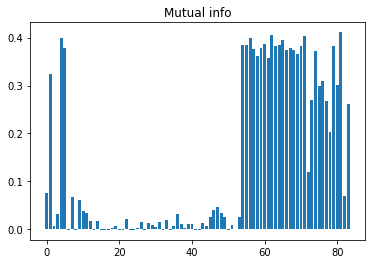

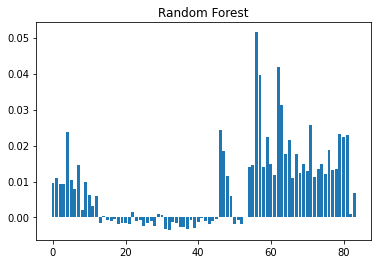

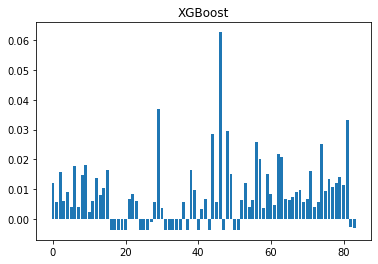

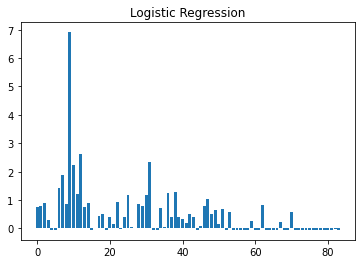

In [ ]:
rv_weight = 0.3

# plt.title("mutual infor")
# plt.bar(np.arange(0,x_train.shape[1]),(mutual_info_score.squeeze()-rv_weight*t1))
# plt.show()


plt.title("Mutual info")
vote3 = mutual_info_score.squeeze()-rv_weight*t1
plt.bar(np.arange(0,vote3.shape[0]),vote3)
plt.show()


plt.title("Random Forest")
vote0 = rf_score.squeeze()-rv_weight*t2
plt.bar(np.arange(0,vote0.shape[0]),vote0)
plt.show()


plt.title("XGBoost")
vote1 = xgbc_unified.feature_importances_.squeeze()-rv_weight*t3
plt.bar(np.arange(0,vote1.shape[0]), vote1)
plt.show()

plt.title("Logistic Regression")
vote2 = np.abs(logreg.coef_.squeeze())- rv_weight*t4
plt.bar(np.arange(0,vote2.shape[0]), vote2)
plt.show()


In [ ]:
# plt.bar(np.arange(0,reference_feature_engineering_summary.shape[0]),reference_feature_engineering_summary.squeeze())

In [ ]:
np.sum(xgbc_unified_rv.feature_importances_)

1.0000001

In [ ]:
majority_input = np.concatenate(((vote3>0).reshape((-1,1)), (vote0>0).reshape((-1,1)) ,(vote1>0).reshape((-1,1)) , (vote2>0).reshape((-1,1))), axis =1)
print(majority_input.shape)
most_common, count = stats.mode(majority_input, axis =1)
print("   ")
print("False = Not important, True = Important")
print("The majority is ",np.array(most_common).transpose())
print(" ------ ")
print("Frequency in the data", np.array(count).transpose())
print(" ------ ")
print("majority voting result", majority_input)

(84, 4)
   
False = Not important, True = Important
The majority is  [[ True  True  True  True  True  True  True  True  True  True  True  True
   True False  True False False False False False False False  True False
  False False False False  True  True  True False False False False False
   True False  True  True False False False False False  True  True  True
   True  True False False False  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True False False]]
 ------ 
Frequency in the data [[4 4 4 4 3 3 3 4 3 4 4 4 4 2 4 3 3 3 2 3 3 2 4 3 3 2 2 3 3 4 4 2 4 3 3 2
  3 2 3 3 2 2 2 2 2 3 4 3 4 4 3 2 2 4 3 3 3 3 3 4 3 3 4 3 3 3 3 4 3 3 4 3
  3 3 3 3 3 3 3 3 3 3 2 2]]
 ------ 
majority voting result [[ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True False]
 [ True  True  True False]
 [False  T

In [ ]:
index_to_drop_engineered_feature =[]
for i, x in enumerate(most_common.squeeze()):
    if x ==False:
        print("index to drop", i)
        index_to_drop_engineered_feature.append(i)

print(index_to_drop_engineered_feature)

index to drop 13
index to drop 15
index to drop 16
index to drop 17
index to drop 18
index to drop 19
index to drop 20
index to drop 21
index to drop 23
index to drop 24
index to drop 25
index to drop 26
index to drop 27
index to drop 31
index to drop 32
index to drop 33
index to drop 34
index to drop 35
index to drop 37
index to drop 40
index to drop 41
index to drop 42
index to drop 43
index to drop 44
index to drop 50
index to drop 51
index to drop 52
index to drop 82
index to drop 83
[13, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 31, 32, 33, 34, 35, 37, 40, 41, 42, 43, 44, 50, 51, 52, 82, 83]


In [ ]:
print(np.squeeze(x_train_backup).shape)

(1852, 84)


In [ ]:
# I did mutual info first then index_to_drop so this is kinda wrong 
# index_mutual = np.delete(np.arange(0, x_train_backup.shape[1]), mutual_info_drop)
index_remaining = np.delete(np.arange(0, x_train_backup.shape[1]),index_to_drop_engineered_feature)
print("index remaining", len(index_remaining))

index remaining 55


In [ ]:
#Orginal is x_train_backup, I changed it to x_train
x_train = np.delete(x_train, index_to_drop_engineered_feature, axis =1)
print(x_train.shape)

(1852, 55)


In [ ]:
'''
x_train after feature engineering
categorical pca [0,2,3,5,6,7,8,9]
Num linear PCA [0,1,2,4,5]
weighted_categorical [0]
association rule sum [6]
'''

'\nx_train after feature engineering\ncategorical pca [0,2,3,5,6,7,8,9]\nNum linear PCA [0,1,2,4,5]\nweighted_categorical [0]\nassociation rule sum [6]\n'

In total, 29 columns were dropped, 55 columns remaining.

# 5. Apply the selected feature engineering to x_test

In [ ]:
'''
x_train after feature engineering
categorical pca [0,2,3,5,6,7,8,9]
Num linear PCA [0,1,2,4,5]
weighted_categorical [0]
association rule sum [6]
'''

'\nx_train after feature engineering\ncategorical pca [0,2,3,5,6,7,8,9]\nNum linear PCA [0,1,2,4,5]\nweighted_categorical [0]\nassociation rule sum [6]\n'

In [ ]:
# print(train_categorical_feature.shape)
# print(test_categorical_feature.shape)

In [ ]:
# test_label_encoded = label_encoding(test_categorical_feature)

In [ ]:
# test_label_encoded_pd = pd.DataFrame(test_label_encoded)
# test_label_encoded_pd.to_csv('/content/test_label_encoded.csv')

In [ ]:
test_categorical_pca_output_url = "https://raw.githubusercontent.com/charlottetse32/IBM_Classification/main/test_categorical_pca_output.csv"
test_categorical_pca_output = pd.read_csv(test_categorical_pca_output_url)

In [ ]:
test_categorical_pca_output = np.array(test_categorical_pca_output)
test_categorical_principal_component = test_categorical_pca_output[:, 0:12]
test_categorical_quantified = test_categorical_pca_output[:, 12:24]
test_categorical_weighting = test_categorical_pca_output[:test_categorical_feature.shape[1], 24:]

test_categorical_quantified_normalized = normalization(test_categorical_quantified)

test_categorical_principal_component = np.delete(test_categorical_principal_component,index_to_drop_categorical_pca, axis=1)

In [ ]:
try:
    assert test_categorical_principal_component.shape[1] == train_categorical_principal_component.shape[1]
    assert test_categorical_quantified.shape[1] == train_categorical_quantified.shape[1]
    assert test_categorical_weighting.shape[1] == train_categorical_weighting.shape[1]
    assert test_categorical_quantified_normalized.shape[1] == train_categorical_quantified_normalized.shape[1]
except:
    print("The train and test data have different shape")
    print("May be related to droping different index, or naming error")

In [ ]:
index_to_drop_categorical_pca

[8]

In [ ]:
pca_regular_test = PCA()
test_numerical_principal_component_linear = pca_regular_test.fit_transform(test_numerical_normalized)

In [ ]:
# weighted categorical
test_weighted_categorical_normalized =np.multiply(normalization(chi2_categ_list_new.reshape(
                            (-1,1))).squeeze(),test_categorical_quantified_normalized)
test_sum_weighted_categorical_normalized = np.sum(test_weighted_categorical_normalized, axis=1)
test_sum_weighted_categorical_normalized = normalization(test_sum_weighted_categorical_normalized.reshape((-1,1)))

In [ ]:
print(test_numerical_normalized.shape)
print(train_numerical_normalized.shape)
print(column_for_each_variable)

(614, 13)
(1852, 13)
[array(['X6_', 'MaritalStatus', 'X11_'], dtype=object), array(['X6_', 'X10_', 'X11_', 'X12_'], dtype=object), array(['X6_', 'MaritalStatus', 'X4_', 'X11_'], dtype=object), array(['JobRole', 'X11_', 'X9_', 'X10_', 'X12_'], dtype=object), array(['X11_', 'X12_', 'X9_', 'X6_'], dtype=object), array(['JobRole', 'Department', 'X12_', 'X11_', 'X9_'], dtype=object), array(['X10_', 'X6_', 'X9_'], dtype=object), array(['MaritalStatus', 'X10_', 'X11_', 'X4_'], dtype=object), array(['X6_', 'X9_', 'X11_', 'MaritalStatus'], dtype=object), array(['MaritalStatus', 'X4_', 'X10_', 'X6_', 'X7_'], dtype=object)]


In [ ]:
# reconstructing the association rule
test_data_collection = []
for x in column_for_each_variable:
    test_data_collection.append(get_data(x, categorcial_name, numerical_name, test_categorical_quantified_normalized,
                                    test_numerical_normalized))
print(len(data_collection))
test_data_collection_sum = test_data_collection.copy()
for i, y in enumerate(test_data_collection_sum):
    test_data_collection_sum[i] = np.sum(y, axis =1)

test_data_collection_sum_np = np.array(test_data_collection_sum).transpose()

10


In [ ]:
test_data_collection_sum_np.shape

(614, 10)

In [ ]:
test_data = np.concatenate((test_numerical_transformed , test_categorical_quantified_normalized), axis=1)
test_cluster_label = final_clustering.predict(test_data)
test_cluster_label_normalized = normalization(test_cluster_label.reshape((-1,1)))


test_special_input = np.concatenate((test_numerical_normalized, test_categorical_quantified_normalized), axis =1)
test_distance_from_centroid = distance_from_centroid_matrix(centroid, test_cluster_label, test_special_input)
test_distance_from_centroid_normalized = normalization(test_distance_from_centroid.reshape((-1,1)))

In [ ]:
# Combining everything
x_test_engineered = np.concatenate((test_numerical_normalized,test_categorical_encoded, normalization(test_categorical_principal_component), 
                    normalization(test_numerical_principal_component_linear[:,0:7]),
                test_sum_weighted_categorical_normalized, 
                normalization(test_data_collection_sum_np),
                test_cluster_label_normalized,test_distance_from_centroid_normalized ), axis =1)
# part 3 index to drop 
x_test_engineered = np.delete(x_test_engineered, index_to_drop_engineered, axis=1)
# x_test_engineered = np.delete (x_test_engineered, mutual_info_drop, axis=1)
# part 4 index to drop 
x_test = np.delete (x_test_engineered,index_to_drop_engineered_feature, axis=1 )
x_test_backup = x_test.copy()
y_test_backup = y_test.copy()

In [ ]:
x_test_engineered.shape

(614, 84)

In [ ]:
x_train.shape

(1852, 55)

In [ ]:
x_test.shape

(614, 55)

In [ ]:
x_test_backup.shape

(614, 55)

In [ ]:
assert x_test.shape[1] == x_train.shape[1]

In [ ]:
x_train_backup = x_train.copy()
y_train_backup = y_train.copy()

In [ ]:
print(x_train_backup.shape)

(1852, 55)


In [ ]:
# Validation data
y_train = np.array(y_train, dtype=np.int).squeeze()
y_test = np.array(y_test, dtype=np.int).squeeze()
x_train_additional, x_test, y_train_additional, y_test = train_test_split(x_test_backup, y_test_backup, test_size = 0.3, random_state = 71)
x_train = np.concatenate((x_train_backup, x_train_additional), axis =0)
y_train = np.concatenate((y_train_backup, y_train_additional), axis =0)

y_train = np.array(y_train, dtype=np.int).squeeze()
y_test = np.array(y_test, dtype=np.int).squeeze()

assert x_test.shape[1] == x_train_backup.shape[1]
print("x train shape", x_train.shape)
print("x_test shape", x_test.shape)

x train shape (2281, 55)
x_test shape (185, 55)


In [ ]:
x_train, y_train = shuffle(x_train, y_train, random_state =48)

In [ ]:
print(x_train_backup.shape)
print(x_train.shape)

(1852, 55)
(2281, 55)


In [ ]:
x_train_upsampled, y_train_upsampled = resample(x_train, y_train, n_samples =10*x_train.shape[0], random_state = 97)
print(x_train_upsampled.shape)

(22810, 55)


# 6. Model building

## 6.1 Preliminary


In [ ]:
!pip install bayesian-optimization

  Created wheel for bayesian-optimization: filename=bayesian_optimization-1.2.0-cp36-none-any.whl size=11685 sha256=81b4bb647b4e39741d1625db7c78c85e7c6bcd8cbb9fb2c6db3917958636a2ec
  Stored in directory: /root/.cache/pip/wheels/5a/56/ae/e0e3c1fc1954dc3ec712e2df547235ed072b448094d8f94aec
Successfully built bayesian-optimization


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, chi2
from sklearn import metrics
from bayes_opt import BayesianOptimization
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from bayes_opt import SequentialDomainReductionTransformer

In [ ]:
print(x_train.shape)
logistic_regression_testing2 = LogisticRegression(solver ='saga', penalty= 'l1', max_iter =1000, random_state=40)
cv_score = cross_val_score(logistic_regression_testing2, x_train, y_train, cv=10)
print(np.mean(cv_score))


(2281, 55)
0.7917566842871371


## 6.2 Model

In [ ]:
global_num_model =5

In [ ]:
# utility function that is not related to the class
def softmax(input_list):
    softmax_output_list =[]
    sum_of_exp = np.sum(np.exp(input_list))
    for input_ in input_list:
        output = np.exp(input_)/sum_of_exp
        softmax_output_list.append(output)
    return softmax_output_list


In [ ]:
class build_model():
    def __init__(self, model_weight):
        self.random_forest = random_forest = RandomForestClassifier(random_state=13)
        self.xgboost = XGBClassifier(random_state=17)
        self.logistic_regression = LogisticRegression(random_state=19, solver='saga', penalty='l2',max_iter=500)
        self.naive_bayes = GaussianNB()
        self.neural_network = MLPClassifier(random_state=23, max_iter=1000)
        self.model_collection = [self.random_forest, self.xgboost, self.logistic_regression, self.naive_bayes, self.neural_network]
        self.model_weight = model_weight
        # self.parameters = parameters
        self.num_model = len(self.model_collection)
        self.x_train = []
        self.y_train = []
        self.default_cv_fold =5

    def inputing_data(self,x_train_,y_train_):
        self.x_train= x_train_
        self.y_train= y_train_
        

    def data_sampling(self, x, y):
        # Bagging
        x_sampled_data_list = []
        y_sampled_data_list = []
        for i in range(self.num_model):
            # could set random state if needed
            x_sampled, y_sampled = resample(x, y, replace = True, n_samples=x.shape[0])
            x_sampled_data_list.append(np.array(x_sampled))
            y_sampled_data_list.append(np.array(y_sampled))
        assert len(x_sampled_data_list) == self.num_model
        return x_sampled_data_list, y_sampled_data_list

    def fit(self, x_train_, y_train_, sample_weight):
        x_sampled_data_list, y_sampled_data_list = self.data_sampling(x_train_, y_train_)
        # print(len(x_sampled_data_list))
        assert len(x_sampled_data_list) == self.num_model
        assert len(y_sampled_data_list) == self.num_model
        for index, model in enumerate(self.model_collection):
            # print("index", index)
            self.model_collection[index] = model.fit(x_sampled_data_list[index], y_sampled_data_list[index])
        # print("complete")

    def predict(self, input_x_test):
        prediction_collection =[]
        # [[num_sample], [num_sample], [num_sample], ... ]
        for model in self.model_collection:
            prediction = model.predict(input_x_test)
            prediction_collection.append(prediction)
        # (num_sample, num_model)
        prediction_array = list_to_array(prediction_collection).transpose()
        weighted_prediction = np.sum(np.multiply(self.model_weight, prediction_array), axis =1)
        weighted_prediction_raw = weighted_prediction.copy()
        weighted_prediction[weighted_prediction>0.5] = 1
        weighted_prediction[weighted_prediction<=0.5] = 0

        return weighted_prediction, weighted_prediction_raw, prediction_collection


    def predict_and_evaluate(self,x_test_, y_test_, enable_additional_info =True):
        weighted_prediction, weighted_prediction_raw, prediction_collection = self.predict(x_test_)
        accuracy = accuracy_score(y_test_, weighted_prediction)
        if enable_additional_info:
            print("accuracy is", accuracy)
            precision, recall, fpr, tpr, auc = self.compute_precision_recall_roc( 
                                    weighted_prediction_raw,y_test_,enable_print=True, enable_plot=True)

        return accuracy, weighted_prediction, weighted_prediction_raw, prediction_collection

    def compute_accuracy(self,x_test_, y_test_):
        weighted_prediction, weighted_prediction_raw, prediction_collection = self.predict(x_test_)
        accuracy = accuracy_score(y_test_, weighted_prediction)
        return accuracy

    def compute_precision_recall_roc(self, weighted_prediction_raw,y_test_, enable_print=True, enable_plot=True):
        precision, recall, _ = metrics.precision_recall_curve(y_test_, weighted_prediction_raw)
        fpr, tpr, _ = metrics.roc_curve(y_test_, weighted_prediction_raw)
        auc = metrics.auc(fpr, tpr)

        if enable_print:
            print("precision", precision[1], "          recall", recall[1])
            print("fpr", fpr[1], "          tpr", tpr[1])
            print("auc", auc)
        if enable_plot:
            plt.title("ROC curve")
            plt.plot(fpr, tpr)
            plt.show()

        return precision, recall, fpr, tpr, auc


    def individual_cross_validation(self, x, y, cross_validation_fold):
        cv_score_collection = []
        for model in self.model_collection:
            cv_score = cross_val_score(model, x, y , cv=cross_validation_fold)
            cv_score_collection.append(cv_score)
        return cv_score_collection


    def model_cross_validation(self, x, y ,cross_validation_fold=5):
        fold_size = x.shape[0]//cross_validation_fold
        cv_x_data_list = []
        cv_y_data_list = []
        y = y.reshape((-1,1))
        for i in range(cross_validation_fold):
            if i < (cross_validation_fold-1):
                cv_x_data_list.append(x[fold_size*i:fold_size*(i+1),:])
                cv_y_data_list.append(y[fold_size*i:fold_size*(i+1),:])
            else:
                cv_x_data_list.append(x[fold_size*i:,:])
                cv_y_data_list.append(y[fold_size*i:,:])
        cv_score_list = []
        for i in range(cross_validation_fold):
            print("fold", i)
            if i ==0:
                x_data = list_to_array_alternative(cv_x_data_list[i+1:])
                y_data = list_to_array_alternative(cv_y_data_list[i+1:])


            elif i < cross_validation_fold-1 and i !=0:
                x_data = np.concatenate((list_to_array_alternative(cv_x_data_list[0:i]), 
                                        list_to_array_alternative(cv_x_data_list[i+1:])), axis=0)
                y_data = np.concatenate((list_to_array_alternative(cv_y_data_list[0:i]), 
                                        list_to_array_alternative(cv_y_data_list[i+1:])), axis=0)
            else:
                x_data = list_to_array_alternative(cv_x_data_list[0:i])
                y_data = list_to_array_alternative(cv_y_data_list[0:i])
            y_data = y_data.squeeze()
            self.fit(x_data, y_data, sample_weight = np.ones_like(x[:,0]))
            accuracy, _, _, _ = self.predict_and_evaluate(np.array(cv_x_data_list[i]), np.array(cv_y_data_list[i]),False)
            cv_score_list.append(accuracy)
            print(" ----------------------------------- ")
        print("model cv score", np.mean(cv_score_list))
        return cv_score_list


    def predict_log_probability(self, x):
        log_probability_list = []
        for index, model in enumerate(self.model_collection):
            print("prediction probability shape", model.predict_proba(x).shape)
            log_probability = np.log(model.predict_proba(x)+1e-9)
            log_probability_list.append(log_probability)
        print("log probability", log_probability_list[0].shape)
        print("length log prob", len(log_probability_list))
        log_probability_array = convert_to_array_3d(np.array(log_probability_list))
        print(log_probability_array.shape)
        sum_log_probability_array = np.sum(log_probability_array, axis =2)
        return sum_log_probability_array

    def predict_log_probability_mean(self, x):
        log_probability_list = []
        for index, model in enumerate(self.model_collection):
            print("prediction probability shape", model.predict_proba(x).shape)
            log_probability = np.log(model.predict_proba(x)+1e-9)
            log_probability_list.append(log_probability)
        print("log probability", log_probability_list[0].shape)
        print("length log prob", len(log_probability_list))
        log_probability_array = convert_to_array_3d(np.array(log_probability_list))
        print(log_probability_array.shape)
        sum_log_probability_array = np.mean(log_probability_array, axis =2)
        return sum_log_probability_array

    def predict_proba(self,x):
        probability = np.exp(self.predict_log_probability(x))
        print("probability", probability.shape)
        return probability

    def get_params(self, deep=False):
        pass


    #[random_forest, xgboost, logistic_regression, naive_bayes]
    def objective_function_for_parameter(self, lr_regularization_constant, lr_tolerance, 
                      nn_hidden_layer_sizes, nn_alpha, nn_batch_size, nn_learning_rate_init,
                      rf_max_depth, rf_min_impurity_decrease, rf_min_samples_split, rf_n_estimators, 
                      xgb_gamma, xgb_learning_rate, xgb_max_depth, xgb_n_estimators, xgb_reg_alpha,
                      model_weight0 =1/global_num_model, model_weight1=1/global_num_model, 
                      model_weight2=1/global_num_model, model_weight3= 1/global_num_model, 
                      model_weight4=1/global_num_model):
        
        print("weighting pre softmax", model_weight0, model_weight1, model_weight2, model_weight3, model_weight4)
        model_weight_list =[model_weight0, model_weight1, model_weight2, model_weight3, model_weight4]
        model_weight_list_softmax = softmax(model_weight_list)
        
        self.model_weight = np.array(model_weight_list_softmax)
        print("weighting after softmax", model_weight_list_softmax)
        self.model_collection[0] = self.model_collection[0].set_params(n_estimators = int(rf_n_estimators), 
                    max_depth = int(rf_max_depth), min_samples_split = int(rf_min_samples_split),
                    min_impurity_decrease = rf_min_impurity_decrease,random_state=13)
        self.model_collection[1] = self.model_collection[1].set_params(n_estimators= int(xgb_n_estimators), 
                    max_depth = int(xgb_max_depth), learning_rate =xgb_learning_rate,
                    gamma = xgb_gamma, reg_alpha = xgb_reg_alpha, random_state=17, early_stopping_rounds=10)
        self.model_collection[2] = self.model_collection[2].set_params(tol =lr_tolerance, C=lr_regularization_constant, 
                                                                random_state=19, solver='saga', penalty ='l2', max_iter =1000)
        self.model_collection[4] = self.model_collection[4].set_params(hidden_layer_sizes = int(nn_hidden_layer_sizes), alpha = nn_alpha,
                    batch_size = int(nn_batch_size), learning_rate_init=nn_learning_rate_init, random_state =23,
                    early_stopping=True, max_iter = 500)
        # self.fit(self.x_train,self.y_train, np.ones_like(self.x_train[:,0]))
        # accuracy,_,_,_ = self.predict_and_evaluate(self.x_validation, self.y_validation,False)
        # print("accuracy", accuracy)
        cv_score_list= self.model_cross_validation(self.x_train,self.y_train,
                                    cross_validation_fold=self.default_cv_fold)
        print("cv_score", np.mean(cv_score_list))
        print("cv score list", cv_score_list)
        # aic, corrected_aic = compute_aic(x_test)
        return np.mean(cv_score_list)


    def bayesian_optimization(self,num_iter, num_init_point, pbounds_, init_prob_parameter_list=[], random_state_=36):
        # corrected AIC

        bayesian_optimizer = BayesianOptimization(
            f = self.objective_function_for_parameter,
            pbounds = pbounds_, 
            random_state =random_state_
        )
        for prob_parameter in init_prob_parameter_list:
            bayesian_optimizer.probe(params=prob_parameter, lazy = True)

        bayesian_optimizer.maximize(init_points=num_init_point, n_iter=num_iter)
        optimal_parameter = bayesian_optimizer.max
        print("Maximum", optimal_parameter)

        return optimal_parameter
    

    def bayesian_optimization_with_domain_reduction(self,num_iter, num_init_point, pbounds_, init_prob_parameter_list=[], random_state_=36, cross_validation_fold=2):
        # corrected AIC
        self.default_cv_fold = cross_validation_fold
        bound_transformer = SequentialDomainReductionTransformer()
        bayesian_optimizer = BayesianOptimization(
            f = self.objective_function_for_parameter,
            pbounds = pbounds_, 
            random_state =random_state_,
            bounds_transformer = bound_transformer
        )
        for prob_parameter in init_prob_parameter_list:
            bayesian_optimizer.probe(params=prob_parameter, lazy = True)

        bayesian_optimizer.maximize(init_points=num_init_point, n_iter=num_iter, acq='ei',xi=0.1)
        optimal_parameter = bayesian_optimizer.max
        print("Maximum", optimal_parameter)

        return optimal_parameter

    def bayesian_optimization_with_domain_reduction_final(self,num_iter, num_init_point, pbounds_, init_prob_parameter_list=[], random_state_=36, cross_validation_fold=2):
        # corrected AIC
        self.default_cv_fold = cross_validation_fold
        bound_transformer = SequentialDomainReductionTransformer()
        bayesian_optimizer = BayesianOptimization(
            f = self.objective_function_for_parameter,
            pbounds = pbounds_, 
            random_state =random_state_,
            bounds_transformer = bound_transformer
        )
        for prob_parameter in init_prob_parameter_list:
            bayesian_optimizer.probe(params=prob_parameter, lazy = True)

        bayesian_optimizer.maximize(init_points=num_init_point, n_iter=num_iter, acq='ei',xi=1e-3)
        optimal_parameter = bayesian_optimizer.max
        print("Maximum", optimal_parameter)

        return optimal_parameter



    def set_parameter(self, lr_regularization_constant, lr_tolerance, 
                      nn_hidden_layer_sizes, nn_alpha, nn_batch_size, nn_learning_rate_init,
                      rf_max_depth, rf_min_impurity_decrease, rf_min_samples_split, rf_n_estimators, 
                      xgb_gamma, xgb_learning_rate, xgb_max_depth, xgb_n_estimators, xgb_reg_alpha, 
                      model_weight0 =1/global_num_model, model_weight1=1/global_num_model, 
                      model_weight2=1/global_num_model, model_weight3= 1/global_num_model, 
                      model_weight4=1/global_num_model):
        print("set para, lr_reg", lr_regularization_constant)
        model_weight_list =[model_weight0, model_weight1, model_weight2, model_weight3, model_weight4]
        model_weight_list_softmax = softmax(model_weight_list)
        
        self.model_weight = np.array(model_weight_list_softmax)


        self.model_collection[0] = self.model_collection[0].set_params(n_estimators = int(rf_n_estimators), 
                    max_depth = int(rf_max_depth), min_samples_split = int(rf_min_samples_split),
                    min_impurity_decrease = rf_min_impurity_decrease, random_state=13)
        self.model_collection[1] = self.model_collection[1].set_params(n_estimators= int(xgb_n_estimators), 
                    max_depth = int(xgb_max_depth), learning_rate =xgb_learning_rate,
                    gamma = xgb_gamma, reg_alpha = xgb_reg_alpha, random_state=17, early_stopping_rounds=10)
        self.model_collection[2] = self.model_collection[2].set_params(tol =lr_tolerance, C=lr_regularization_constant, 
                                                        random_state=19, max_iter=1000, solver='saga', penalty='l2')
        self.model_collection[4] = self.model_collection[4].set_params(hidden_layer_sizes = int(nn_hidden_layer_sizes), alpha = nn_alpha,
                    batch_size = int(nn_batch_size), learning_rate_init=nn_learning_rate_init, random_state =23,
                    early_stopping=True, max_iter=500)
        print("parameter setted")
        cv_score_list = self.model_cross_validation(self.x_train, self.y_train, cross_validation_fold=10)
        print("mean cv over validation", np.mean(cv_score_list))
        self.fit(self.x_train,self.y_train, np.ones_like(self.x_train[:,0]))
        print("model fitted with x_train")
        return cv_score_list


    def compute_aic(self,x):
        num_parameter = x.shape[1]
        num_sample = x.shape[0]
        aic = 2*num_parameter - 2*np.sum(np.mean(self.predict_log_probability_mean(x), axis =0))
        corrected_aic = aic + (2*num_parameter*(num_parameter+1))/(num_sample - num_parameter -1)
        return aic, corrected_aic

    def compute_evaluation_metric(self):
        # ROC, precision, recall
        pass


In [ ]:
model_baseline = build_model(model_weight=np.full(global_num_model, 1/global_num_model))
# model_baseline.fit(x_train,y_train, np.ones_like(x_train[:,0]))
# accuracy_baseline, weighted_prediction, weighted_prediction_raw, prediction_collection = model_baseline.predict_and_evaluate(x_validation_resampled, y_validation_resampled)
cv_score_list_baseline = model_baseline.model_cross_validation(x_train, y_train,10)
print("cv score", np.mean(cv_score_list_baseline))


fold 0
 ----------------------------------- 
fold 1
 ----------------------------------- 
fold 2
 ----------------------------------- 
fold 3
 ----------------------------------- 
fold 4
 ----------------------------------- 
fold 5
 ----------------------------------- 
fold 6
 ----------------------------------- 
fold 7
 ----------------------------------- 
fold 8
 ----------------------------------- 
fold 9
 ----------------------------------- 
model cv score 0.9004864782042443
cv score 0.9004864782042443


## 6.3 Separate bayesian optimization

For hyperparameter tuning, Bayesian optimization 2 , a global optimization function was used. Neither
GridSearchCV nor random search was used due to the large hyper-parameter space. GridSearchCV requires too
much computing power. Whereas, Bayesian Optimization uses sequential domain reduction so it does not require
much computing power to optimize the hyper-parameter. By estimating a posterior distribution of hyperparameter
and updating it with data, the hyperparameter space was systematically searched. Only the hyperparameter space
that is determined by the posterior distribution to have a high probability to contain the optimal hyper-parameter
would be searched. It systematically searches the hyperparameter in multiple steps where the iterations were shown
in the outputs.

We use 10 fold cross validation as a benchmark for our final model. We used cross validation score as the objective
function for the Bayesian Optimization. Despite the reduced computing power bayesian optimization yields, it will
take a very long time to run the results if we implement it directly. Thus, we implemented it in different stages and
guided the optimization. For the exploration stage of the hyper-parameter space, we use 2, and 5 folds cross
validation score as the objective function. The result from the exploration round could serve as a search direction
for the final optimization round. 

The models from ensemble separate tuning will be updated using hyperparameters from the previous model as a
foundation, thus the performance of the latter model will improve gradually.

In [ ]:
model_separate_testing = build_model(model_weight=np.full(global_num_model, 1/global_num_model))

In [ ]:
# Random forest

def rf_objective_function(rf_n_estimators, rf_max_depth, rf_min_samples_split, rf_min_impurity_decrease):
    model_ = model_separate_testing.model_collection[0].set_params(n_estimators=int(rf_n_estimators), max_depth = int(rf_max_depth), 
                                      min_samples_split=int(rf_min_samples_split), min_impurity_decrease=rf_min_impurity_decrease,
                                      random_state =13)
    # model_ = model_.fit(x_train, y_train)
    # print("accuracy", metrics.accuracy_score(y_test,model_.predict(x_test)))
    cv_score_validation = cross_val_score(model_, x_train, y_train,cv=5)
    print("validation cv score", np.mean(cv_score_validation))
    print("cv_score_validation", cv_score_validation)
    return np.mean(cv_score_validation)

rf_pbounds={
    'rf_n_estimators':(100,500), 'rf_max_depth':(5, 500), 'rf_min_samples_split':(2,500),'rf_min_impurity_decrease':(0,0.1)
}
rf_bayesian_optimizer = BayesianOptimization(
    f = rf_objective_function,
    pbounds = rf_pbounds, 
    random_state =79
    )

rf_bayesian_optimizer.probe(params={'rf_n_estimators':500, 'rf_max_depth':5, 'rf_min_samples_split':100,
                                    'rf_min_impurity_decrease':0.042}, lazy = True)
rf_bayesian_optimizer.probe(params={'rf_n_estimators':125, 'rf_max_depth':290, 'rf_min_samples_split':81,
                                    'rf_min_impurity_decrease':0.01403}, lazy = True)
rf_bayesian_optimizer.probe(params={'rf_n_estimators':205, 'rf_max_depth':387.7, 'rf_min_samples_split':308.7,
                                    'rf_min_impurity_decrease':0.002221}, lazy = True)
rf_bayesian_optimizer.probe(params={'rf_n_estimators':308.8, 'rf_max_depth':288.8, 'rf_min_samples_split':87.89,
                                    'rf_min_impurity_decrease':0}, lazy = True)
rf_bayesian_optimizer.maximize(init_points=5, n_iter=5)
print(rf_bayesian_optimizer.max)

|   iter    |  target   | rf_max... | rf_min... | rf_min... | rf_n_e... |
-------------------------------------------------------------------------
validation cv score 0.6532160543590925
cv_score_validation [0.66739606 0.65350877 0.65131579 0.64692982 0.64692982]
|  1        |  0.6532   |  5.0      |  0.042    |  100.0    |  500.0    |
validation cv score 0.7347508541594687
cv_score_validation [0.76805252 0.72587719 0.73684211 0.73903509 0.70394737]
|  2        |  0.7348   |  290.0    |  0.01403  |  81.0     |  125.0    |
validation cv score 0.7641272217743484
cv_score_validation [0.78993435 0.75438596 0.76754386 0.78289474 0.72587719]
|  3        |  0.7641   |  387.7    |  0.002221 |  308.7    |  205.0    |
validation cv score 0.8570741679143152
cv_score_validation [0.87089716 0.85745614 0.86403509 0.85964912 0.83333333]
|  4        |  0.8571   |  288.8    |  0.0      |  87.89    |  308.8    |
validation cv score 0.6523398211063764
cv_score_validation [0.66520788 0.65570175 0.65131579

By tuning the separate models individually then putting it together into the ensemble learning model, we created
the Ensemble Separate Tuning model. 2 fold cross validation was implemented as a starting point to speed up the
bayesian optimization process.

In [ ]:
def xgb_objective_function(xgb_n_estimators, xgb_max_depth, xgb_learning_rate, xgb_gamma, xgb_reg_alpha):
    model_separate_testing.model_collection[1] = model_separate_testing.model_collection[1].set_params(n_estimators=int(xgb_n_estimators), max_depth = int(xgb_max_depth), 
                                      learning_rate=xgb_learning_rate, gamma=xgb_gamma, reg_alpha=xgb_reg_alpha,early_stopping_rounds=10,
                                      random_state =17)

    # model_separate_testing.model_collection[1] = model_separate_testing.model_collection[1].fit(x_train, y_train)
    # prediction = model_separate_testing.model_collection[1].predict(x_test)
    # validation_accuracy = metrics.accuracy_score(y_test, prediction)
    # print("validation accuracy", validation_accuracy)
    cv_score_validation_list = cross_val_score(model_separate_testing.model_collection[1], x_train, y_train,cv=5)
    print(cv_score_validation_list)
    print("validation cv score", np.mean(cv_score_validation_list))
    return np.mean(cv_score_validation_list)

xgb_pbounds={
    'xgb_n_estimators':(100,500), 'xgb_max_depth':(5,500), 'xgb_learning_rate':(0.0001,0.1), 'xgb_gamma':(0,1), 'xgb_reg_alpha':(0,1)
}

xgb_bayesian_optimizer = BayesianOptimization(
    f = xgb_objective_function,
    pbounds = xgb_pbounds, 
    random_state =496
    )

xgb_bayesian_optimizer.probe(params={
                    'xgb_n_estimators':500, 'xgb_max_depth':256, 'xgb_learning_rate':0.02, 'xgb_gamma':0.2, 'xgb_reg_alpha':0.47}, lazy = True)
xgb_bayesian_optimizer.probe(params={
                    'xgb_n_estimators':100, 'xgb_max_depth':256, 'xgb_learning_rate':0.02, 'xgb_gamma':0.2, 'xgb_reg_alpha':0.47}, lazy = True)
xgb_bayesian_optimizer.probe(params={
                    'xgb_n_estimators':413, 'xgb_max_depth':188, 'xgb_learning_rate':0.023, 'xgb_gamma':0.023, 'xgb_reg_alpha':0.507}, lazy = True)
xgb_bayesian_optimizer.probe(params={
                    'xgb_n_estimators':494, 'xgb_max_depth':8.564, 'xgb_learning_rate':0.06717, 'xgb_gamma':0.01501, 'xgb_reg_alpha':0.61}, lazy = True)
xgb_bayesian_optimizer.maximize(init_points=2, n_iter=5)
print(xgb_bayesian_optimizer.max)

|   iter    |  target   | xgb_gamma | xgb_le... | xgb_ma... | xgb_n_... | xgb_re... |
-------------------------------------------------------------------------------------
[0.94091904 0.93859649 0.95175439 0.96491228 0.9627193 ]
validation cv score 0.9517802986678952
|  1        |  0.9518   |  0.2      |  0.02     |  256.0    |  500.0    |  0.47     |
[0.91466083 0.92105263 0.93421053 0.95394737 0.95394737]
validation cv score 0.9355637452493377
|  2        |  0.9356   |  0.2      |  0.02     |  256.0    |  100.0    |  0.47     |
[0.94091904 0.9495614  0.94736842 0.96710526 0.9627193 ]
validation cv score 0.9535346846328073
|  3        |  0.9535   |  0.023    |  0.023    |  188.0    |  413.0    |  0.507    |
[0.93873085 0.95175439 0.96929825 0.96710526 0.96710526]
validation cv score 0.9587988022572844
|  4        |  0.9588   |  0.01501  |  0.06717  |  8.564    |  494.0    |  0.61     |
[0.93873085 0.95394737 0.9627193  0.96929825 0.96491228]
validation cv score 0.9579216092748283
|  5

In [ ]:
def lr_objective_function(lr_tolerance, lr_regularization_constant):
    
    model_ = model_separate_testing.model_collection[2].set_params(tol=lr_tolerance, 
                        C=lr_regularization_constant, penalty = 'l2',random_state=19, max_iter=1000)

    model_.fit(x_train, y_train)
    print(metrics.accuracy_score(y_test,model_.predict(x_test)))
    cv_score_validation = cross_val_score(model_, x_train, y_train,cv=5)
    print("validation cv score", np.mean(cv_score_validation))
    return np.mean(cv_score_validation)

lr_pbounds={
    'lr_tolerance':(1e-5, 1e-2), 'lr_regularization_constant':(1,100)
}

lr_bayesian_optimizer = BayesianOptimization(
    f = lr_objective_function,
    pbounds = lr_pbounds, 
    random_state =434
    )

lr_bayesian_optimizer.probe(params={
    'lr_tolerance':0.0099, 'lr_regularization_constant':1
})

lr_bayesian_optimizer.maximize(init_points=5, n_iter=10)
print(lr_bayesian_optimizer.max)

|   iter    |  target   | lr_reg... | lr_tol... |
-------------------------------------------------
0.7405405405405405
validation cv score 0.7838707819877921
|  1        |  0.7839   |  1.0      |  0.0099   |
0.7189189189189189
validation cv score 0.7873785941878767
|  2        |  0.7874   |  36.0     |  0.003141 |
0.7189189189189189
validation cv score 0.7847479749702483
|  3        |  0.7847   |  41.5     |  0.008046 |
0.7189189189189189
validation cv score 0.7878171906791047
|  4        |  0.7878   |  68.64    |  0.003817 |
0.7189189189189189
validation cv score 0.7930803485738417
|  5        |  0.7931   |  94.68    |  0.001593 |
0.7189189189189189
validation cv score 0.7856251679527044
|  6        |  0.7856   |  90.01    |  0.00692  |
0.7189189189189189
validation cv score 0.7869399976966486
|  7        |  0.7869   |  100.0    |  0.004329 |
0.7189189189189189
validation cv score 0.7856251679527044
|  8        |  0.7856   |  99.98    |  0.006366 |
0.7189189189189189
validation cv sco

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


0.7297297297297297


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

validation cv score 0.7930803485738417
|  12       |  0.7931   |  99.98    |  6.959e-0 |
0.7189189189189189
validation cv score 0.7939556220968176
|  13       |  0.794    |  58.0     |  0.000748 |
0.7189189189189189
validation cv score 0.7900101731352451
|  14       |  0.79     |  50.58    |  0.002356 |
0.7189189189189189
validation cv score 0.7882557871703328
|  15       |  0.7883   |  15.09    |  0.001604 |
0.7189189189189189
validation cv score 0.7865014012054206
|  16       |  0.7865   |  25.12    |  0.002974 |
{'target': 0.7939556220968176, 'params': {'lr_regularization_constant': 58.00482604814343, 'lr_tolerance': 0.0007488336909963862}}


In [ ]:
def nn_objective_function(nn_hidden_layer_sizes, nn_alpha, nn_batch_size, nn_learning_rate_init, max_iter=500, early_stopping=True):
    model_ = model_separate_testing.model_collection[4].set_params(hidden_layer_sizes=int(nn_hidden_layer_sizes), alpha =nn_alpha,
                                      batch_size =int(nn_batch_size), learning_rate_init=nn_learning_rate_init, max_iter= 500, early_stopping=True,
                                      random_state=23)
    model_ = model_.fit(x_train, y_train)
    print(metrics.accuracy_score(y_test,model_.predict(x_test)))
    cv_score_validation = cross_val_score(model_, x_train, y_train,cv=5)
    print(cv_score_validation)
    print("validation cv score", np.mean(cv_score_validation))
    return np.mean(cv_score_validation)

nn_pbounds={
    'nn_hidden_layer_sizes':(10, 300), 'nn_alpha':(0.00005, 0.001), 'nn_batch_size': \
    (50,500), 'nn_learning_rate_init':(0.0001,0.005)
}
nn_bayesian_optimizer = BayesianOptimization(
    f = nn_objective_function,
    pbounds = nn_pbounds, 
    random_state =138
    )
nn_bayesian_optimizer.probe(params={
     'nn_hidden_layer_sizes':20, 'nn_alpha':0.0001, 'nn_batch_size':200, 'nn_learning_rate_init':0.001
})
nn_bayesian_optimizer.probe(params={
     'nn_hidden_layer_sizes':198, 'nn_alpha':0.000726, 'nn_batch_size':50, 'nn_learning_rate_init':0.001164
})
nn_bayesian_optimizer.probe(params={
     'nn_hidden_layer_sizes':200, 'nn_alpha':0.000348, 'nn_batch_size':66, 'nn_learning_rate_init':0.004966
})
nn_bayesian_optimizer.probe(params={
     'nn_hidden_layer_sizes':300, 'nn_alpha':0.000348, 'nn_batch_size':66, 'nn_learning_rate_init':0.004966
})
nn_bayesian_optimizer.probe(params={
     'nn_hidden_layer_sizes':100, 'nn_alpha':0.000348, 'nn_batch_size':66, 'nn_learning_rate_init':0.004966
})
nn_bayesian_optimizer.probe(params={
     'nn_hidden_layer_sizes':228, 'nn_alpha':0.000150, 'nn_batch_size':92, 'nn_learning_rate_init':0.00453
})
nn_bayesian_optimizer.maximize(init_points=5, n_iter=5)
print(nn_bayesian_optimizer.max)

|   iter    |  target   | nn_alpha  | nn_bat... | nn_hid... | nn_lea... |
-------------------------------------------------------------------------
0.7513513513513513
[0.75929978 0.78508772 0.75       0.79824561 0.77412281]
validation cv score 0.7733511843064994
|  1        |  0.7734   |  0.0001   |  200.0    |  20.0     |  0.001    |
0.8756756756756757
[0.79431072 0.79385965 0.76096491 0.83552632 0.76535088]
validation cv score 0.7900024952973242
|  2        |  0.79     |  0.000726 |  50.0     |  198.0    |  0.001164 |
0.9135135135135135
[0.9321663  0.9122807  0.94078947 0.93640351 0.91885965]
validation cv score 0.9280999270605397
|  3        |  0.9281   |  0.000348 |  66.0     |  200.0    |  0.004966 |
0.8972972972972973
[0.9190372  0.91008772 0.90570175 0.94736842 0.92982456]
validation cv score 0.9224039310530154
|  4        |  0.9224   |  0.000348 |  66.0     |  300.0    |  0.004966 |
0.9081081081081082
[0.90153173 0.91008772 0.88596491 0.94736842 0.9254386 ]
validation cv score 

In [ ]:
# main_parameter_dict = {'lr_regularization_constant': 1.0182319468523788, 'lr_tolerance': 0.008994088543879638, 'nn_alpha': 0.000348, 'nn_batch_size': 66.0, 'nn_hidden_layer_sizes': 300.0, 'nn_learning_rate_init': 0.004966, 'rf_max_depth': 288.8, 'rf_min_impurity_decrease': 0.0, 'rf_min_samples_split': 87.89, 'rf_n_estimators': 308.8, 'xgb_gamma': 0.01501, 'xgb_learning_rate': 0.06717, 'xgb_max_depth': 8.564, 'xgb_n_estimators': 494.0, 'xgb_reg_alpha': 0.61}

In [ ]:
rf_optimal_parameter = rf_bayesian_optimizer.max
xgb_optimal_parameter = xgb_bayesian_optimizer.max
lr_optimal_parameter = lr_bayesian_optimizer.max
nn_optimal_parameter = nn_bayesian_optimizer.max

main_parameter_dict = lr_optimal_parameter['params'].copy()
main_parameter_dict.update(nn_optimal_parameter['params'])
main_parameter_dict.update(rf_optimal_parameter['params'])
main_parameter_dict.update(xgb_optimal_parameter['params'])

In [ ]:
main_parameter_dict = {'lr_regularization_constant': 1.0182319468523788,
 'lr_tolerance': 0.008994088543879638,
 'nn_alpha': 0.000348,
 'nn_batch_size': 66.0,
 'nn_hidden_layer_sizes': 300.0,
 'nn_learning_rate_init': 0.004966,
 'rf_max_depth': 288.8,
 'rf_min_impurity_decrease': 0.0,
 'rf_min_samples_split': 87.89,
 'rf_n_estimators': 308.8,
 'xgb_gamma': 0.01501,
 'xgb_learning_rate': 0.06717,
 'xgb_max_depth': 8.564,
 'xgb_n_estimators': 494.0,
 'xgb_reg_alpha': 0.61}

In [ ]:
model_separate_testing.inputing_data(x_train,y_train)
cv_score_list_separate_testing = model_separate_testing.set_parameter(**main_parameter_dict)
print("cv score", np.mean(cv_score_list_separate_testing))


set para, lr_reg 1.0182319468523788
parameter setted
fold 0
 ----------------------------------- 
fold 1
 ----------------------------------- 
fold 2
 ----------------------------------- 
fold 3
 ----------------------------------- 
fold 4
 ----------------------------------- 
fold 5
 ----------------------------------- 
fold 6
 ----------------------------------- 
fold 7
 ----------------------------------- 
fold 8
 ----------------------------------- 
fold 9
 ----------------------------------- 
model cv score 0.8768195050946141
mean cv over validation 0.8768195050946141
model fitted with x_train
cv score 0.8768195050946141


## 6.4 Bayesian optimization for the ensembled model (weith equal weight)

We optimized the entire ensemble learning model (new) at the same time. All 5 component models have equal
weight. The 5 component models are not separately tuned. We used the optimal hyper-parameter from the
ensemble separate tuning model as a first step, then performed further exploration rounds with 5 fold cross
validation for additional accuracy.

In [ ]:
model_ensemble_equal_weight = build_model(model_weight=np.full(global_num_model, 1/global_num_model))

In [ ]:
x_train_t, y_train_t = shuffle(x_train, y_train, random_state =187)
x_train_t, y_train_t = shuffle(x_train_t, y_train_t, random_state =133)

In [ ]:
model_ensemble_equal_weight.inputing_data(x_train_t,y_train_t)
parameter_space ={'rf_n_estimators':(100,500), 'rf_max_depth':(5, 500), 'rf_min_samples_split':(2,500),'rf_min_impurity_decrease':(0,1),
                    'nn_hidden_layer_sizes':(10, 200), 'nn_alpha':(0.00005, 0.001), 
                    'nn_batch_size':(100,500), 'nn_learning_rate_init':(0.0001,0.005),
                    'xgb_n_estimators':(100,500), 'xgb_max_depth':(5,500), 'xgb_learning_rate':(0.0001,0.1), 'xgb_gamma':(0,1), 'xgb_reg_alpha':(0,1),
                    'lr_tolerance':(1e-5, 1e-2), 'lr_regularization_constant':(1,100)}

trial_parameter_2 = {'lr_regularization_constant': 3.033, 'lr_tolerance': 0.007869, 
 'nn_alpha': 0.00039, 'nn_batch_size': 121, 'nn_hidden_layer_sizes': 200, 'nn_learning_rate_init': 0.004587, 
 'rf_max_depth': 265, 'rf_min_impurity_decrease': 0.004737, 'rf_min_samples_split': 25, 'rf_n_estimators': 289, 
 'xgb_gamma': 0.1429, 'xgb_learning_rate': 0.06395, 'xgb_max_depth': 14.52, 'xgb_n_estimators': 442.6, 'xgb_reg_alpha': 0.7252}

trial_parameter_0 = {'lr_regularization_constant': 15, 'lr_tolerance': 0.005416, 
 'nn_alpha': 0.0003, 'nn_batch_size': 200, 'nn_hidden_layer_sizes': 100, 'nn_learning_rate_init': 0.005, 
 'rf_max_depth': 50, 'rf_min_impurity_decrease': 0, 'rf_min_samples_split': 50, 'rf_n_estimators': 498, 
 'xgb_gamma': 0.04, 'xgb_learning_rate': 0.03, 'xgb_max_depth': 50, 'xgb_n_estimators': 493, 'xgb_reg_alpha': 0.6}

trial_parameter_1= {'lr_regularization_constant': 57.8, 'lr_tolerance': 0.005416, 
 'nn_alpha': 0.000145, 'nn_batch_size': 155, 'nn_hidden_layer_sizes': 198, 'nn_learning_rate_init': 0.00274, 
 'rf_max_depth': 451, 'rf_min_impurity_decrease': 0.239, 'rf_min_samples_split': 324, 'rf_n_estimators': 498, 
 'xgb_gamma': 0.04798, 'xgb_learning_rate': 0.03228, 'xgb_max_depth': 476, 'xgb_n_estimators': 493.0, 'xgb_reg_alpha': 0.8042}



prob_parameter_list =[
                    trial_parameter_0,
                    main_parameter_dict,
                    trial_parameter_1,
                    trial_parameter_2
                ]

'''
                    trial_parameter_2,
                    trial_parameter_0,
                    main_parameter_dict,
                    trial_parameter_1
{'rf_n_estimators':103, 'rf_max_depth':498, 'rf_min_samples_split':22,'rf_min_impurity_decrease':0.03012,
'nn_hidden_layer_sizes':20, 'nn_alpha':0.0002, 'nn_batch_size':150, 'nn_learning_rate_init':0.001,
'xgb_n_estimators':100, 'xgb_max_depth':275, 'xgb_learning_rate':0.07044, 'xgb_gamma':0.1905, 'xgb_reg_alpha':0.6944,
'lr_tolerance':0.0089, 'lr_regularization_constant':92.7}
'''


optimal_parameter_pre2 = model_ensemble_equal_weight.bayesian_optimization_with_domain_reduction(30,3, parameter_space, 
                            prob_parameter_list, random_state_ = 265, cross_validation_fold=2)

|   iter    |  target   | lr_reg... | lr_tol... | nn_alpha  | nn_bat... | nn_hid... | nn_lea... | rf_max... | rf_min... | rf_min... | rf_n_e... | xgb_gamma | xgb_le... | xgb_ma... | xgb_n_... | xgb_re... |
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
weighting pre softmax 0.2 0.2 0.2 0.2 0.2
weighting after softmax [0.2, 0.2, 0.2, 0.2, 0.2]
fold 0
 ----------------------------------- 
fold 1
 ----------------------------------- 
model cv score 0.8347252333287205
cv_score 0.8347252333287205
cv score list [0.8429824561403508, 0.8264680105170903]
|  1        |  0.8347   |  15.0     |  0.005416 |  0.0003   |  200.0    |  100.0    |  0.005    |  50.0     |  0.0      |  50.0     |  498.0    |  0.04     |  0.03     |  50.0     |  493.0    |  0.6      |
weighting pre softmax 0.2 0.2 0.2 0.2 0.2
weighting after softmax [0.2, 0.2, 0.2, 0

In [ ]:
model_ensemble_equal_weight.inputing_data(x_train_t,y_train_t)
parameter_space ={'rf_n_estimators':(100,500), 'rf_max_depth':(5, 500), 'rf_min_samples_split':(2,500),'rf_min_impurity_decrease':(0,1),
                    'nn_hidden_layer_sizes':(10, 200), 'nn_alpha':(0.00005, 0.001), 
                    'nn_batch_size':(100,500), 'nn_learning_rate_init':(0.0001,0.005),
                    'xgb_n_estimators':(100,500), 'xgb_max_depth':(5,500), 'xgb_learning_rate':(0.0001,0.1), 'xgb_gamma':(0,1), 'xgb_reg_alpha':(0,1),
                    'lr_tolerance':(1e-5, 1e-2), 'lr_regularization_constant':(1,100)}



trial_parameter_0 = {'lr_regularization_constant': 15, 'lr_tolerance': 0.005416, 
 'nn_alpha': 0.0003, 'nn_batch_size': 200, 'nn_hidden_layer_sizes': 100, 'nn_learning_rate_init': 0.005, 
 'rf_max_depth': 50, 'rf_min_impurity_decrease': 0, 'rf_min_samples_split': 50, 'rf_n_estimators': 498, 
 'xgb_gamma': 0.04, 'xgb_learning_rate': 0.03, 'xgb_max_depth': 50, 'xgb_n_estimators': 493, 'xgb_reg_alpha': 0.6}

trial_parameter_1= {'lr_regularization_constant': 57.8, 'lr_tolerance': 0.005416, 
 'nn_alpha': 0.000145, 'nn_batch_size': 155, 'nn_hidden_layer_sizes': 198, 'nn_learning_rate_init': 0.00274, 
 'rf_max_depth': 451, 'rf_min_impurity_decrease': 0.239, 'rf_min_samples_split': 324, 'rf_n_estimators': 498, 
 'xgb_gamma': 0.04798, 'xgb_learning_rate': 0.03228, 'xgb_max_depth': 476, 'xgb_n_estimators': 493.0, 'xgb_reg_alpha': 0.8042}

trial_parameter_2 = {'lr_regularization_constant': 3.033, 'lr_tolerance': 0.007869, 
 'nn_alpha': 0.00039, 'nn_batch_size': 121, 'nn_hidden_layer_sizes': 200, 'nn_learning_rate_init': 0.004587, 
 'rf_max_depth': 265, 'rf_min_impurity_decrease': 0.004737, 'rf_min_samples_split': 25, 'rf_n_estimators': 289, 
 'xgb_gamma': 0.1429, 'xgb_learning_rate': 0.06395, 'xgb_max_depth': 14.52, 'xgb_n_estimators': 442.6, 'xgb_reg_alpha': 0.7252}


trial_parameter_3 = {'lr_regularization_constant': 1.594, 'lr_tolerance': 0.006247, 
'nn_alpha': 0.000365, 'nn_batch_size': 106, 'nn_hidden_layer_sizes': 187, 'nn_learning_rate_init': 0.004949, 
'rf_max_depth': 314, 'rf_min_impurity_decrease': 0, 'rf_min_samples_split': 23, 'rf_n_estimators': 266, 
'xgb_gamma': 0.09064, 'xgb_learning_rate': 0.06904, 'xgb_max_depth': 47.24, 'xgb_n_estimators': 413, 'xgb_reg_alpha': 0.6764}

trial_parameter_4 = {'lr_regularization_constant': 2.246, 'lr_tolerance': 0.006193, 
'nn_alpha': 0.000361, 'nn_batch_size': 103, 'nn_hidden_layer_sizes': 187, 'nn_learning_rate_init': 0.004906, 
'rf_max_depth': 315, 'rf_min_impurity_decrease': 0.000473, 'rf_min_samples_split': 20, 'rf_n_estimators': 263, 
'xgb_gamma': 0.09642, 'xgb_learning_rate': 0.06965, 'xgb_max_depth': 51.97, 'xgb_n_estimators': 416, 'xgb_reg_alpha': 0.6674}

prob_parameter_list =[
                    main_parameter_dict,
                    trial_parameter_0,
                    trial_parameter_1,
                    trial_parameter_2,
                    trial_parameter_3,
                    trial_parameter_4

                ]

'''
                    trial_parameter_2,
                    trial_parameter_0,
                    main_parameter_dict,
                    trial_parameter_1
{'rf_n_estimators':103, 'rf_max_depth':498, 'rf_min_samples_split':22,'rf_min_impurity_decrease':0.03012,
'nn_hidden_layer_sizes':20, 'nn_alpha':0.0002, 'nn_batch_size':150, 'nn_learning_rate_init':0.001,
'xgb_n_estimators':100, 'xgb_max_depth':275, 'xgb_learning_rate':0.07044, 'xgb_gamma':0.1905, 'xgb_reg_alpha':0.6944,
'lr_tolerance':0.0089, 'lr_regularization_constant':92.7}
'''


optimal_parameter = model_ensemble_equal_weight.bayesian_optimization_with_domain_reduction(10,3, 
                        parameter_space, prob_parameter_list, random_state_ = 142, cross_validation_fold=5)

|   iter    |  target   | lr_reg... | lr_tol... | nn_alpha  | nn_bat... | nn_hid... | nn_lea... | rf_max... | rf_min... | rf_min... | rf_n_e... | xgb_gamma | xgb_le... | xgb_ma... | xgb_n_... | xgb_re... |
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
weighting pre softmax 0.2 0.2 0.2 0.2 0.2
weighting after softmax [0.2, 0.2, 0.2, 0.2, 0.2]
fold 0
 ----------------------------------- 
fold 1
 ----------------------------------- 
fold 2
 ----------------------------------- 
fold 3
 ----------------------------------- 
fold 4
 ----------------------------------- 
model cv score 0.8750585435141465
cv_score 0.8750585435141465
cv score list [0.8662280701754386, 0.9122807017543859, 0.8793859649122807, 0.8508771929824561, 0.8665207877461707]
|  1        |  0.8751   |  1.018    |  0.008994 |  0.000348 |  66.0     |  300.0    |  0.00496

In [ ]:
optimal_parameter = {'lr_regularization_constant': 1.594,
  'lr_tolerance': 0.006247,
  'nn_alpha': 0.000365,
  'nn_batch_size': 106.0,
  'nn_hidden_layer_sizes': 187.0,
  'nn_learning_rate_init': 0.004949,
  'rf_max_depth': 314.0,
  'rf_min_impurity_decrease': 0.0,
  'rf_min_samples_split': 23.0,
  'rf_n_estimators': 266.0,
  'xgb_gamma': 0.09064,
  'xgb_learning_rate': 0.06904,
  'xgb_max_depth': 47.24,
  'xgb_n_estimators': 413.0,
  'xgb_reg_alpha': 0.6764}

In [ ]:
optimal_parameter['params'].keys()

dict_keys(['lr_regularization_constant', 'lr_tolerance', 'nn_alpha', 'nn_batch_size', 'nn_hidden_layer_sizes', 'nn_learning_rate_init', 'rf_max_depth', 'rf_min_impurity_decrease', 'rf_min_samples_split', 'rf_n_estimators', 'xgb_gamma', 'xgb_learning_rate', 'xgb_max_depth', 'xgb_n_estimators', 'xgb_reg_alpha'])

In [ ]:
optimal_parameter_list = optimal_parameter['params']

In [ ]:
# optimal_parameter_list = []
# for x in optimal_parameter['params'].values():
#     optimal_parameter_list.append(x)
# print(optimal_parameter_list)

In [ ]:
model_ensemble_equal_weight.inputing_data(x_train,y_train)
assert x_train.shape == model_ensemble_equal_weight.x_train.shape
cv_score_list_ensemble_equal_weight = model_ensemble_equal_weight.set_parameter(**optimal_parameter)
print("cv score", np.mean(cv_score_list_ensemble_equal_weight))

# try:
#     model_ensemble_equal_weight.set_parameter(*optimal_parameter_list)
# except:
#     model_ensemble_equal_weight.set_parameter(*optimal_parameter_list_backup)

set para, lr_reg 1.594
parameter setted
fold 0
 ----------------------------------- 
fold 1
 ----------------------------------- 
fold 2
 ----------------------------------- 
fold 3
 ----------------------------------- 
fold 4
 ----------------------------------- 
fold 5
 ----------------------------------- 
fold 6
 ----------------------------------- 
fold 7
 ----------------------------------- 
fold 8
 ----------------------------------- 
fold 9
 ----------------------------------- 
model cv score 0.9127556883475064
mean cv over validation 0.9127556883475064
model fitted with x_train
cv score 0.9127556883475064


## 6.5 Bayesian optimization for the ensembled model (with variable model weighted)



Weighting is a new component in the model compared to the previous 2 models, therefore, we started exploring
with 2 fold, and 5 fold cross validation. In the end, the 10 fold cross validation optimal parameter will be used to
conduct our final model. Bayesian Optimizer iterates performance of hyperparameters in different hyperparameter
spaces and compares them. Some of the iterations would tune the weight of logistic regression and random forest to
zero weighting, this means that these models are considered inferior. To test whether these models were really
obsolete, we have also conducted separate trials which do not allow the Bayesian Optimization to allocate zero
weight.

The optimal hyper-parameters from each trial / exploration stage are used in the final optimization round with 10
fold cross validation. We found that the ensemble learning model with all positive weight allocation has the best
performance. The weighting of neural network and XGBoost is the highest, this is consistent with the result of the
previous performance of these models separately

In [ ]:
model_ensemble_variable_weight = build_model(model_weight=np.full(global_num_model, 1/global_num_model))

In [ ]:
# Exploration
# zero weighting is allowed
model_ensemble_variable_weight.inputing_data(x_train,y_train)
parameter_space_variable_weight ={'rf_n_estimators':(100,500), 'rf_max_depth':(5, 500), 'rf_min_samples_split':(2,500),'rf_min_impurity_decrease':(0,1),
                    'nn_hidden_layer_sizes':(10, 200), 'nn_alpha':(0.00005, 0.001), 
                    'nn_batch_size':(50,500), 'nn_learning_rate_init':(0.0001,0.005),
                    'xgb_n_estimators':(100,500), 'xgb_max_depth':(5,500), 'xgb_learning_rate':(0.0001,0.1), 'xgb_gamma':(0,1), 'xgb_reg_alpha':(0,1),
                    'lr_tolerance':(1e-5, 1e-2), 'lr_regularization_constant':(1,100), 
                    'model_weight0':(0,1), 'model_weight1':(0,1), 'model_weight2':(0,1), 'model_weight3':(0,1), 'model_weight4':(0,1)}

equal_weighting = 1/model_ensemble_variable_weight.num_model

main_parameter_dict_with_weight = main_parameter_dict.copy()
main_parameter_dict_with_weight.update({
    'model_weight0':equal_weighting, 'model_weight1':equal_weighting, 'model_weight2':equal_weighting,
     'model_weight3':equal_weighting, 'model_weight4':equal_weighting
})

main_parameter_dict_with_weight_1 = optimal_parameter_list.copy()
main_parameter_dict_with_weight_1.update({
    'model_weight0':equal_weighting, 'model_weight1':equal_weighting, 'model_weight2':equal_weighting,
     'model_weight3':equal_weighting, 'model_weight4':equal_weighting
})



main_parameter_dict_with_weight_2 = main_parameter_dict.copy()
main_parameter_dict_with_weight_2.update({
    'model_weight0':0.1, 'model_weight1':0.3, 'model_weight2':0.15,
     'model_weight3':0.2, 'model_weight4':0.25
})

main_parameter_dict_with_weight_3 = optimal_parameter_list.copy()
main_parameter_dict_with_weight_3.update({
    'model_weight0':0.1, 'model_weight1':0.3, 'model_weight2':0.15,
     'model_weight3':0.2, 'model_weight4':0.25
})


main_parameter_dict_with_weight_4 = {'lr_regularization_constant':89.6, 'lr_tolerance':0.00345, 'model_weight0':0.6851, 
    'model_weight1':0.7136, 'model_weight2':0.3167, 'model_weight3':0.9365, 
    'model_weight4':0.4736, 'nn_alpha':0.0004, 'nn_batch_size':147, 'nn_hidden_layer_sizes':43, 'nn_learning_rate_init':0.002863, 'rf_max_depth':370, 
    'rf_min_impurity_decrease':0.5211, 'rf_min_samples_split':31, 'rf_n_estimators':429, 'xgb_gamma':0.612, 'xgb_learning_rate':0.01116,
    'xgb_max_depth':339, 'xgb_n_estimators':223, 'xgb_reg_alpha':0.2741}

prob_parameter_list_variable_weight =[
                    main_parameter_dict_with_weight,
                    main_parameter_dict_with_weight_1,
                    main_parameter_dict_with_weight_2,
                    main_parameter_dict_with_weight_3,
                    main_parameter_dict_with_weight_4
                ]


optimal_parameter_variable_weight = model_ensemble_variable_weight.bayesian_optimization_with_domain_reduction(50,5, parameter_space_variable_weight, 
                            prob_parameter_list_variable_weight, random_state_ = 249, cross_validation_fold=2)

|   iter    |  target   | lr_reg... | lr_tol... | model_... | model_... | model_... | model_... | model_... | nn_alpha  | nn_bat... | nn_hid... | nn_lea... | rf_max... | rf_min... | rf_min... | rf_n_e... | xgb_gamma | xgb_le... | xgb_ma... | xgb_n_... | xgb_re... |
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
weighting pre softmax 0.2 0.2 0.2 0.2 0.2
weighting after softmax [0.2, 0.2, 0.2, 0.2, 0.2]
fold 0
 ----------------------------------- 
fold 1
 ----------------------------------- 
model cv score 0.8356051170871965
cv_score 0.8356051170871965
cv score list [0.8508771929824561, 0.820333041191937]
|  1        |  0.8356   |  1.018    |  0.008994 |  0.2      |  0.2      |  0.2      |  0.2      |  0.2      |  0.000348 |  66.0     |  300.0    |  0.004966 |  288.8    | 

In [ ]:
# Exploration
# if zero weighting is not allowed
model_ensemble_variable_weight.inputing_data(x_train,y_train)
parameter_space_variable_weight_with_lower_bound ={'rf_n_estimators':(100,500), 'rf_max_depth':(5, 500), 'rf_min_samples_split':(2,500),'rf_min_impurity_decrease':(0,1),
                    'nn_hidden_layer_sizes':(10, 200), 'nn_alpha':(0.00005, 0.001), 
                    'nn_batch_size':(50,500), 'nn_learning_rate_init':(0.0001,0.005),
                    'xgb_n_estimators':(100,500), 'xgb_max_depth':(5,500), 'xgb_learning_rate':(0.0001,0.1), 'xgb_gamma':(0,1), 'xgb_reg_alpha':(0,1),
                    'lr_tolerance':(1e-5, 1e-2), 'lr_regularization_constant':(1,100), 
                    'model_weight0':(0.05,1), 'model_weight1':(0.05,1), 'model_weight2':(0.05,1), 'model_weight3':(0.05,1), 'model_weight4':(0.05,1)}

equal_weighting = 1/model_ensemble_variable_weight.num_model

main_parameter_dict_with_weight = main_parameter_dict.copy()
main_parameter_dict_with_weight.update({
    'model_weight0':equal_weighting, 'model_weight1':equal_weighting, 'model_weight2':equal_weighting,
     'model_weight3':equal_weighting, 'model_weight4':equal_weighting
})

main_parameter_dict_with_weight_1 = optimal_parameter_list.copy()
main_parameter_dict_with_weight_1.update({
    'model_weight0':equal_weighting, 'model_weight1':equal_weighting, 'model_weight2':equal_weighting,
     'model_weight3':equal_weighting, 'model_weight4':equal_weighting
})



main_parameter_dict_with_weight_2 = main_parameter_dict.copy()
main_parameter_dict_with_weight_2.update({
    'model_weight0':0.1, 'model_weight1':0.3, 'model_weight2':0.15,
     'model_weight3':0.2, 'model_weight4':0.25
})

main_parameter_dict_with_weight_3 = optimal_parameter_list.copy()
main_parameter_dict_with_weight_3.update({
    'model_weight0':0.1, 'model_weight1':0.3, 'model_weight2':0.15,
     'model_weight3':0.2, 'model_weight4':0.25
})


main_parameter_dict_with_weight_4 = {'lr_regularization_constant':89.6, 'lr_tolerance':0.00345, 'model_weight0':0.6851, 
    'model_weight1':0.7136, 'model_weight2':0.3167, 'model_weight3':0.9365, 
    'model_weight4':0.4736, 'nn_alpha':0.0004, 'nn_batch_size':147, 'nn_hidden_layer_sizes':43, 'nn_learning_rate_init':0.002863, 'rf_max_depth':370, 
    'rf_min_impurity_decrease':0.5211, 'rf_min_samples_split':31, 'rf_n_estimators':429, 'xgb_gamma':0.612, 'xgb_learning_rate':0.01116,
    'xgb_max_depth':339, 'xgb_n_estimators':223, 'xgb_reg_alpha':0.2741}



prob_parameter_list_variable_weight =[
                    main_parameter_dict_with_weight,
                    main_parameter_dict_with_weight_1,
                    main_parameter_dict_with_weight_2,
                    main_parameter_dict_with_weight_3,
                    main_parameter_dict_with_weight_4
                ]

optimal_parameter_variable_weight2 = model_ensemble_variable_weight.bayesian_optimization_with_domain_reduction(50,5, parameter_space_variable_weight_with_lower_bound, 
                            prob_parameter_list_variable_weight, random_state_ = 575, cross_validation_fold=2)

|   iter    |  target   | lr_reg... | lr_tol... | model_... | model_... | model_... | model_... | model_... | nn_alpha  | nn_bat... | nn_hid... | nn_lea... | rf_max... | rf_min... | rf_min... | rf_n_e... | xgb_gamma | xgb_le... | xgb_ma... | xgb_n_... | xgb_re... |
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
weighting pre softmax 0.2 0.2 0.2 0.2 0.2
weighting after softmax [0.2, 0.2, 0.2, 0.2, 0.2]
fold 0
 ----------------------------------- 
fold 1
 ----------------------------------- 
model cv score 0.8417466211541123
cv_score 0.8417466211541123
cv score list [0.8657894736842106, 0.8177037686240141]
|  1        |  0.8417   |  1.018    |  0.008994 |  0.2      |  0.2      |  0.2      |  0.2      |  0.2      |  0.000348 |  66.0     |  300.0    |  0.004966 |  288.8    |

In [ ]:
# Exploration
# Combining both
parameter_space_variable_weight_with_lower_bound ={'rf_n_estimators':(100,500), 'rf_max_depth':(5, 500), 'rf_min_samples_split':(2,500),'rf_min_impurity_decrease':(0,1),
                    'nn_hidden_layer_sizes':(10, 200), 'nn_alpha':(0.00005, 0.001), 
                    'nn_batch_size':(50,500), 'nn_learning_rate_init':(0.0001,0.005),
                    'xgb_n_estimators':(100,500), 'xgb_max_depth':(5,500), 'xgb_learning_rate':(0.0001,0.1), 'xgb_gamma':(0,1), 'xgb_reg_alpha':(0,1),
                    'lr_tolerance':(1e-5, 1e-2), 'lr_regularization_constant':(1,100), 
                    'model_weight0':(0.05,1), 'model_weight1':(0.05,1), 'model_weight2':(0.05,1), 'model_weight3':(0.05,1), 'model_weight4':(0.05,1)}

optimal_parameter_variable_weight3 = model_ensemble_variable_weight.bayesian_optimization_with_domain_reduction(50,5, parameter_space_variable_weight_with_lower_bound, 
                            prob_parameter_list_variable_weight, random_state_ = 249, cross_validation_fold=2)

|   iter    |  target   | lr_reg... | lr_tol... | model_... | model_... | model_... | model_... | model_... | nn_alpha  | nn_bat... | nn_hid... | nn_lea... | rf_max... | rf_min... | rf_min... | rf_n_e... | xgb_gamma | xgb_le... | xgb_ma... | xgb_n_... | xgb_re... |
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
weighting pre softmax 0.2 0.2 0.2 0.2 0.2
weighting after softmax [0.2, 0.2, 0.2, 0.2, 0.2]
fold 0
 ----------------------------------- 
fold 1
 ----------------------------------- 
model cv score 0.8386691421806048
cv_score 0.8386691421806048
cv score list [0.8429824561403508, 0.8343558282208589]
|  1        |  0.8387   |  1.018    |  0.008994 |  0.2      |  0.2      |  0.2      |  0.2      |  0.2      |  0.000348 |  66.0     |  300.0    |  0.004966 |  288.8    |

In [ ]:
# Final exploration
model_ensemble_variable_weight.inputing_data(x_train,y_train)
main_parameter_dict_with_weight_5 = {'lr_regularization_constant':1, 'lr_tolerance':0.006328, 'model_weight0':0, 
    'model_weight1':0.6165, 'model_weight2':0, 'model_weight3':0.2119, 
    'model_weight4':0.5691, 'nn_alpha':0.000654, 'nn_batch_size':115, 'nn_hidden_layer_sizes':197, 'nn_learning_rate_init':0.004949, 'rf_max_depth':321, 
    'rf_min_impurity_decrease':3.42e-6, 'rf_min_samples_split':18, 'rf_n_estimators':229, 'xgb_gamma':0.14, 'xgb_learning_rate':0.06993,
    'xgb_max_depth':45.52, 'xgb_n_estimators':427, 'xgb_reg_alpha':0.6028}


main_parameter_dict_with_weight_6 = {'lr_regularization_constant':2.101, 'lr_tolerance':0.006174, 'model_weight0':0.09735, 
    'model_weight1':0.2983, 'model_weight2':0.1492, 'model_weight3':0.1975, 
    'model_weight4':0.2575, 'nn_alpha':0.000359, 'nn_batch_size':107, 'nn_hidden_layer_sizes':187, 'nn_learning_rate_init':0.004956, 'rf_max_depth':317, 
    'rf_min_impurity_decrease':0.002019, 'rf_min_samples_split':27, 'rf_n_estimators':272, 'xgb_gamma':0.09605, 'xgb_learning_rate':0.06952,
    'xgb_max_depth':40, 'xgb_n_estimators':409, 'xgb_reg_alpha':0.6909}


main_parameter_dict_with_weight_7 = {'lr_regularization_constant':4.196, 'lr_tolerance':0.005887, 'model_weight0':0.04771, 
    'model_weight1':0.6149, 'model_weight2':0.0476, 'model_weight3':0.1939, 
    'model_weight4':0.6122, 'nn_alpha':0.000623, 'nn_batch_size':137, 'nn_hidden_layer_sizes':196, 'nn_learning_rate_init':0.004784, 'rf_max_depth':300, 
    'rf_min_impurity_decrease':0.02678, 'rf_min_samples_split':40, 'rf_n_estimators':212, 'xgb_gamma':0.1024, 'xgb_learning_rate':0.07351,
    'xgb_max_depth':23, 'xgb_n_estimators':416, 'xgb_reg_alpha':0.6276}

prob_parameter_list_variable_weight_additional =[
                    main_parameter_dict_with_weight,
                    main_parameter_dict_with_weight_1,
                    main_parameter_dict_with_weight_2,
                    main_parameter_dict_with_weight_3,
                    main_parameter_dict_with_weight_4,
                    main_parameter_dict_with_weight_5,
                    main_parameter_dict_with_weight_6,
                    main_parameter_dict_with_weight_7

                ]

optimal_parameter_variable_weight_final = model_ensemble_variable_weight.bayesian_optimization_with_domain_reduction(10,5, parameter_space_variable_weight, 
                            prob_parameter_list_variable_weight_additional, random_state_ = 885, cross_validation_fold=5)

In [ ]:
# Parameter selection
model_ensemble_variable_weight.inputing_data(x_train,y_train)
main_parameter_dict_with_weight_8 = {'lr_regularization_constant': 2.248982128953843, 'lr_tolerance': 0.006120483101543238, 
                    'model_weight0': 0.05, 'model_weight1': 0.7441761767400207, 'model_weight2': 0.05, 'model_weight3': 0.12836102552540082, 'model_weight4': 0.7410400300293538, 
                    'nn_alpha': 0.0006477173763746771, 'nn_batch_size': 76.02907205795529, 'nn_hidden_layer_sizes': 199.9494311491455, 'nn_learning_rate_init': 0.004701016707538704, 
                    'rf_max_depth': 281.5328484270864, 'rf_min_impurity_decrease': 0.06182183135600162, 'rf_min_samples_split': 22.06579158846077, 'rf_n_estimators': 211.50611266863365, 
                    'xgb_gamma': 0.0, 'xgb_learning_rate': 0.058409829470334976, 'xgb_max_depth': 19.456974131212693, 'xgb_n_estimators': 448.4795119272552, 'xgb_reg_alpha': 0.5863246853376036}


prob_parameter_list_variable_weight_additional =[
                    main_parameter_dict_with_weight,        # equal weight 6.3
                    main_parameter_dict_with_weight_1,      # equaal weight 6.4
                    main_parameter_dict_with_weight_2,      # variable weight 6.3
                    main_parameter_dict_with_weight_3,      # variable weight 6.4
                    main_parameter_dict_with_weight_4,      # self
                    main_parameter_dict_with_weight_5,      # 0 weight from exploration
                    main_parameter_dict_with_weight_6,      # lower bound from exploration
                    main_parameter_dict_with_weight_7,      # self
                    main_parameter_dict_with_weight_8       # exploration 10 fold

                ]

optimal_parameter_variable_weight_final2 = model_ensemble_variable_weight.bayesian_optimization_with_domain_reduction_final(10,5, parameter_space_variable_weight, 
                            prob_parameter_list_variable_weight_additional, random_state_ = 1393, cross_validation_fold=10)

In [ ]:
optimal_parameter_variable_weight_final2['params']

In [ ]:
final_parameter_list = {'lr_regularization_constant': 3.643833895797487,
 'lr_tolerance': 0.005646948194665334,
 'model_weight0': 0.0862705933295701,
 'model_weight1': 0.6290343079998323,
 'model_weight2': 0.07288051931381201,
 'model_weight3': 0.1768302032414854,
 'model_weight4': 0.6025654027599299,
 'nn_alpha': 0.0005906701098754764,
 'nn_batch_size': 117.3921292666481,
 'nn_hidden_layer_sizes': 198.00661600931997,
 'nn_learning_rate_init': 0.004571733353144266,
 'rf_max_depth': 276.947684516523,
 'rf_min_impurity_decrease': 0.007012158981659533,
 'rf_min_samples_split': 17.110336810293994,
 'rf_n_estimators': 232.27314796126507,
 'xgb_gamma': 0.13264944404691947,
 'xgb_learning_rate': 0.07293356186983434,
 'xgb_max_depth': 39.42515639731056,
 'xgb_n_estimators': 405.16219583261244,
 'xgb_reg_alpha': 0.6293315687056018}

In [ ]:
model_ensemble_variable_weight.inputing_data(x_train,y_train)
assert x_train.shape == model_ensemble_variable_weight.x_train.shape
cv_score_list_ensemble_variable_weight = model_ensemble_variable_weight.set_parameter(**final_parameter_list)
print("cv score", np.mean(cv_score_list_ensemble_variable_weight))

set para, lr_reg 3.643833895797487
parameter setted
fold 0
 ----------------------------------- 
fold 1
 ----------------------------------- 
fold 2
 ----------------------------------- 
fold 3
 ----------------------------------- 
fold 4
 ----------------------------------- 
fold 5
 ----------------------------------- 
fold 6
 ----------------------------------- 
fold 7
 ----------------------------------- 
fold 8
 ----------------------------------- 
fold 9
 ----------------------------------- 
model cv score 0.9114398988738222
mean cv over validation 0.9114398988738222
model fitted with x_train
cv score 0.9114398988738222


In [ ]:
optimal_parameter_variable_weight['params'].keys()

# 7 Model testing & evaluation & validation


## Original model (no tunning) - Out of sample testing

In [ ]:
# cv_test_score_list_baseline = model_baseline.model_cross_validation(x_test, y_test,10)

accuracy 0.9027027027027027
precision 0.7522935779816514           recall 0.9761904761904762
fpr 0.019801980198019802           tpr 0.5
auc 0.9517326732673267


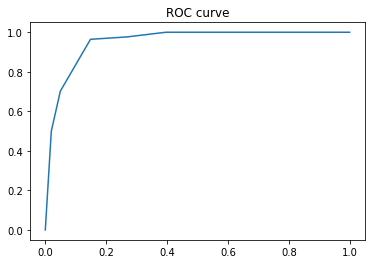

In [ ]:
accuracy_baseline, _, weighted_prediction_raw_baseline,_ = model_baseline.predict_and_evaluate(x_test, y_test,False)
print("accuracy", accuracy_baseline)
precision_baseline, recall_baseline, fpr_baseline, \
        tpr_baseline, auc_baseline = model_baseline.compute_precision_recall_roc(
                        weighted_prediction_raw_baseline, y_test)


## Separate testing - individual model - Out of sample testing

In [ ]:
accuracy_individual_model = []
for model_separate in model_separate_testing.model_collection:
    accuracy = model_separate.score(x_test, y_test)
    accuracy_individual_model.append(accuracy)


In [ ]:
# cv score for individual model over the train data
cv_score_mean_individual_model = []
for model_separate in model_separate_testing.model_collection:
    cv_score_list = cross_val_score(model_separate, x_train, y_train, cv=10)
    cv_score_mean_individual_model.append(np.mean(cv_score_list))
    print("cv score", np.mean(cv_score_list))


cv score 0.8636501187466482
cv score 0.9701926760131769
cv score 0.7869340381521489
cv score 0.7356278250210679
cv score 0.9324791235731251


In [ ]:
# cv_test_score_list_individual_model = []
# for model_separate in model_separate_testing.model_collection:
#     cv_score_list = cross_val_score(model_separate, x_test, y_test, cv=10)
#     cv_test_score_list_individual_model.append(np.mean(cv_score_list))
#     print("cv score", np.mean(cv_score_list))


## Separate testing - Out of sample testing

accuracy 0.8540540540540541
precision 0.780952380952381           recall 0.9761904761904762
fpr 0.039603960396039604           tpr 0.5238095238095238
auc 0.9353488920320604


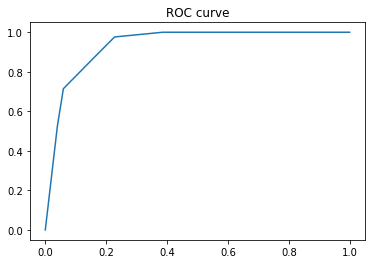

In [ ]:
accuracy_separate_testing, _, weighted_prediction_raw_separate_testing,_ = model_separate_testing.predict_and_evaluate(x_test, y_test,False)
print("accuracy", accuracy_separate_testing)
precision_separate_testing, recall_separate_testing, fpr_separate_testing, \
        tpr_separate_testing, auc_separate_testing = model_separate_testing.compute_precision_recall_roc(
                        weighted_prediction_raw_separate_testing, y_test)


In [ ]:
# # cv_score_list_separate_testing = model_separate_testing.model_cross_validation(x_test_test, y_test_test,10)
# # print("cv score", np.mean(cv_score_list_separate_testing))
# cv_test_score_list_separate_testing = model_separate_testing.model_cross_validation(x_test, y_test,10)

## Ensemble equal weight - Out of sample testing and evaluation

accuracy 0.9081081081081082
precision 0.6612903225806451           recall 0.9761904761904762
fpr 0.019801980198019802           tpr 0.5476190476190477
auc 0.9466643092880718


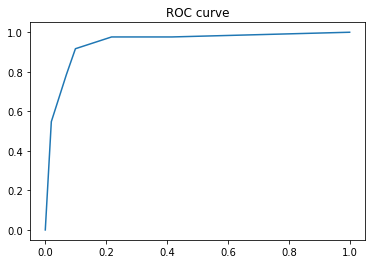

In [ ]:
accuracy_ensemble_equal_weight, _, weighted_prediction_raw_ensemble_equal_weight,_ = model_ensemble_equal_weight.predict_and_evaluate(x_test, y_test,False)
print("accuracy", accuracy_ensemble_equal_weight)
precision_ensemble_equal_weight, recall_ensemble_equal_weight, fpr_ensemble_equal_weight, \
        tpr_ensemble_equal_weight, auc_ensemble_equal_weight = model_ensemble_equal_weight.compute_precision_recall_roc(
                        weighted_prediction_raw_ensemble_equal_weight, y_test)



In [ ]:
# cv_score_list_ensemble_equal_weight = model_ensemble_equal_weight.model_cross_validation(x_test_test, y_test_test,10)
# print("cv score", np.mean(cv_score_list_ensemble_equal_weight))
# cv_test_score_list_ensemble_equal_weight = model_ensemble_equal_weight.model_cross_validation(x_test, y_test,10)

## Ensemble variable weight - Out of sample testing and evaluation

accuracy 0.8810810810810811
precision 0.7592592592592593           recall 0.9761904761904762
fpr 0.0297029702970297           tpr 0.5
auc 0.9427157001414428


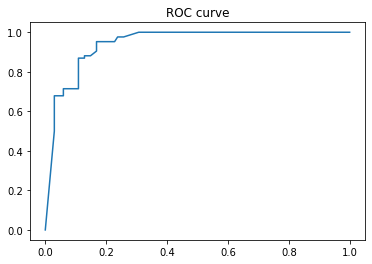

In [ ]:
accuracy_ensemble_variable_weight, _, weighted_prediction_raw_ensemble_variable_weight,_ = model_ensemble_variable_weight.predict_and_evaluate(x_test, y_test,False)
print("accuracy", accuracy_ensemble_variable_weight)
precision_ensemble_variable_weight, recall_ensemble_variable_weight, fpr_ensemble_variable_weight, \
        tpr_ensemble_variable_weight, auc_ensemble_variable_weight = model_ensemble_variable_weight.compute_precision_recall_roc(
                        weighted_prediction_raw_ensemble_variable_weight, y_test)



In [ ]:
# cv_score_list_ensemble_variable_weight = model_ensemble_variable_weight.model_cross_validation(x_test_test, y_test_test,10)
# print("cv score", np.mean(cv_score_list_ensemble_variable_weight))
# cv_test_score_list_ensemble_variable_weight = model_ensemble_variable_weight.model_cross_validation(x_test, y_test,10)

## Comparsion

**Cross validation on the out of sample test data (x_test_test)**

In [ ]:
cv_score_mean_baseline = np.mean(cv_score_list_baseline)
cv_score_mean_separate_testing = np.mean(cv_score_list_separate_testing)
cv_score_mean_ensemble_equal_weight = np.mean(cv_score_list_ensemble_equal_weight)
cv_score_mean_ensemble_variable_weight = np.mean(cv_score_list_ensemble_variable_weight)

In [ ]:
# def percentage_diff(*args):
#     percentage_diff_list=[]
#     for i in range(len(args)-1):
#         percentage_diff_list.append((args[i+1]-args[i])/args[i])
#     return percentage_diff_list

# print("improvement from baseline -> individual model -> ensemble equal weight -> ensemble variable weight")
# print(np.multiply(percentage_diff(cv_score_mean_baseline,cv_score_mean_separate_testing,cv_score_mean_ensemble_equal_weight, cv_score_mean_ensemble_variable_weight),100), "%")

0: baseline, 1-5: individual models in separate_testing, 6: combination of separately tunned individual models,        7: ensembled model with equal weight, 8: ensembled model with variable weight


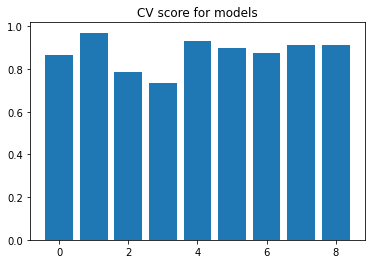

[0.8636501187466482, 0.9701926760131769, 0.7869340381521489, 0.7356278250210679, 0.9324791235731251, 0.9004864782042443, 0.8768195050946141, 0.9127556883475064, 0.9114398988738222]


In [ ]:
cv_score_mean_all = []

for cv_score in cv_score_mean_individual_model:
    cv_score_mean_all.append(cv_score)
cv_score_mean_all.append(cv_score_mean_baseline)
cv_score_mean_all.append(cv_score_mean_separate_testing)
cv_score_mean_all.append(cv_score_mean_ensemble_equal_weight)
cv_score_mean_all.append(cv_score_mean_ensemble_variable_weight)

print("0: baseline, 1-5: individual models in separate_testing, 6: combination of separately tunned individual models,\
        7: ensembled model with equal weight, 8: ensembled model with variable weight")
plt.title("CV score for models")
plt.bar(np.arange(0,len(cv_score_mean_all)), cv_score_mean_all)
plt.show()
print(cv_score_mean_all)

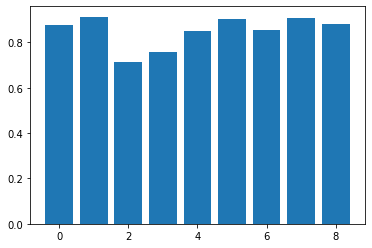

[0.8756756756756757, 0.9135135135135135, 0.7135135135135136, 0.7567567567567568, 0.8486486486486486, 0.9027027027027027, 0.8540540540540541, 0.9081081081081082, 0.8810810810810811]


In [ ]:
accuracy_list =[]

for model_accuracy in accuracy_individual_model:
    accuracy_list.append(model_accuracy)  #5 model (random forest, xgboost, logistic regression, naive bayes, neural network)
accuracy_list.append(accuracy_baseline)
accuracy_list.append(accuracy_separate_testing)
accuracy_list.append(accuracy_ensemble_equal_weight)
accuracy_list.append(accuracy_ensemble_variable_weight)

plt.bar(np.arange(0,len(accuracy_list)), accuracy_list)
plt.show()
print(accuracy_list)

In [ ]:
# for index, model_separate in enumerate(model_separate_testing.model_collection):
#     prediction = model_separate.predict(x_test)
#     # print(prediction)
#     precision, recall,threshold = metrics.precision_recall_curve(y_test,prediction)
#     print("threshold", threshold)
#     print("precision", precision,'recall',recall)
#     fpr, tpr, auc =compute_roc_curve(y_test, prediction,index)
#     print('fpr',fpr[1],'tpr', tpr[1], auc)
#     auc_list.append(auc)

---
**ROC curve, AUC, preicion, recall**

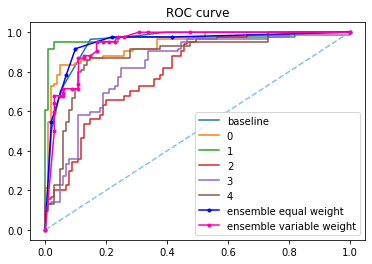

In [ ]:
def compute_roc_curve(y_test_, prediction_, index_):
    fpr, tpr, _ = metrics.roc_curve(y_test_, prediction_)
    plt.plot(fpr, tpr, label=index_)
    auc = metrics.roc_auc_score(y_test_, prediction_)
    return fpr, tpr, auc
# ROC for predicting the 0th class

# 0:random forest, 1: xgb, 2: logistic regression, 3: naive bayes, 3:neural network
auc_list = []
plt.plot(fpr_baseline,tpr_baseline, label='baseline')
for index, model_separate in enumerate(model_separate_testing.model_collection):
    prediction = model_separate.predict_proba(x_test)
    # print(prediction)
    fpr, tpr, auc =compute_roc_curve(y_test, prediction[:,1],index)
    auc_list.append(auc)

plt.plot([0,1],[0,1], color= '#8abfed', linestyle='--')
plt.plot(fpr_ensemble_equal_weight, tpr_ensemble_equal_weight, color='blue',marker='.', label='ensemble equal weight')
plt.plot(fpr_ensemble_variable_weight, tpr_ensemble_variable_weight, color ='#ff00aa', marker='.', label = 'ensemble variable weight')
plt.title("ROC curve")
plt.legend()
plt.show()

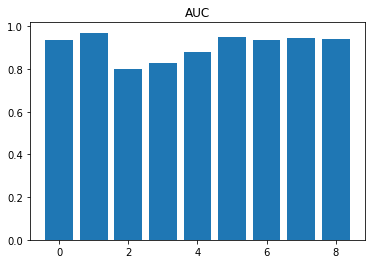

[0.9367043847241867, 0.9706506364922206, 0.7991513437057991, 0.8272041489863273, 0.8811881188118811, 0.9517326732673267, 0.9353488920320604, 0.9466643092880718, 0.9427157001414428]


In [ ]:
auc_list.append(auc_baseline)
auc_list.append(auc_separate_testing)
auc_list.append(auc_ensemble_equal_weight)
auc_list.append(auc_ensemble_variable_weight)
plt.title("AUC")
plt.bar(np.arange(0, len(auc_list)), auc_list)
plt.show()
print(auc_list)



---


**Akaike Infomration Criterion**

In [ ]:
aic_baseline, corrected_aic_baseline = model_baseline.compute_aic(x_test)
aic_separate_testing, corrected_aic_separate_testing = model_separate_testing.compute_aic(x_test)
aic_ensemble_equal_weight, corrected_aic_ensemble_equal_weight = model_ensemble_equal_weight.compute_aic(x_test)
aic_ensemble_variable_weight, corrected_aic_ensemble_variable_weight = model_ensemble_variable_weight.compute_aic(x_test)
print(corrected_aic_baseline)
print(corrected_aic_separate_testing)
print(corrected_aic_ensemble_equal_weight)
print(corrected_aic_ensemble_variable_weight)

prediction probability shape (185, 2)
prediction probability shape (185, 2)
prediction probability shape (185, 2)
prediction probability shape (185, 2)
prediction probability shape (185, 2)
log probability (185, 2)
length log prob 5
(185, 2, 5)
prediction probability shape (185, 2)
prediction probability shape (185, 2)
prediction probability shape (185, 2)
prediction probability shape (185, 2)
prediction probability shape (185, 2)
log probability (185, 2)
length log prob 5
(185, 2, 5)
prediction probability shape (185, 2)
prediction probability shape (185, 2)
prediction probability shape (185, 2)
prediction probability shape (185, 2)
prediction probability shape (185, 2)
log probability (185, 2)
length log prob 5
(185, 2, 5)
prediction probability shape (185, 2)
prediction probability shape (185, 2)
prediction probability shape (185, 2)
prediction probability shape (185, 2)
prediction probability shape (185, 2)
log probability (185, 2)
length log prob 5
(185, 2, 5)
166.43602390578653
1

**Random Forest Classifier and XGBoost** \

Random Forest Classifier and XGBoost are both ensemble learning that are tree based algorithms. Both algorithms
outperforms decision tree classifiers as the former utilizes bagging, while the latter uses gradient boosting.
XGBoost performance indicators revealed high accuracy. It performs better than Random Forest Classifier. The
AUC of its ROC curve is 0.9458 which is the highest among all our models.

**Logistic Regression** \

Logistic Regression is a classification algorithm that utilizes a logistic function to predict a binary outcome. We
applied this model due to its easy implementation and efficient training, allowing us to obtain a basis for ensemble
learning. The accuracy is relatively low as the classes may not be very separable with the features in the dataset.

**Neural Network** \

Neural Network is a deep learning algorithm that allows the program to identify patterns, and we applied this model
because Neural Network excels in capturing non-linear relationships without restrictions of the input variables,
which is useful for us to understand possible hidden relationships within the dataset. One drawback is that deep
learning is a blackbox, but our goal is to build the best model so the drawback is not significant. It is the second
best performing model compared to individual models.

**Gaussian Naïve Bayes Classifier**

Guissan Naïve Bayes Classifier is a probabilistic-based that applies Bayes' theorem with the assumption that the
features are strongly independent. We apply the Gaussian Naïve Bayes Classifier because we have continuous
variables. When we build our model, all data meet the assumption of Naïve Bayes since features are independent
after our feature engineering process.

The accuracy is relatively lower than other models because Gaussian Naïve Bayes Classifier follows a normal
distribution, but some of the categorical data we inputted follows a discrete distribution. The inconsistency of the
distribution might cause the model to throw away some useful information.

**Ensemble Learning**

Ensemble Learning baseline is constructed by combining all of the models we mentioned above, and each model
has equal weighting. Although the testing data was 89.73%, not the best compared to the separate models.
XGBoost performed slightly better in the testing data with 90.27% and a higher AUC by a slim margin. Regardless,
the ensemble learning baseline model is a more preferable model than XGBoost as it performs more consistently in
both the training and testing model.

The final model is built utilizing the hyperparameters found with 10 fold cross validation as benchmark and the
constraint that all models have to carry some importance in ensemble learning. This model outperforms other
models in testing accuracy, and AUC with consistent training and testing score performance. Therefore, we
introduce Akaike Information criterion (AIC) to provide another benchmark for model selection. It measures the
model performance and model complexity by estimating the relative information lost by a given model. Our final
model performs the best in AIC as well. This implies that our final model also retains the most information
compared to other models we have tested. Therefore, our final model is reliable.